In [3]:
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model, cross_validation, preprocessing, svm
from scipy.spatial import distance
import sys,os
import csv
from collections import Counter
import pandas as pd
import numpy as np
from array import *
from operator import itemgetter
from scipy.spatial import distance
def cur_file_dir():
     path = sys.path[0]
     return os.path.abspath(path)
rtrainpath = cur_file_dir()+'/train.csv'
rtestpath = cur_file_dir()+'/test.csv'
csvpath = cur_file_dir()+'/testtags.csv'

global train 
global test
train = pd.read_csv(rtrainpath, header=None)
test = pd.read_csv(rtestpath, header=None)

/Users/jzyjune/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jzyjune/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138

In [4]:
for i in range(0,785):                                       #type train(42001, 785)
    train[i][1:42001] = train[i][1:42001].apply(lambda x:int(x))
print train.shape
for i in range(0,784):                                       #type test(28001, 785)
    test[i][1:28001] = test[i][1:42001].apply(lambda x:int(x))
print test.shape


(42001, 785)
(28001, 784)


In [5]:
global train_row #without label
train_row = []
for i in range(1,42001):
    train_row.extend(train.loc[i][1:785])
train_row = np.array(train_row).reshape(42000,784) 
global test_row
test_row = []
for i in range(1,28001):
    test_row.extend(test.loc[i][0:784])
test_row = np.array(test_row).reshape(28000,784)
    

In [6]:
label = np.array(train[0][1:42001])
print len(label)


42000


In [7]:
def Digit_Display(choice,no):
    digit=[0 for i in range(0,784)]
    if choice == 'train':
        for i in range(0,784):
            digit[i] = train.loc[no+1][i+1]
    elif choice == 'test':
        for i in range(0,784):
            digit[i] = test.loc[no+1][i]
    digit = np.array(digit) 
    return plt.matshow(digit.reshape(28,28),cmap = 'gray')


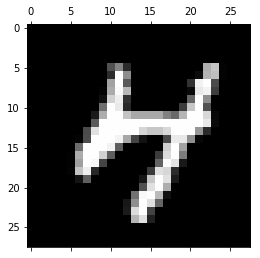

In [6]:
Digit_Display('train',32) #show number i digit i from 1 to 42000
plt.show()

In [31]:
def Count():
    zero = 0
    one = 0
    two = 0
    three =0
    four = 0
    five = 0
    six = 0
    seven = 0
    eight = 0
    nine = 0
    for i in range(0,42000):
        if (train[0][1+i] == 0):
            zero =zero+1
        elif (train[0][1+i] == 1):
                one = one +1
        elif (train[0][1+i] == 2):
                two = two +1
        elif (train[0][1+i] == 3):
                three = three +1
        elif (train[0][1+i] == 4):
                four = four +1
        elif (train[0][1+i] == 5):
                five = five +1
        elif (train[0][1+i] == 6):
                six =  six+1            
        elif (train[0][1+i] == 7):
                seven = seven +1
        elif (train[0][1+i] == 8):
                eight = eight +1
        else: nine = nine +1
    count = [zero/42000.0,one/42000.0,two/42000.0,
             three/42000.0,four/42000.0,five/42000.0,six/42000.0,
             seven/42000.0,eight/42000.0,nine/42000.0]
    return count




In [33]:
count  =  Count()
print count


[0.09838095238095237, 0.11152380952380953, 0.09945238095238096, 0.1035952380952381, 0.09695238095238096, 0.09035714285714286, 0.0985, 0.10478571428571429, 0.09673809523809523, 0.09971428571428571]


In [10]:
def PlotDigitsAmount():
    count = Count()
    x = [0,1,2,3,4,5,6,7,8,9]
    plt.bar(x,count,width = 0.7,facecolor = 'yellowgreen',edgecolor = 'white')
    plt.title('prior ratial')
    for X,COUNT in zip(x,count):
        plt.text(X, COUNT+0.001, '%.2f' % COUNT, ha='center', va= 'bottom')
    plt.show()
    

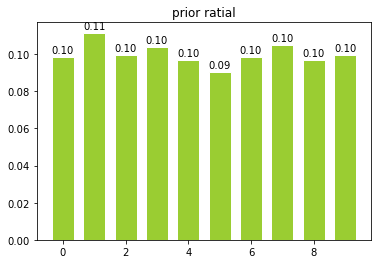

In [11]:
PlotDigitsAmount()

In [8]:


def NearestN():
    
    dismin = [1000000 for i in range(0,10)]
    
    b0=np.array(train.loc[2][1:785])
    b1=np.array(train.loc[3][1:785])
    b2=np.array(train.loc[17][1:785])
    b3=np.array(train.loc[15][1:785])
    b4=np.array(train.loc[4][1:785])
    b5=np.array(train.loc[9][1:785])
    b6=np.array(train.loc[46][1:785])
    b7=np.array(train.loc[51][1:785])
    b8=np.array(train.loc[31][1:785])
    b9=np.array(train.loc[32][1:785])
    for i in range(0,42000):
        if (i != 1):
            a0 = np.array(train.loc[i+1][1:785])
            dis0 = distance.euclidean(a0,b0)
            if (dismin[0] > dis0):
                dismin[0] = dis0
                i0 = i+1
        if (i != 2):
            a1 = np.array(train.loc[i+1][1:785])
            dis1 = distance.euclidean(a1,b1)
            if (dismin[1] > dis1):
                dismin[1] = dis1
                i1 = i+1
        if (i != 16):
            a2 = np.array(train.loc[i+1][1:785])
            dis2 = distance.euclidean(a2,b2)
            if (dismin[2] > dis2):
                dismin[2] = dis2
                i2 = i+1
        if (i != 14):
            a3 = np.array(train.loc[i+1][1:785])
            dis3 = distance.euclidean(a3,b3)
            if (dismin[3] > dis3):
                dismin[3] = dis3
                i3 = i+1
        if (i != 3):
            a4 = np.array(train.loc[i+1][1:785])
            dis4 = distance.euclidean(a4,b4)
            if (dismin[4] > dis4):
                dismin[4] = dis4
                i4 = i+1
        if (i != 8):
            a5 = np.array(train.loc[i+1][1:785])
            dis5 = distance.euclidean(a5,b5)
            if (dismin[5] > dis5):
                dismin[5] = dis5
                i5 = i+1
        if (i != 45):
            a6 = np.array(train.loc[i+1][1:785])
            dis6 = distance.euclidean(a6,b6)
            if (dismin[6] > dis6):
                dismin[6] = dis6
                i6 = i+1
        if (i != 50):
            a7 = np.array(train.loc[i+1][1:785])
            dis7 = distance.euclidean(a7,b7)
            if (dismin[7] > dis7):
                dismin[7] = dis7
                i7 = i+1
        if (i != 30):
            a8 = np.array(train.loc[i+1][1:785])
            dis8 = distance.euclidean(a8,b8)
            if (dismin[8] > dis8):
                dismin[8] = dis8
                i8 = i+1
        if (i != 31):
            a9 = np.array(train.loc[i+1][1:785])
            dis9 = distance.euclidean(a9,b9)
            if (dismin[9] > dis9):
                dismin[9] = dis9
                i9 = i+1
                
    print "the No.%d resembles sample 0 most, and the lable is %s"% (i0, train.loc[i0][0])
    print "the No.%d resembles sample 1 most, and the lable is %s"% (i1, train.loc[i1][0])
    print "the No.%d resembles sample 2 most, and the lable is %s"% (i2, train.loc[i2][0])
    print "the No.%d resembles sample 3 most, and the lable is %s"% (i3, train.loc[i3][0])
    print "the No.%d resembles sample 4 most, and the lable is %s"% (i4, train.loc[i4][0])
    print "the No.%d resembles sample 5 most, and the lable is %s"% (i5, train.loc[i5][0])
    print "the No.%d resembles sample 6 most, and the lable is %s"% (i6, train.loc[i6][0])
    print "the No.%d resembles sample 7 most, and the lable is %s"% (i7, train.loc[i7][0])
    print "the No.%d resembles sample 8 most, and the lable is %s"% (i8, train.loc[i8][0])
    print "the No.%d resembles sample 9 most, and the lable is %s"% (i9, train.loc[i9][0])   
    

In [ ]:
NearestN()

In [8]:

zeros = []
ones = []
dist0 = []
dist1 = []
disf = []

for i in range(1,42000):
    if train[0][i]==0:
        zeros.extend([i-1])   #aims at train_row matrix
    elif train[0][i]==1:
        ones.extend([i-1])
lenth0 = len(zeros)
lenth1 = len(ones)
print lenth0,lenth1
    


4132 4684


In [9]:
pairline0 = []
pairline1 = []
for i in range(0,lenth0):
    pairline0.extend(train_row[zeros[i]])
for j in range(0,lenth1):
    pairline1.extend(train_row[ones[j]])
pairline0 = np.array(pairline0).reshape(lenth0,784)
pairline1 = np.array(pairline1).reshape(lenth1,784)

dist0 = distance.pdist(pairline0)
dist1 = distance.pdist(pairline1)

distg = np.append(dist0,dist1)                   #genuine distance set
print distg.shape


(19502232,)


In [10]:
disti = distance.cdist(pairline0,pairline1)
print disti.shape


(4132, 4684)


In [11]:
disti_onedm = []                                 #imposter distance set
for i in range(0,4132):
    disti_onedm.extend(disti[i])
disti_onedm = np.array(disti_onedm)
print disti_onedm.shape

(19354288,)


In [12]:
def Pairwise():
    plt.hist(distg,bins = 2000,alpha = 0.5,color = ['b'],label = 'genuine matches')
    plt.hist(disti_onedm,bins = 2000,alpha = 0.5,color = ['orange'],label = ['imposter matches'])
    plt.xlabel('distance')
    plt.legend('gi')
    plt.show()
    

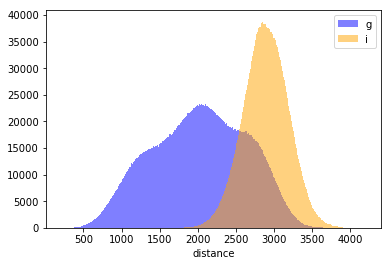

In [53]:
Pairwise()

In [23]:
def plotROC():    
    sample = 220
    ROCpercentTP = [0 for i in range(0,sample)]
    ROCpercentFP = [0 for i in range(0,sample)]
    dis_resolution = 4400/sample
    TPcount = 0
    FPcount = 0
    Glenth = 19502232.0
    Ilenth = 19354288.0
    for i in range(0,220):                     #change the threshold 
        TPcount = np.sum(distg < (i*dis_resolution))
        FPcount = np.sum(disti_onedm < (i*dis_resolution))
        ROCpercentTP[i]=(TPcount/Glenth)
        ROCpercentFP[i]=(FPcount/Ilenth)
    x = np.array(ROCpercentFP)
    y = np.array(ROCpercentTP)
    g = 1- x
    idex = np.argwhere(np.diff(np.sign(y - g)) != 0 ).reshape(-1)
    print idex
    print ROCpercentTP[idex[0]]
    print ROCpercentFP[idex[0]]
    plt.plot(ROCpercentFP,ROCpercentTP)
    plt.plot((0,1),(1,0),'--')
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.show()
    
    
    

[131]
0.80829609657
0.174032906816


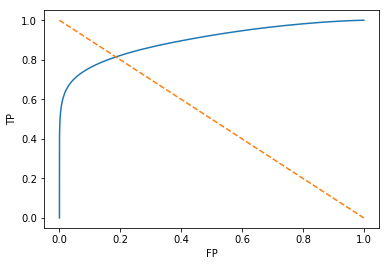

In [24]:
plotROC()           #running plot ROC

In [ ]:
def knnClassifierunit(Train_data,Label,Test_data,k):                   #test 1 instance
    Distance = []
    labels = []
    a = []
    Neighbors = [0 for i in range(k)]
    trainlenth = len(Train_data)

    for i in range(trainlenth):       
        dist = distance.euclidean(Train_data[i],Test_data)
        Distance.append((Train_data[i],Label[i],dist))
    Distance.sort(key = itemgetter(2))
    for i in range(k):
        Neighbors[i] = (Distance[i][1])
    a = Counter(Neighbors).most_common(1)
    return a[0][0]
    
        
        

In [ ]:
def knnClassifier(Train_data,Label,Test_data,k):                     #test  a matrics
    Distance = []
    Neighbors = [0 for i in range(k)]
    trainlenth = len(Train_data)
    testlenth = len(Test_data)
    a = [0 for i in range(testlenth)]   
    
    dist = distance.cdist(Test_data,Train_data)
    for i in range(testlenth):
        Distance = dist[i]
        b = sorted(range(len(Distance)),key=lambda x:Distance[x])
        for j in range(k):
            Neighbors[j] = (Label[b[j]])
        a[i] = Counter(Neighbors).most_common(1) [0] [0]                    #evaluated possible value
    return a
    


In [ ]:
#for test
a = knnClassifier(train_row,label,test_row[1:6],3)
print a
Digit_Display('test',5)
plt.show()

In [ ]:
def crossvalidation():
    label1 = label[0:28000]
    label2 = label[14000:42000]  
    label3 = np.append(label[0:14000],label[28000:42000])
    
#    amount = 10            #most 14000
    
    train_row1 = train_row[0:28000]
    train_row2 = train_row[14000:42000]

    train_row3 = np.append(train_row[0:14000],train_row[28000:42000]).reshape(28000,784)
    
    Accuracy = []
    k=3
    truecount = 0
    for k in [3,5,7,9,11]:
        print k,'hey'
        
        a = knnClassifier(train_row1,label1,train_row[28000:42000],k)
        print 'row1'
        for i in range(28000,42000):
            if (a[i-28000] == train.loc[i+1][0]):
                truecount = truecount+1
        a = knnClassifier(train_row2,label2,train_row[0:14000],k)
        print 'row2'
        for i in range(0,14000):
            if (a[i] == train.loc[i+1][0]):
                truecount = truecount+1
        a = knnClassifier(train_row3,label3,train_row[14000:28000],k)
        print 'row3'
        for i in range(14000,28000):
            if (a[i-14000] == train.loc[i+1][0]):
                truecount = truecount+1
                
        Avg = truecount/(42000.0)
        truecount = 0
        print Avg
        Accuracy.append(Avg)
    return Accuracy
                
            
    

In [ ]:
Bestkrate = crossvalidation()       # [0.9661666666666666, 0.9656190476190476, 0.9638095238095238, 0.9622857142857143, 0.9602857142857143] when k=3,5,7,9,11   
print Bestkrate

In [15]:
global ConfusionMatrics
ConfusionMatrics = [[0 for i in range(10)] for j in range(10)]   #ConfusionMatrics[i][j]represent genuine i classified as j



In [16]:
print ConfusionMatrics


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


In [17]:
def confusion_Matrics(min,max):     #min,max determines how much digits from the beginning we want to measure
       
    for i in range(min,max):
        train_rowexcept = np.append(train_row[0:i],train_row[(i+1):42000]).reshape(41999,784)
        Label = np.append(label[0:i],label[(i+1):42000])
        a = knnClassifierunit(train_rowexcept,Label,train_row[i],3)
        if (a == label[i]):
            ConfusionMatrics[a][a] = ConfusionMatrics[a][a]+1
        else: 
            ConfusionMatrics[label[i]][a] = ConfusionMatrics[label[i]][a] +1
        if i % 200 == 0 :
            print i
    

    

In [18]:
confusion_Matrics(25000,42000)
print ConfusionMatrics

25000
25200
25400
25600
25800
26000
26200
26400
26600
26800
27000
27200
27400
27600
27800
28000
28200
28400
28600
28800
29000
29200
29400
29600
29800
30000
30200
30400
30600
30800
31000
31200
31400
31600
31800
32000
32200
32400
32600
32800
33000
33200
33400
33600
33800
34000
34200
34400
34600
34800
35000
35200
35400
35600
35800
36000
36200
36400
36600
36800
37000
37200
37400
37600
37800
38000
38200
38400
38600
38800
39000
39200
39400
39600
39800
40000
40200
40400
40600
40800
41000
41200
41400
41600
41800
[[1688, 1, 1, 0, 0, 1, 2, 0, 0, 0], [0, 1884, 2, 2, 1, 0, 0, 1, 1, 0], [15, 10, 1592, 4, 1, 2, 1, 26, 5, 2], [1, 5, 10, 1689, 0, 14, 1, 12, 15, 7], [2, 16, 0, 0, 1559, 0, 7, 0, 0, 39], [6, 2, 0, 20, 0, 1471, 21, 2, 7, 11], [11, 3, 1, 0, 1, 5, 1639, 0, 0, 0], [1, 16, 4, 0, 3, 0, 0, 1757, 0, 19], [3, 27, 4, 19, 7, 19, 5, 2, 1559, 18], [6, 2, 2, 9, 21, 4, 0, 25, 7, 1642]]


In [20]:
a = np.array([[2418, 1, 2, 0, 0, 3, 11, 1, 1, 2], [0, 2774, 3, 1, 1, 1, 2, 7, 1, 3], [11, 25, 2424, 7, 1, 0, 2, 37, 7, 5], [3, 4, 10, 2493, 0, 32, 3, 11, 27, 14], [2, 22, 0, 0, 2359, 0, 5, 4, 0, 57], [6, 1, 3, 28, 1, 2169, 22, 0, 5, 20], [13, 4, 0, 1, 5, 9, 2445, 0, 0, 0], [1, 30, 7, 1, 4, 0, 0, 2529, 0, 29], [9, 13, 7, 25, 6, 36, 9, 4, 2271, 20], [5, 3, 0, 11, 25, 4, 2, 31, 10, 2379]])
b = np.array([[1688, 1, 1, 0, 0, 1, 2, 0, 0, 0], [0, 1884, 2, 2, 1, 0, 0, 1, 1, 0], [15, 10, 1592, 4, 1, 2, 1, 26, 5, 2], [1, 5, 10, 1689, 0, 14, 1, 12, 15, 7], [2, 16, 0, 0, 1559, 0, 7, 0, 0, 39], [6, 2, 0, 20, 0, 1471, 21, 2, 7, 11], [11, 3, 1, 0, 1, 5, 1639, 0, 0, 0], [1, 16, 4, 0, 3, 0, 0, 1757, 0, 19], [3, 27, 4, 19, 7, 19, 5, 2, 1559, 18], [6, 2, 2, 9, 21, 4, 0, 25, 7, 1642]])
c = a+b
print c
# run the confusion matrix in two part, because each takes such a long time. 
#the add the two matrix up

[[4106    2    3    0    0    4   13    1    1    2]
 [   0 4658    5    3    2    1    2    8    2    3]
 [  26   35 4016   11    2    2    3   63   12    7]
 [   4    9   20 4182    0   46    4   23   42   21]
 [   4   38    0    0 3918    0   12    4    0   96]
 [  12    3    3   48    1 3640   43    2   12   31]
 [  24    7    1    1    6   14 4084    0    0    0]
 [   2   46   11    1    7    0    0 4286    0   48]
 [  12   40   11   44   13   55   14    6 3830   38]
 [  11    5    2   20   46    8    2   56   17 4021]]


In [29]:
def wrong_number():
    Wrongnumber = [0 for i in range(0,10)]
    q=np.array([[4106  ,  2  ,  3 ,   0 ,   0 ,   4 ,  13 ,   1 ,   1 ,   2],
                [   0 ,4658  ,  5  ,  3  ,  2   , 1    ,2    ,8  ,  2 ,   3],
                [  26  , 35 ,4016,   11 ,   2  ,  2   , 3 ,  63 ,  12  ,  7],
                [   4   , 9 ,  20 ,4182 ,   0,   46,    4,   23,   42  , 21],
                [   4  , 38   , 0,    0 ,3918,    0   ,12 ,   4    ,0 ,  96],
                [  12   , 3   , 3 ,  48    ,1 ,3640  , 43  ,  2   ,12  , 31],
                [  24   , 7   , 1  ,  1   , 6  , 14 ,4084   , 0   , 0   , 0],
                [   2  , 46  , 11   , 1  ,  7   , 0    ,0 ,4286  ,  0  , 48],
                [  12   ,40 ,  11  , 44 ,  13  , 55  , 14  ,  6 ,3830   ,38],
                [  11    ,5 ,   2   ,20,   46   , 8 ,   2  , 56 ,  17 ,4021]])
    for i in range(0,10):
        for j in range(0,10):
            if i != j:
                Wrongnumber[i] = Wrongnumber[i]+q[i][j]
    print Wrongnumber        
        
    

In [30]:
wrong_number()

[26, 26, 161, 169, 154, 155, 53, 115, 233, 167]


In [29]:
def testTags():
    a = knnClassifier(train_row,label,test_row[0:28000],3)
    return a 

In [30]:
TestTags = testTags()
print TestTags


[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 9, 2, 1, 6, 3, 4, 2, 3, 1, 0, 2, 0, 9, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 2, 8, 6, 8, 6, 2, 8, 5, 5, 9, 8, 3, 5, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 3, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 2, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 

In [81]:
testtags = np.array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0, 9, 1, 1, 5, 7, 4, 2, 7, 4, 7, 7, 5, 4, 2, 6, 2, 5, 5, 1, 6, 7, 7, 4, 9, 8, 7, 8, 2, 6, 7, 6, 8, 8, 3, 8, 2, 1, 2, 2, 0, 4, 1, 7, 0, 0, 0, 1, 9, 0, 1, 6, 5, 8, 8, 2, 8, 8, 9, 2, 3, 5, 4, 1, 0, 9, 2, 4, 3, 6, 7, 2, 0, 6, 6, 1, 4, 3, 9, 7, 4, 0, 9, 2, 0, 7, 3, 0, 5, 0, 8, 0, 0, 4, 7, 1, 7, 1, 1, 3, 3, 3, 7, 2, 8, 6, 3, 8, 7, 8, 4, 3, 5, 6, 0, 0, 0, 3, 1, 3, 6, 4, 3, 4, 5, 5, 8, 7, 7, 2, 8, 4, 3, 5, 6, 5, 3, 7, 5, 7, 8, 3, 0, 4, 5, 1, 2, 7, 6, 3, 0, 2, 7, 8, 6, 1, 3, 7, 4, 1, 2, 4, 8, 5, 2, 4, 9, 2, 1, 6, 0, 6, 1, 4, 9, 6, 0, 9, 7, 6, 9, 1, 9, 0, 9, 9, 0, 8, 4, 6, 2, 0, 9, 3, 6, 9, 2, 1, 6, 3, 4, 2, 3, 1, 0, 2, 0, 9, 6, 1, 0, 0, 4, 9, 1, 7, 3, 2, 2, 8, 6, 8, 6, 2, 8, 5, 5, 9, 8, 3, 5, 9, 7, 1, 3, 8, 4, 5, 1, 4, 5, 6, 3, 3, 5, 7, 0, 6, 8, 3, 1, 6, 0, 6, 3, 9, 3, 1, 5, 8, 4, 0, 9, 2, 0, 5, 3, 7, 1, 9, 9, 5, 7, 7, 9, 9, 6, 3, 0, 3, 3, 6, 9, 8, 2, 6, 2, 7, 1, 4, 5, 8, 5, 9, 0, 0, 3, 8, 4, 1, 8, 4, 1, 1, 9, 8, 4, 5, 1, 5, 3, 6, 3, 1, 3, 0, 9, 0, 0, 6, 0, 6, 3, 1, 8, 6, 0, 6, 5, 2, 2, 6, 7, 7, 2, 5, 8, 3, 9, 2, 7, 8, 6, 3, 8, 4, 2, 3, 8, 1, 6, 4, 5, 7, 9, 7, 6, 9, 5, 3, 7, 6, 5, 5, 4, 2, 6, 2, 1, 3, 7, 1, 7, 9, 9, 6, 1, 1, 1, 7, 3, 9, 7, 6, 1, 1, 1, 9, 3, 8, 5, 5, 0, 4, 1, 2, 3, 1, 1, 3, 5, 9, 6, 6, 5, 3, 1, 4, 7, 4, 7, 4, 8, 5, 2, 6, 1, 3, 9, 5, 0, 8, 4, 7, 4, 4, 4, 1, 5, 3, 9, 9, 7, 6, 9, 5, 9, 2, 3, 5, 6, 1, 7, 5, 0, 5, 1, 7, 4, 4, 1, 1, 4, 9, 5, 6, 0, 1, 3, 1, 0, 4, 8, 1, 2, 7, 9, 4, 8, 3, 7, 7, 4, 2, 4, 2, 7, 5, 3, 2, 0, 6, 5, 9, 4, 1, 8, 3, 3, 0, 2, 7, 6, 8, 7, 5, 3, 5, 7, 4, 3, 6, 9, 0, 7, 7, 1, 0, 1, 1, 7, 0, 5, 3, 8, 3, 5, 6, 5, 7, 3, 0, 2, 8, 2, 0, 3, 0, 9, 2, 1, 1, 3, 0, 5, 0, 0, 7, 5, 6, 2, 0, 3, 8, 1, 6, 5, 4, 1, 1, 4, 6, 5, 3, 6, 0, 4, 8, 2, 4, 2, 5, 1, 7, 6, 9, 1, 7, 3, 8, 0, 8, 8, 4, 5, 3, 6, 6, 6, 0, 3, 5, 1, 7, 1, 6, 2, 8, 5, 6, 4, 7, 4, 3, 3, 2, 4, 7, 0, 0, 9, 8, 5, 9, 4, 0, 8, 1, 3, 6, 2, 6, 1, 8, 6, 1, 4, 7, 7, 8, 3, 0, 9, 9, 6, 7, 7, 4, 8, 1, 8, 4, 8, 0, 0, 8, 2, 4, 3, 3, 7, 2, 3, 4, 0, 4, 8, 1, 3, 3, 6, 3, 9, 4, 3, 8, 7, 7, 2, 6, 0, 6, 9, 8, 1, 1, 3, 4, 6, 9, 9, 2, 6, 0, 1, 8, 4, 3, 9, 8, 8, 4, 0, 5, 0, 6, 0, 4, 4, 6, 5, 1, 8, 1, 5, 3, 6, 2, 3, 7, 8, 9, 3, 1, 0, 1, 0, 6, 4, 7, 5, 7, 1, 3, 2, 7, 7, 1, 5, 1, 5, 4, 4, 3, 4, 3, 9, 0, 7, 8, 6, 4, 9, 4, 4, 1, 4, 7, 1, 1, 8, 7, 0, 4, 0, 4, 0, 0, 5, 1, 8, 6, 5, 0, 1, 5, 3, 4, 6, 3, 1, 1, 6, 9, 8, 3, 5, 5, 4, 8, 8, 5, 0, 4, 0, 4, 3, 1, 6, 9, 9, 1, 1, 3, 3, 1, 4, 9, 6, 9, 1, 5, 4, 2, 3, 2, 4, 0, 9, 7, 4, 3, 0, 5, 0, 1, 9, 0, 4, 5, 2, 8, 0, 5, 9, 3, 9, 6, 1, 5, 5, 1, 9, 0, 8, 4, 6, 7, 2, 8, 5, 8, 9, 7, 7, 2, 8, 1, 3, 4, 5, 0, 4, 1, 4, 2, 3, 6, 9, 2, 3, 4, 5, 4, 2, 3, 5, 1, 1, 0, 1, 4, 9, 1, 1, 2, 7, 1, 5, 4, 9, 1, 7, 6, 0, 4, 2, 9, 4, 1, 1, 5, 3, 5, 7, 4, 7, 8, 3, 2, 7, 2, 0, 4, 7, 1, 6, 4, 6, 1, 0, 7, 3, 5, 9, 4, 7, 9, 6, 6, 3, 3, 2, 1, 4, 5, 3, 7, 7, 9, 5, 6, 2, 6, 1, 0, 9, 3, 2, 9, 2, 6, 7, 5, 2, 3, 2, 8, 3, 0, 2, 7, 9, 4, 0, 9, 5, 1, 8, 8, 5, 3, 2, 9, 6, 7, 0, 8, 0, 7, 4, 5, 8, 7, 9, 7, 7, 0, 5, 3, 2, 1, 9, 0, 6, 8, 3, 6, 2, 2, 9, 0, 7, 0, 7, 1, 3, 4, 6, 3, 9, 2, 6, 3, 7, 3, 7, 2, 3, 4, 9, 5, 9, 9, 6, 2, 6, 1, 5, 5, 1, 9, 1, 8, 9, 4, 5, 9, 5, 2, 0, 1, 6, 1, 9, 2, 2, 7, 7, 6, 6, 2, 6, 3, 5, 9, 1, 1, 3, 6, 3, 0, 0, 6, 0, 9, 4, 7, 0, 5, 9, 0, 8, 7, 6, 9, 2, 6, 1, 2, 9, 3, 0, 2, 3, 7, 7, 6, 6, 3, 1, 3, 1, 0, 1, 7, 6, 3, 3, 3, 3, 4, 2, 9, 1, 8, 2, 0, 6, 4, 6, 7, 2, 4, 1, 0, 5, 2, 6, 4, 9, 8, 5, 4, 1, 6, 3, 9, 6, 1, 2, 0, 8, 8, 0, 3, 6, 8, 7, 7, 7, 6, 0, 2, 1, 2, 8, 4, 5, 5, 3, 0, 7, 8, 4, 7, 4, 9, 1, 8, 0, 9, 1, 9, 0, 6, 4, 1, 2, 4, 5, 8, 2, 9, 1, 8, 2, 2, 7, 2, 5, 3, 8, 9, 4, 0, 7, 0, 3, 5, 9, 7, 3, 3, 8, 8, 9, 3, 2, 5, 4, 4, 8, 3, 0, 1, 7, 9, 6, 4, 0, 4, 7, 8, 4, 5, 9, 6, 7, 8, 2, 0, 0, 5, 0, 5, 9, 9, 9, 7, 5, 4, 3, 7, 5, 4, 1, 9, 5, 4, 9, 9, 5, 7, 8, 0, 4, 7, 4, 3, 3, 6, 6, 0, 4, 5, 5, 7, 6, 5, 5, 1, 0, 4, 2, 2, 1, 9, 9, 8, 1, 1, 3, 1, 0, 0, 4, 0, 2, 4, 6, 1, 4, 7, 0, 7, 1, 0, 3, 3, 1, 9, 8, 4, 6, 5, 9, 8, 6, 3, 6, 6, 6, 1, 1, 4, 0, 7, 8, 0, 4, 6, 7, 9, 5, 9, 6, 2, 4, 7, 5, 9, 8, 5, 1, 8, 0, 3, 6, 8, 1, 3, 0, 3, 1, 9, 1, 4, 5, 8, 2, 2, 9, 1, 3, 3, 0, 5, 6, 1, 8, 3, 6, 7, 2, 3, 2, 9, 2, 1, 5, 9, 8, 7, 3, 8, 4, 5, 8, 2, 1, 6, 7, 6, 1, 1, 0, 5, 0, 9, 1, 7, 4, 0, 9, 7, 5, 9, 8, 8, 7, 5, 4, 3, 7, 9, 4, 7, 2, 7, 4, 1, 5, 9, 2, 3, 5, 9, 8, 4, 5, 9, 1, 5, 1, 1, 3, 7, 5, 1, 7, 9, 2, 5, 6, 8, 8, 5, 0, 8, 9, 4, 7, 1, 9, 6, 8, 9, 4, 9, 9, 6, 3, 2, 7, 4, 8, 0, 4, 9, 0, 8, 8, 7, 0, 9, 0, 8, 7, 0, 8, 5, 3, 3, 6, 2, 5, 3, 1, 7, 3, 1, 0, 6, 5, 9, 3, 2, 9, 4, 8, 8, 7, 6, 4, 4, 0, 7, 5, 9, 6, 7, 3, 8, 9, 5, 0, 8, 6, 0, 3, 0, 1, 8, 3, 8, 6, 0, 1, 0, 0, 7, 3, 6, 9, 2, 3, 1, 7, 7, 9, 5, 9, 9, 1, 1, 5, 8, 3, 2, 5, 4, 1, 8, 9, 0, 7, 0, 9, 0, 0, 7, 1, 3, 5, 5, 8, 9, 7, 9, 4, 6, 0, 1, 9, 2, 7, 4, 8, 5, 0, 5, 9, 8, 7, 5, 0, 1, 9, 9, 6, 3, 0, 8, 7, 5, 2, 6, 1, 7, 2, 3, 8, 8, 1, 4, 6, 2, 4, 0, 2, 3, 6, 3, 3, 2, 9, 1, 3, 2, 5, 8, 7, 7, 6, 2, 0, 3, 2, 8, 1, 5, 4, 3, 3, 1, 9, 3, 2, 1, 1, 3, 6, 1, 9, 4, 4, 9, 6, 6, 7, 5, 9, 6, 6, 1, 0, 7, 8, 8, 8, 3, 7, 7, 7, 1, 4, 6, 1, 0, 0, 1, 7, 7, 8, 8, 9, 8, 2, 4, 8, 1, 3, 6, 1, 3, 3, 6, 6, 5, 8, 8, 5, 4, 5, 9, 8, 2, 0, 1, 3, 3, 5, 6, 3, 3, 6, 9, 3, 3, 7, 1, 5, 6, 5, 1, 7, 4, 5, 9, 0, 2, 8, 0, 9, 5, 3, 0, 8, 0, 7, 7, 1, 5, 4, 4, 9, 7, 0, 3, 1, 3, 3, 6, 2, 4, 2, 1, 6, 5, 9, 3, 4, 1, 9, 4, 0, 3, 5, 1, 0, 0, 5, 3, 9, 4, 9, 1, 0, 0, 5, 7, 1, 6, 8, 3, 7, 0, 3, 8, 2, 8, 6, 7, 9, 1, 8, 4, 5, 3, 1, 5, 2, 2, 5, 3, 8, 8, 2, 7, 4, 8, 5, 7, 0, 6, 6, 2, 3, 2, 2, 9, 1, 9, 6, 9, 2, 2, 6, 0, 4, 0, 0, 0, 0, 3, 0, 4, 3, 6, 7, 8, 6, 0, 5, 1, 8, 5, 6, 0, 2, 7, 6, 1, 3, 9, 9, 3, 0, 3, 5, 9, 6, 8, 3, 1, 0, 0, 9, 0, 6, 6, 2, 4, 3, 0, 2, 7, 1, 5, 8, 5, 8, 8, 4, 7, 4, 3, 6, 5, 7, 3, 1, 6, 7, 1, 3, 1, 8, 5, 1, 5, 2, 2, 6, 9, 0, 2, 1, 2, 7, 4, 4, 9, 3, 0, 4, 5, 1, 9, 6, 9, 7, 6, 5, 0, 6, 1, 3, 8, 4, 0, 0, 0, 3, 7, 9, 8, 6, 9, 9, 1, 5, 0, 9, 1, 7, 9, 0, 8, 9, 0, 6, 9, 2, 4, 2, 1, 9, 4, 4, 8, 8, 6, 5, 6, 1, 3, 5, 9, 3, 9, 7, 0, 7, 6, 5, 8, 6, 6, 0, 7, 4, 5, 3, 7, 7, 8, 5, 5, 5, 5, 3, 6, 8, 3, 6, 1, 9, 8, 0, 9, 4, 4, 5, 8, 4, 0, 9, 3, 0, 9, 4, 6, 4, 0, 2, 0, 1, 7, 5, 9, 8, 7, 8, 6, 2, 0, 0, 3, 7, 8, 6, 1, 6, 7, 2, 5, 9, 7, 1, 1, 4, 1, 6, 6, 7, 0, 8, 4, 7, 0, 9, 4, 6, 2, 6, 7, 3, 2, 9, 6, 5, 2, 5, 8, 5, 6, 3, 2, 2, 7, 7, 3, 4, 9, 2, 8, 0, 2, 4, 0, 9, 4, 5, 8, 8, 9, 3, 3, 5, 9, 0, 7, 0, 5, 5, 2, 9, 1, 9, 9, 4, 6, 4, 6, 8, 9, 0, 0, 8, 2, 1, 6, 8, 2, 3, 2, 2, 5, 5, 7, 3, 3, 5, 9, 6, 2, 3, 4, 3, 7, 7, 9, 2, 6, 6, 9, 5, 8, 0, 6, 7, 4, 2, 2, 4, 0, 6, 2, 1, 9, 2, 5, 7, 5, 6, 7, 0, 6, 8, 2, 4, 4, 5, 7, 6, 8, 1, 4, 6, 6, 1, 5, 2, 5, 8, 0, 1, 1, 4, 7, 0, 3, 6, 5, 0, 5, 2, 0, 8, 9, 1, 5, 7, 3, 3, 6, 1, 6, 5, 9, 5, 2, 0, 7, 4, 0, 2, 7, 4, 4, 6, 0, 4, 6, 7, 9, 1, 7, 4, 7, 9, 4, 7, 4, 8, 5, 9, 5, 5, 1, 9, 3, 2, 4, 0, 2, 6, 6, 8, 0, 4, 3, 1, 2, 6, 7, 3, 7, 7, 1, 5, 5, 4, 0, 1, 2, 2, 1, 1, 4, 2, 2, 1, 1, 7, 9, 4, 8, 0, 8, 9, 3, 8, 9, 4, 6, 3, 3, 3, 9, 0, 3, 6, 9, 1, 4, 6, 0, 6, 0, 5, 9, 0, 1, 8, 0, 4, 2, 0, 1, 5, 3, 4, 5, 7, 6, 8, 8, 7, 9, 0, 3, 2, 6, 0, 5, 5, 9, 6, 5, 4, 2, 1, 4, 3, 6, 4, 8, 7, 2, 8, 0, 3, 4, 5, 3, 3, 1, 6, 4, 5, 9, 7, 0, 1, 2, 5, 3, 2, 6, 4, 2, 5, 9, 3, 4, 6, 3, 5, 8, 2, 8, 9, 8, 7, 5, 9, 9, 9, 4, 6, 7, 3, 6, 9, 9, 6, 6, 0, 9, 4, 9, 7, 4, 1, 7, 2, 8, 8, 0, 5, 6, 7, 1, 8, 0, 8, 0, 3, 4, 2, 4, 2, 1, 1, 6, 7, 6, 7, 5, 3, 6, 6, 3, 4, 8, 7, 8, 8, 7, 0, 0, 7, 7, 1, 6, 0, 3, 9, 9, 3, 5, 1, 7, 0, 1, 9, 5, 9, 9, 0, 1, 9, 0, 9, 7, 4, 2, 2, 5, 5, 0, 0, 5, 9, 4, 3, 4, 2, 5, 0, 0, 3, 3, 3, 5, 9, 0, 1, 1, 5, 9, 2, 2, 3, 3, 4, 4, 1, 0, 8, 3, 5, 5, 6, 9, 1, 9, 8, 7, 0, 3, 3, 8, 7, 0, 3, 3, 9, 7, 3, 1, 9, 6, 3, 3, 4, 0, 2, 1, 3, 9, 5, 1, 7, 9, 7, 9, 6, 1, 5, 6, 6, 9, 0, 4, 2, 2, 9, 3, 7, 6, 4, 1, 4, 2, 4, 1, 0, 2, 2, 1, 0, 2, 7, 2, 6, 0, 2, 0, 2, 0, 0, 5, 0, 3, 3, 0, 6, 6, 4, 1, 5, 9, 2, 4, 0, 9, 1, 1, 3, 0, 1, 1, 5, 0, 2, 4, 7, 3, 6, 8, 7, 8, 8, 7, 2, 6, 9, 4, 5, 7, 1, 3, 6, 0, 9, 9, 4, 6, 8, 6, 4, 1, 0, 3, 3, 0, 1, 8, 9, 1, 5, 7, 7, 3, 4, 6, 2, 9, 3, 0, 7, 0, 8, 8, 2, 4, 0, 2, 9, 8, 3, 9, 9, 0, 1, 6, 7, 7, 6, 4, 6, 8, 7, 6, 1, 3, 3, 5, 2, 1, 6, 4, 1, 9, 9, 6, 4, 6, 4, 5, 9, 4, 9, 9, 3, 2, 5, 1, 6, 2, 2, 7, 2, 8, 4, 7, 4, 1, 0, 1, 9, 0, 7, 4, 9, 0, 9, 7, 4, 0, 9, 6, 7, 4, 9, 7, 0, 2, 8, 5, 2, 4, 2, 4, 5, 2, 6, 6, 8, 8, 6, 7, 4, 1, 4, 8, 3, 2, 5, 9, 0, 9, 0, 1, 4, 9, 7, 7, 3, 9, 5, 3, 1, 9, 2, 6, 7, 9, 1, 0, 5, 1, 6, 8, 8, 6, 7, 3, 7, 2, 8, 5, 5, 0, 8, 1, 5, 6, 8, 9, 9, 1, 6, 9, 8, 5, 3, 7, 7, 8, 1, 4, 7, 0, 4, 0, 5, 4, 3, 1, 9, 6, 3, 0, 0, 2, 8, 9, 9, 1, 1, 8, 1, 3, 2, 3, 1, 0, 3, 8, 5, 0, 7, 2, 0, 6, 1, 8, 1, 1, 8, 2, 2, 6, 1, 7, 9, 7, 6, 7, 5, 1, 9, 6, 3, 7, 6, 4, 4, 4, 0, 8, 2, 0, 8, 6, 4, 8, 1, 9, 2, 9, 5, 1, 5, 1, 1, 4, 7, 0, 1, 2, 4, 6, 1, 4, 2, 9, 2, 7, 2, 6, 4, 5, 5, 5, 8, 9, 6, 1, 1, 6, 1, 2, 1, 9, 4, 7, 4, 7, 1, 0, 6, 4, 6, 5, 3, 3, 4, 0, 1, 1, 6, 0, 5, 1, 2, 1, 6, 4, 3, 9, 0, 4, 0, 3, 1, 4, 9, 2, 1, 7, 0, 9, 6, 8, 5, 8, 6, 0, 8, 7, 9, 9, 3, 1, 3, 2, 3, 1, 1, 2, 0, 0, 7, 7, 8, 1, 6, 0, 6, 7, 4, 3, 6, 7, 2, 2, 8, 9, 9, 4, 2, 7, 7, 2, 5, 1, 7, 7, 3, 7, 8, 1, 2, 5, 6, 1, 9, 7, 7, 7, 8, 9, 9, 7, 8, 9, 5, 7, 9, 5, 0, 7, 6, 1, 5, 5, 2, 7, 0, 5, 6, 9, 5, 8, 2, 2, 2, 9, 7, 9, 5, 1, 1, 1, 4, 5, 6, 1, 7, 0, 7, 9, 2, 7, 2, 3, 1, 5, 7, 1, 5, 1, 6, 0, 2, 6, 9, 9, 7, 9, 8, 7, 7, 7, 5, 6, 2, 9, 8, 8, 4, 7, 3, 1, 3, 4, 8, 2, 0, 2, 6, 3, 1, 0, 9, 9, 1, 6, 8, 8, 6, 6, 2, 2, 6, 1, 6, 6, 2, 0, 6, 0, 8, 2, 2, 8, 6, 4, 8, 5, 0, 4, 0, 0, 9, 7, 9, 2, 9, 2, 8, 5, 3, 5, 8, 7, 9, 5, 7, 3, 0, 2, 8, 0, 5, 0, 6, 9, 9, 3, 9, 2, 2, 3, 3, 7, 4, 5, 8, 5, 8, 6, 0, 3, 1, 2, 6, 8, 5, 5, 2, 7, 4, 1, 9, 3, 6, 8, 8, 2, 5, 8, 3, 9, 1, 6, 9, 6, 7, 5, 8, 1, 0, 8, 6, 7, 5, 1, 2, 8, 9, 3, 8, 8, 3, 9, 4, 8, 7, 6, 9, 5, 3, 0, 9, 9, 6, 8, 7, 9, 1, 2, 3, 2, 1, 5, 2, 9, 4, 4, 4, 3, 0, 0, 3, 1, 5, 1, 1, 0, 5, 6, 2, 7, 6, 0, 4, 4, 7, 0, 7, 0, 8, 7, 1, 3, 7, 8, 9, 0, 9, 0, 0, 1, 8, 8, 7, 4, 8, 3, 5, 9, 0, 3, 6, 3, 6, 5, 0, 4, 2, 6, 9, 3, 0, 9, 4, 5, 7, 7, 4, 2, 3, 9, 2, 8, 8, 0, 1, 9, 4, 2, 2, 1, 8, 2, 7, 3, 5, 1, 3, 0, 2, 2, 1, 7, 9, 1, 8, 8, 1, 6, 9, 7, 1, 8, 9, 9, 2, 0, 6, 1, 5, 2, 0, 9, 2, 5, 5, 3, 4, 0, 9, 0, 9, 4, 0, 4, 3, 7, 8, 0, 4, 0, 2, 4, 8, 2, 1, 5, 2, 5, 8, 5, 6, 1, 4, 8, 6, 2, 1, 3, 9, 8, 3, 7, 8, 7, 8, 1, 1, 5, 6, 4, 7, 5, 5, 4, 0, 8, 1, 6, 0, 3, 3, 7, 8, 8, 4, 3, 4, 3, 2, 1, 7, 0, 9, 4, 2, 8, 6, 8, 5, 2, 8, 4, 8, 1, 4, 3, 7, 1, 2, 1, 5, 3, 6, 7, 2, 4, 7, 6, 9, 1, 2, 8, 6, 8, 7, 6, 2, 0, 1, 1, 0, 6, 3, 9, 7, 3, 1, 9, 4, 6, 9, 7, 2, 7, 8, 1, 3, 5, 1, 2, 7, 6, 6, 5, 0, 4, 5, 9, 6, 3, 4, 1, 2, 4, 1, 3, 4, 0, 1, 8, 0, 2, 9, 2, 7, 7, 9, 1, 4, 7, 3, 3, 9, 9, 1, 3, 7, 8, 4, 9, 7, 9, 7, 1, 5, 4, 0, 0, 0, 3, 5, 3, 3, 0, 4, 1, 2, 8, 1, 0, 8, 8, 3, 4, 4, 9, 3, 2, 7, 2, 6, 1, 1, 0, 1, 8, 1, 3, 7, 4, 9, 1, 3, 5, 0, 3, 8, 1, 8, 6, 1, 5, 9, 6, 6, 6, 1, 9, 0, 3, 9, 8, 4, 6, 3, 6, 8, 9, 9, 5, 1, 8, 0, 2, 0, 8, 9, 5, 2, 0, 1, 0, 9, 2, 8, 1, 8, 2, 8, 7, 5, 6, 9, 9, 5, 7, 4, 6, 4, 9, 6, 0, 0, 4, 3, 5, 7, 1, 2, 1, 9, 2, 1, 3, 1, 9, 1, 8, 5, 8, 7, 9, 3, 2, 3, 6, 1, 7, 5, 2, 2, 6, 3, 7, 0, 5, 6, 7, 9, 6, 8, 6, 0, 9, 5, 9, 4, 1, 9, 5, 0, 7, 6, 2, 5, 5, 6, 6, 0, 4, 3, 8, 4, 3, 5, 0, 2, 6, 5, 0, 2, 6, 0, 6, 0, 5, 3, 6, 1, 9, 3, 8, 4, 5, 3, 2, 5, 4, 4, 0, 6, 1, 2, 0, 3, 5, 5, 0, 4, 1, 1, 3, 3, 9, 3, 3, 6, 4, 9, 0, 6, 9, 7, 9, 8, 5, 7, 9, 1, 4, 6, 3, 6, 8, 4, 9, 7, 1, 6, 8, 6, 7, 9, 4, 2, 0, 9, 9, 9, 1, 6, 6, 8, 0, 6, 3, 7, 7, 6, 7, 0, 1, 6, 5, 4, 5, 6, 2, 5, 3, 9, 5, 1, 3, 9, 6, 9, 7, 0, 6, 2, 7, 6, 0, 0, 3, 8, 1, 2, 9, 3, 0, 8, 1, 3, 9, 8, 6, 5, 1, 3, 6, 7, 1, 5, 1, 8, 1, 7, 3, 7, 7, 5, 2, 4, 9, 6, 8, 6, 6, 0, 8, 1, 7, 7, 1, 9, 0, 1, 4, 9, 1, 7, 3, 1, 6, 2, 2, 7, 2, 4, 1, 5, 6, 1, 3, 3, 2, 2, 9, 1, 7, 4, 8, 6, 5, 6, 3, 8, 1, 3, 9, 5, 6, 7, 5, 3, 3, 7, 7, 1, 8, 0, 6, 3, 9, 3, 3, 6, 0, 2, 0, 1, 0, 1, 1, 3, 1, 2, 9, 0, 3, 8, 8, 0, 5, 9, 8, 3, 3, 1, 3, 6, 5, 2, 7, 7, 9, 8, 5, 7, 1, 7, 4, 3, 9, 4, 4, 3, 2, 0, 0, 0, 3, 1, 1, 4, 3, 8, 2, 2, 7, 8, 4, 7, 4, 0, 4, 9, 1, 0, 7, 1, 2, 1, 6, 2, 4, 0, 4, 6, 0, 5, 1, 4, 2, 6, 2, 9, 7, 3, 4, 3, 9, 0, 1, 4, 8, 6, 2, 1, 1, 7, 3, 2, 9, 2, 2, 5, 2, 1, 0, 2, 5, 0, 0, 0, 4, 2, 7, 3, 0, 2, 1, 9, 0, 8, 5, 3, 8, 2, 2, 0, 2, 7, 0, 4, 0, 3, 0, 2, 2, 8, 0, 9, 2, 3, 0, 2, 4, 8, 7, 1, 4, 2, 2, 1, 6, 7, 6, 6, 3, 3, 6, 7, 3, 9, 1, 2, 3, 5, 0, 1, 0, 9, 7, 9, 0, 8, 5, 1, 4, 7, 6, 4, 8, 1, 2, 2, 6, 4, 2, 9, 8, 2, 6, 5, 8, 3, 1, 7, 4, 6, 0, 1, 3, 8, 1, 4, 0, 8, 6, 6, 1, 6, 2, 3, 9, 1, 5, 6, 6, 1, 4, 0, 3, 6, 0, 5, 6, 8, 9, 4, 7, 7, 7, 8, 8, 7, 5, 2, 7, 8, 1, 1, 9, 5, 4, 1, 0, 1, 3, 2, 3, 6, 3, 3, 1, 2, 7, 1, 7, 7, 0, 0, 3, 0, 0, 2, 0, 0, 7, 1, 7, 8, 6, 6, 7, 1, 6, 6, 2, 4, 9, 1, 3, 4, 0, 4, 9, 2, 8, 6, 2, 7, 4, 7, 5, 0, 3, 7, 5, 6, 6, 9, 0, 3, 5, 2, 8, 9, 8, 2, 2, 9, 7, 1, 7, 7, 2, 7, 3, 2, 2, 8, 4, 0, 2, 2, 8, 1, 1, 2, 2, 2, 3, 0, 1, 6, 3, 9, 4, 3, 9, 7, 9, 0, 7, 3, 5, 2, 3, 0, 1, 9, 9, 7, 9, 2, 7, 4, 7, 0, 6, 5, 1, 9, 5, 2, 7, 2, 2, 5, 6, 8, 5, 8, 2, 3, 3, 1, 4, 7, 3, 8, 4, 3, 7, 4, 1, 9, 0, 4, 8, 0, 6, 5, 6, 5, 2, 0, 3, 3, 1, 6, 1, 4, 1, 1, 1, 1, 3, 9, 1, 0, 4, 2, 9, 5, 5, 9, 5, 5, 2, 5, 0, 8, 0, 4, 2, 4, 3, 8, 7, 9, 4, 0, 1, 4, 9, 4, 4, 3, 2, 0, 8, 4, 1, 0, 9, 3, 2, 4, 6, 9, 0, 6, 1, 1, 7, 4, 7, 8, 7, 8, 7, 0, 1, 8, 4, 2, 5, 4, 8, 9, 1, 0, 2, 8, 7, 9, 9, 4, 7, 6, 9, 4, 1, 7, 8, 8, 3, 4, 2, 4, 1, 8, 7, 8, 7, 4, 9, 4, 7, 3, 6, 9, 1, 5, 1, 0, 1, 8, 1, 6, 9, 3, 3, 6, 5, 5, 8, 1, 9, 2, 3, 7, 9, 9, 2, 9, 8, 3, 4, 5, 1, 4, 9, 6, 1, 3, 5, 6, 9, 6, 5, 3, 5, 4, 5, 0, 2, 6, 8, 9, 9, 9, 6, 6, 7, 5, 8, 2, 0, 9, 5, 0, 1, 9, 7, 2, 3, 3, 0, 4, 8, 3, 1, 3, 9, 0, 3, 8, 4, 9, 4, 6, 8, 9, 6, 9, 0, 8, 6, 5, 0, 4, 8, 6, 0, 0, 9, 1, 4, 2, 5, 6, 3, 8, 8, 8, 8, 2, 4, 2, 7, 6, 4, 7, 8, 6, 9, 8, 6, 3, 5, 4, 3, 9, 9, 3, 0, 8, 2, 9, 1, 6, 9, 1, 0, 1, 8, 7, 6, 5, 5, 4, 1, 7, 7, 9, 1, 1, 2, 3, 9, 0, 7, 2, 2, 4, 1, 7, 7, 7, 8, 3, 5, 1, 6, 2, 1, 0, 8, 7, 2, 5, 1, 1, 8, 6, 9, 6, 6, 9, 8, 1, 7, 4, 9, 8, 6, 7, 8, 0, 7, 6, 1, 6, 8, 1, 3, 9, 0, 7, 5, 3, 2, 7, 0, 8, 1, 4, 0, 8, 7, 0, 6, 5, 1, 7, 0, 1, 6, 6, 1, 4, 8, 6, 8, 9, 5, 1, 0, 2, 2, 0, 7, 8, 3, 5, 1, 8, 3, 7, 6, 9, 8, 4, 9, 1, 0, 3, 3, 5, 9, 2, 7, 6, 3, 3, 8, 0, 0, 9, 7, 5, 5, 0, 3, 0, 7, 2, 1, 0, 7, 1, 5, 7, 0, 2, 5, 4, 2, 6, 1, 3, 1, 1, 3, 6, 6, 8, 4, 2, 3, 0, 1, 4, 4, 1, 8, 8, 9, 7, 6, 7, 5, 1, 9, 7, 5, 9, 1, 4, 3, 9, 4, 6, 9, 8, 5, 0, 8, 4, 7, 0, 0, 8, 0, 4, 7, 0, 2, 2, 7, 9, 6, 9, 5, 6, 1, 1, 1, 4, 8, 7, 9, 6, 2, 2, 2, 8, 5, 7, 1, 1, 1, 2, 9, 1, 8, 1, 3, 2, 1, 0, 6, 4, 7, 6, 5, 9, 1, 2, 8, 8, 4, 4, 3, 7, 1, 7, 9, 2, 8, 8, 6, 1, 3, 4, 5, 6, 8, 7, 0, 0, 1, 5, 4, 5, 5, 7, 3, 2, 0, 9, 9, 4, 9, 5, 0, 3, 6, 3, 3, 1, 7, 4, 0, 0, 2, 7, 7, 1, 8, 7, 4, 5, 0, 1, 9, 7, 4, 5, 0, 9, 8, 6, 3, 3, 1, 6, 8, 8, 0, 9, 9, 1, 1, 3, 7, 4, 0, 3, 0, 4, 9, 9, 3, 8, 0, 9, 0, 1, 6, 1, 2, 0, 2, 5, 7, 0, 6, 9, 7, 2, 2, 5, 3, 6, 4, 3, 2, 5, 9, 3, 5, 2, 9, 5, 4, 1, 7, 2, 5, 3, 9, 7, 2, 4, 0, 8, 7, 9, 7, 8, 4, 6, 6, 3, 2, 6, 7, 0, 6, 0, 2, 2, 3, 0, 0, 3, 3, 4, 1, 1, 4, 3, 3, 0, 0, 3, 2, 4, 1, 5, 9, 2, 4, 9, 5, 8, 9, 9, 9, 1, 1, 0, 0, 9, 0, 8, 2, 0, 9, 8, 6, 2, 3, 2, 0, 6, 3, 8, 1, 9, 2, 0, 1, 2, 8, 9, 4, 3, 6, 0, 2, 0, 4, 5, 3, 4, 1, 2, 2, 4, 9, 4, 3, 2, 1, 9, 1, 6, 1, 0, 3, 4, 0, 1, 9, 4, 0, 0, 4, 8, 1, 9, 6, 3, 3, 4, 3, 7, 0, 7, 9, 7, 4, 5, 9, 7, 7, 0, 4, 2, 2, 9, 8, 5, 0, 4, 9, 8, 8, 2, 4, 1, 4, 1, 4, 1, 0, 9, 9, 5, 6, 4, 9, 2, 2, 6, 0, 3, 0, 2, 3, 0, 4, 0, 1, 0, 8, 4, 9, 3, 7, 1, 4, 1, 7, 6, 0, 7, 7, 1, 5, 0, 3, 6, 0, 2, 8, 4, 8, 5, 7, 7, 2, 9, 6, 7, 8, 1, 6, 7, 3, 1, 7, 3, 1, 8, 0, 1, 0, 4, 3, 7, 2, 9, 7, 9, 3, 6, 2, 3, 4, 1, 3, 0, 9, 9, 2, 6, 4, 0, 0, 7, 5, 1, 8, 3, 8, 1, 6, 5, 8, 9, 3, 2, 0, 7, 1, 6, 7, 1, 6, 8, 4, 3, 5, 9, 1, 3, 5, 3, 1, 9, 2, 5, 8, 6, 3, 6, 0, 9, 2, 5, 1, 3, 7, 4, 4, 4, 8, 0, 6, 3, 1, 0, 4, 3, 6, 1, 7, 6, 2, 7, 1, 7, 0, 6, 9, 6, 5, 1, 3, 6, 8, 1, 9, 5, 6, 6, 9, 3, 6, 8, 2, 4, 0, 6, 1, 8, 5, 1, 4, 0, 9, 9, 9, 4, 8, 4, 1, 6, 4, 9, 1, 8, 9, 2, 3, 4, 6, 1, 0, 1, 6, 7, 9, 0, 0, 8, 1, 4, 2, 5, 2, 8, 4, 6, 9, 7, 1, 8, 3, 5, 4, 9, 3, 3, 5, 3, 0, 0, 5, 9, 2, 5, 3, 7, 6, 5, 9, 6, 5, 0, 2, 1, 3, 8, 5, 7, 7, 0, 7, 7, 1, 5, 6, 7, 0, 4, 3, 0, 0, 0, 0, 7, 6, 8, 8, 6, 7, 1, 3, 1, 0, 2, 3, 5, 1, 8, 6, 1, 7, 6, 3, 6, 6, 8, 3, 8, 5, 1, 5, 2, 6, 5, 1, 5, 8, 3, 5, 5, 3, 2, 3, 8, 5, 8, 6, 7, 0, 3, 8, 8, 4, 2, 6, 4, 5, 8, 3, 0, 5, 1, 1, 3, 0, 9, 6, 7, 8, 2, 5, 3, 6, 2, 0, 6, 5, 1, 2, 9, 7, 0, 2, 5, 5, 6, 1, 4, 1, 3, 1, 5, 5, 0, 1, 9, 3, 9, 5, 0, 7, 9, 8, 3, 0, 1, 3, 5, 5, 1, 8, 3, 7, 0, 9, 6, 4, 8, 3, 0, 6, 0, 4, 5, 8, 2, 1, 5, 4, 0, 1, 4, 1, 7, 3, 9, 2, 9, 1, 2, 1, 7, 6, 6, 1, 5, 9, 8, 9, 0, 2, 3, 1, 7, 0, 1, 5, 2, 7, 3, 2, 5, 9, 2, 4, 0, 5, 1, 5, 9, 1, 0, 9, 4, 5, 4, 8, 7, 1, 3, 3, 2, 4, 1, 1, 8, 0, 3, 2, 8, 9, 0, 9, 7, 0, 9, 9, 2, 7, 6, 1, 7, 1, 6, 0, 2, 9, 9, 9, 7, 8, 2, 4, 0, 9, 3, 8, 9, 4, 2, 0, 3, 3, 0, 3, 9, 4, 8, 5, 5, 6, 9, 6, 8, 4, 7, 6, 7, 4, 9, 4, 2, 1, 0, 8, 1, 3, 6, 0, 1, 9, 9, 6, 8, 5, 0, 7, 1, 3, 6, 7, 3, 3, 4, 8, 4, 7, 9, 1, 2, 9, 5, 7, 4, 8, 9, 3, 9, 5, 0, 7, 9, 2, 2, 1, 8, 3, 2, 7, 8, 7, 1, 2, 8, 7, 4, 7, 0, 9, 4, 0, 0, 3, 3, 4, 2, 0, 7, 6, 3, 2, 7, 4, 1, 2, 7, 4, 4, 2, 3, 7, 5, 8, 0, 5, 7, 9, 7, 1, 3, 5, 4, 2, 4, 7, 9, 9, 6, 4, 5, 4, 9, 1, 9, 6, 5, 6, 2, 8, 6, 8, 8, 8, 9, 6, 8, 8, 6, 9, 0, 2, 0, 1, 3, 8, 4, 8, 7, 7, 7, 8, 0, 7, 9, 5, 3, 3, 7, 4, 6, 4, 7, 2, 9, 6, 4, 0, 4, 6, 8, 8, 4, 9, 4, 4, 3, 6, 9, 6, 4, 1, 8, 5, 7, 8, 5, 2, 8, 8, 7, 0, 5, 0, 7, 2, 3, 4, 7, 8, 1, 5, 5, 3, 5, 2, 5, 0, 5, 6, 4, 7, 4, 1, 1, 9, 1, 9, 9, 4, 8, 4, 3, 7, 6, 2, 0, 1, 8, 9, 6, 7, 4, 5, 7, 5, 3, 1, 6, 0, 3, 2, 4, 5, 1, 8, 1, 1, 8, 5, 8, 5, 8, 5, 2, 7, 0, 1, 5, 1, 9, 0, 9, 9, 2, 0, 7, 3, 1, 3, 4, 7, 8, 0, 1, 2, 9, 3, 2, 6, 2, 0, 5, 0, 1, 6, 1, 9, 7, 7, 8, 6, 8, 4, 0, 7, 1, 0, 1, 3, 4, 9, 0, 9, 4, 5, 1, 6, 9, 4, 6, 6, 6, 1, 1, 3, 5, 8, 2, 4, 8, 8, 9, 8, 1, 1, 1, 8, 3, 5, 6, 5, 6, 2, 8, 7, 9, 8, 1, 9, 9, 0, 6, 6, 2, 3, 8, 3, 0, 0, 5, 0, 9, 2, 1, 3, 3, 3, 8, 8, 9, 9, 9, 5, 6, 7, 1, 7, 2, 9, 1, 6, 3, 5, 0, 7, 7, 6, 5, 1, 8, 1, 3, 4, 5, 8, 2, 4, 2, 8, 0, 4, 5, 1, 9, 7, 4, 2, 8, 8, 5, 8, 6, 8, 7, 4, 9, 7, 4, 4, 2, 6, 9, 1, 9, 9, 0, 6, 8, 3, 3, 6, 4, 6, 6, 8, 1, 9, 4, 3, 7, 2, 8, 5, 1, 2, 6, 8, 0, 0, 1, 7, 5, 4, 9, 6, 0, 7, 3, 9, 9, 2, 7, 4, 2, 0, 5, 2, 6, 4, 1, 7, 3, 0, 4, 8, 1, 6, 1, 4, 7, 2, 1, 0, 3, 3, 9, 0, 9, 6, 6, 0, 2, 8, 3, 0, 5, 8, 8, 5, 3, 5, 0, 8, 0, 7, 3, 3, 2, 5, 1, 1, 6, 5, 4, 7, 2, 2, 9, 0, 8, 2, 0, 5, 0, 8, 0, 4, 1, 6, 7, 7, 8, 5, 0, 2, 6, 4, 6, 8, 9, 6, 6, 4, 9, 4, 3, 7, 6, 3, 1, 7, 6, 1, 4, 9, 0, 6, 6, 3, 2, 0, 3, 4, 3, 1, 8, 1, 3, 3, 0, 6, 6, 8, 6, 2, 3, 3, 4, 2, 0, 6, 0, 2, 1, 9, 6, 6, 1, 7, 7, 0, 2, 9, 4, 0, 5, 0, 7, 5, 8, 5, 6, 1, 7, 0, 6, 6, 5, 9, 3, 6, 4, 2, 1, 1, 7, 8, 5, 9, 3, 3, 7, 6, 1, 5, 2, 1, 2, 5, 7, 0, 5, 2, 6, 6, 9, 1, 0, 5, 5, 2, 4, 6, 3, 0, 9, 4, 9, 4, 7, 0, 0, 4, 0, 9, 2, 7, 1, 1, 2, 1, 1, 6, 3, 2, 5, 8, 1, 8, 2, 0, 3, 8, 4, 1, 6, 8, 5, 8, 4, 3, 5, 8, 6, 7, 1, 6, 1, 9, 8, 4, 3, 9, 3, 1, 7, 8, 8, 3, 1, 7, 8, 6, 5, 4, 6, 0, 9, 9, 0, 0, 6, 2, 6, 7, 5, 1, 0, 0, 0, 9, 3, 8, 0, 4, 5, 9, 4, 2, 3, 2, 7, 2, 0, 2, 6, 2, 2, 8, 8, 8, 5, 7, 2, 2, 6, 2, 0, 2, 2, 1, 4, 3, 4, 1, 9, 7, 0, 5, 6, 5, 1, 8, 2, 5, 3, 9, 0, 6, 6, 9, 2, 1, 0, 4, 8, 4, 5, 7, 9, 2, 2, 2, 1, 1, 4, 4, 7, 8, 6, 8, 6, 5, 5, 8, 1, 8, 2, 9, 1, 9, 7, 2, 4, 4, 4, 4, 9, 3, 5, 5, 9, 5, 5, 2, 7, 0, 0, 1, 3, 5, 3, 0, 0, 0, 3, 1, 4, 0, 2, 6, 9, 7, 6, 9, 6, 6, 2, 5, 2, 2, 4, 1, 9, 2, 7, 2, 5, 9, 4, 4, 2, 7, 6, 8, 9, 1, 8, 8, 0, 2, 4, 9, 8, 1, 7, 1, 9, 9, 2, 1, 5, 5, 2, 7, 6, 3, 0, 5, 0, 6, 6, 3, 0, 0, 3, 6, 8, 8, 0, 8, 6, 4, 5, 8, 1, 5, 0, 6, 6, 9, 5, 1, 6, 4, 3, 0, 7, 2, 5, 5, 8, 7, 5, 6, 9, 0, 1, 9, 8, 9, 1, 2, 4, 9, 7, 6, 2, 8, 0, 4, 1, 8, 2, 1, 3, 4, 1, 7, 7, 2, 9, 3, 8, 6, 3, 2, 2, 6, 3, 5, 7, 1, 1, 1, 7, 7, 8, 2, 9, 7, 3, 1, 5, 6, 4, 4, 4, 1, 9, 0, 8, 4, 1, 4, 6, 2, 3, 8, 6, 7, 4, 2, 5, 9, 0, 0, 0, 8, 6, 5, 2, 3, 0, 9, 8, 5, 4, 8, 6, 7, 6, 1, 4, 0, 1, 6, 1, 4, 4, 6, 1, 1, 4, 1, 5, 7, 5, 4, 2, 5, 1, 0, 6, 7, 1, 1, 4, 4, 0, 5, 6, 0, 8, 2, 7, 4, 9, 9, 0, 2, 2, 5, 3, 0, 3, 1, 0, 1, 1, 2, 8, 8, 6, 2, 6, 2, 0, 2, 9, 7, 3, 3, 8, 5, 0, 6, 6, 5, 8, 3, 2, 7, 3, 5, 7, 7, 5, 8, 1, 1, 6, 0, 5, 7, 5, 9, 5, 0, 4, 3, 7, 2, 3, 5, 4, 5, 1, 1, 9, 4, 8, 3, 7, 5, 0, 4, 4, 7, 8, 4, 8, 1, 1, 0, 5, 6, 7, 9, 5, 6, 1, 0, 6, 0, 2, 1, 9, 9, 0, 3, 2, 8, 7, 2, 1, 3, 9, 9, 0, 7, 6, 1, 3, 7, 2, 3, 6, 4, 1, 1, 7, 4, 4, 5, 3, 2, 8, 9, 6, 6, 5, 4, 0, 6, 7, 3, 5, 2, 8, 1, 3, 0, 5, 3, 3, 9, 2, 9, 1, 7, 4, 5, 0, 5, 1, 9, 1, 1, 9, 9, 4, 6, 6, 1, 4, 5, 4, 8, 7, 6, 1, 1, 0, 4, 6, 2, 9, 9, 5, 3, 6, 4, 8, 3, 8, 2, 2, 1, 5, 8, 7, 6, 2, 8, 0, 7, 2, 5, 5, 6, 4, 8, 7, 3, 8, 2, 1, 3, 9, 1, 0, 4, 0, 6, 5, 5, 0, 0, 6, 7, 7, 1, 1, 1, 5, 6, 6, 8, 1, 2, 9, 8, 0, 5, 9, 1, 4, 7, 4, 6, 9, 3, 0, 0, 7, 8, 0, 8, 3, 0, 8, 8, 1, 1, 4, 0, 9, 0, 9, 5, 3, 0, 1, 7, 1, 1, 4, 4, 0, 4, 1, 7, 1, 5, 5, 4, 6, 6, 8, 3, 3, 1, 1, 8, 0, 9, 8, 2, 7, 2, 9, 8, 9, 5, 4, 8, 2, 8, 3, 2, 6, 3, 9, 1, 1, 2, 5, 9, 1, 7, 2, 7, 9, 1, 2, 9, 7, 5, 5, 5, 7, 4, 3, 5, 4, 7, 8, 0, 0, 1, 4, 8, 2, 3, 1, 8, 7, 4, 7, 7, 7, 3, 3, 2, 9, 2, 7, 6, 1, 9, 9, 2, 3, 2, 5, 8, 1, 6, 3, 0, 9, 4, 1, 6, 3, 5, 8, 4, 2, 6, 1, 6, 1, 0, 4, 9, 0, 1, 4, 1, 2, 1, 6, 0, 7, 6, 1, 0, 0, 1, 8, 3, 0, 6, 7, 0, 3, 2, 0, 1, 7, 8, 4, 4, 6, 1, 6, 2, 3, 0, 3, 9, 9, 8, 7, 5, 8, 0, 1, 0, 0, 0, 5, 6, 2, 7, 5, 3, 8, 8, 1, 9, 2, 3, 4, 0, 5, 3, 8, 3, 6, 8, 9, 3, 4, 8, 9, 4, 3, 2, 9, 2, 3, 7, 3, 7, 7, 7, 0, 4, 9, 5, 2, 3, 6, 6, 7, 9, 3, 7, 7, 1, 4, 9, 0, 9, 9, 8, 0, 0, 2, 9, 2, 3, 9, 2, 4, 9, 2, 1, 9, 7, 6, 9, 1, 9, 6, 4, 7, 7, 7, 2, 7, 6, 2, 9, 6, 6, 7, 3, 9, 8, 3, 0, 9, 2, 8, 0, 3, 1, 9, 5, 2, 8, 9, 4, 4, 1, 0, 9, 1, 9, 7, 4, 5, 4, 3, 8, 5, 7, 0, 1, 4, 1, 8, 1, 6, 6, 9, 4, 8, 8, 1, 2, 2, 7, 8, 0, 2, 0, 4, 9, 3, 8, 1, 7, 6, 5, 4, 5, 0, 2, 2, 1, 5, 7, 2, 4, 6, 4, 4, 9, 2, 2, 7, 6, 1, 7, 1, 6, 3, 9, 7, 5, 1, 7, 4, 2, 2, 5, 7, 3, 5, 4, 6, 2, 8, 7, 2, 8, 9, 9, 2, 9, 2, 4, 4, 1, 6, 0, 6, 8, 6, 5, 6, 9, 5, 1, 2, 2, 5, 0, 9, 4, 1, 9, 7, 3, 6, 5, 6, 5, 7, 0, 3, 0, 0, 2, 7, 0, 7, 8, 7, 2, 9, 5, 8, 0, 7, 2, 7, 6, 2, 0, 9, 7, 3, 5, 0, 3, 9, 0, 4, 6, 9, 1, 9, 1, 0, 0, 8, 8, 9, 8, 3, 9, 9, 7, 8, 2, 5, 4, 2, 5, 5, 3, 1, 1, 9, 2, 7, 9, 5, 7, 6, 1, 2, 2, 9, 1, 4, 6, 6, 4, 4, 8, 9, 7, 1, 2, 0, 7, 6, 7, 6, 7, 1, 5, 2, 9, 2, 9, 6, 6, 6, 2, 1, 4, 5, 7, 4, 8, 1, 0, 5, 1, 5, 7, 4, 6, 2, 3, 5, 2, 5, 9, 1, 7, 3, 8, 0, 1, 6, 5, 9, 7, 7, 0, 9, 6, 3, 0, 9, 3, 1, 2, 1, 1, 3, 5, 9, 9, 8, 7, 1, 4, 9, 3, 5, 7, 1, 4, 4, 7, 4, 3, 3, 1, 9, 1, 3, 7, 3, 1, 4, 7, 2, 5, 6, 5, 6, 1, 8, 9, 4, 7, 1, 1, 3, 9, 6, 4, 6, 6, 0, 6, 2, 3, 3, 4, 3, 5, 6, 8, 8, 4, 3, 2, 0, 1, 4, 9, 3, 4, 2, 3, 0, 8, 5, 8, 1, 7, 8, 0, 9, 7, 7, 7, 1, 0, 4, 0, 4, 1, 6, 2, 4, 4, 6, 0, 7, 2, 2, 3, 9, 1, 1, 2, 2, 6, 3, 8, 0, 5, 2, 6, 2, 1, 1, 8, 7, 8, 2, 3, 8, 7, 1, 6, 3, 7, 0, 5, 0, 6, 7, 4, 2, 2, 1, 7, 8, 4, 8, 9, 8, 8, 0, 2, 3, 4, 1, 3, 6, 3, 8, 7, 9, 2, 6, 3, 6, 9, 2, 2, 5, 9, 8, 7, 2, 3, 6, 9, 1, 9, 6, 4, 5, 6, 6, 0, 7, 3, 9, 4, 1, 6, 9, 1, 6, 9, 3, 5, 2, 2, 7, 9, 7, 2, 9, 0, 8, 8, 2, 1, 9, 1, 2, 5, 0, 9, 0, 5, 6, 8, 9, 5, 8, 5, 1, 9, 4, 1, 6, 4, 4, 6, 3, 7, 3, 8, 0, 4, 5, 1, 6, 4, 1, 1, 2, 3, 7, 3, 5, 2, 5, 3, 2, 1, 5, 5, 0, 4, 9, 3, 4, 6, 8, 1, 9, 9, 5, 8, 0, 6, 0, 0, 6, 6, 2, 6, 2, 0, 7, 1, 2, 8, 2, 9, 1, 6, 4, 3, 9, 0, 9, 5, 4, 3, 1, 0, 2, 5, 6, 2, 4, 4, 3, 4, 4, 7, 6, 6, 8, 4, 8, 3, 3, 8, 4, 1, 8, 2, 5, 5, 2, 4, 0, 0, 4, 1, 5, 7, 7, 8, 3, 6, 2, 6, 5, 1, 7, 3, 1, 7, 7, 4, 8, 7, 3, 3, 3, 1, 6, 1, 5, 5, 9, 3, 0, 5, 2, 0, 8, 0, 0, 2, 5, 5, 8, 5, 4, 7, 5, 4, 1, 5, 8, 7, 7, 7, 3, 1, 4, 3, 8, 4, 0, 7, 0, 0, 0, 9, 8, 1, 5, 8, 5, 6, 8, 7, 4, 1, 4, 4, 0, 2, 0, 4, 5, 5, 8, 6, 8, 9, 6, 6, 5, 1, 5, 7, 3, 5, 2, 3, 2, 3, 8, 6, 4, 8, 0, 1, 2, 7, 5, 5, 0, 4, 6, 6, 8, 4, 4, 6, 5, 5, 5, 9, 4, 6, 1, 8, 0, 2, 7, 5, 1, 3, 3, 2, 6, 1, 3, 6, 3, 4, 6, 4, 6, 3, 0, 0, 5, 5, 0, 7, 9, 1, 3, 1, 4, 8, 7, 5, 8, 0, 0, 0, 0, 6, 9, 7, 8, 4, 9, 6, 7, 4, 0, 7, 6, 8, 1, 4, 1, 3, 0, 8, 7, 8, 1, 3, 4, 1, 5, 2, 3, 0, 7, 1, 0, 3, 8, 5, 0, 3, 1, 5, 4, 5, 3, 8, 6, 6, 6, 1, 4, 7, 3, 7, 8, 6, 0, 5, 6, 6, 9, 5, 5, 7, 2, 6, 1, 5, 6, 0, 3, 2, 6, 6, 1, 5, 9, 5, 4, 6, 1, 1, 7, 2, 0, 5, 8, 1, 0, 4, 8, 6, 1, 9, 5, 1, 7, 6, 6, 7, 6, 7, 5, 8, 1, 1, 6, 4, 8, 1, 9, 4, 1, 4, 1, 1, 7, 9, 6, 3, 8, 6, 5, 6, 2, 5, 9, 4, 3, 1, 6, 6, 3, 0, 7, 4, 4, 6, 1, 1, 5, 5, 8, 1, 6, 9, 2, 7, 7, 5, 1, 9, 3, 9, 3, 9, 4, 9, 8, 7, 7, 1, 8, 6, 9, 5, 3, 6, 8, 8, 8, 9, 2, 8, 3, 4, 0, 8, 4, 6, 5, 0, 6, 7, 8, 9, 7, 4, 2, 7, 8, 8, 0, 0, 4, 2, 9, 0, 1, 9, 9, 7, 1, 7, 0, 7, 0, 3, 1, 2, 8, 1, 4, 4, 0, 7, 0, 9, 8, 1, 8, 8, 1, 2, 5, 5, 1, 0, 8, 9, 0, 3, 7, 0, 5, 3, 7, 7, 0, 5, 5, 2, 5, 2, 2, 7, 2, 7, 5, 6, 7, 6, 2, 4, 0, 1, 8, 0, 6, 9, 9, 6, 6, 2, 4, 4, 0, 1, 7, 9, 8, 2, 3, 3, 1, 4, 5, 2, 2, 7, 4, 1, 7, 9, 8, 9, 6, 8, 7, 8, 7, 0, 4, 4, 5, 5, 5, 0, 3, 6, 9, 4, 1, 0, 1, 2, 3, 1, 6, 0, 1, 2, 4, 3, 3, 2, 0, 6, 9, 2, 1, 3, 2, 2, 8, 0, 6, 1, 1, 2, 7, 2, 8, 3, 1, 9, 5, 5, 1, 8, 5, 0, 3, 7, 7, 5, 4, 5, 7, 3, 5, 7, 8, 0, 2, 1, 4, 0, 9, 1, 7, 9, 1, 6, 7, 1, 3, 5, 9, 2, 4, 0, 3, 5, 1, 4, 2, 1, 4, 0, 1, 1, 7, 3, 7, 1, 3, 3, 0, 4, 9, 4, 6, 8, 2, 9, 5, 1, 9, 5, 0, 7, 2, 3, 4, 8, 6, 7, 2, 5, 5, 8, 0, 1, 4, 7, 3, 6, 6, 5, 1, 9, 3, 0, 3, 8, 9, 7, 1, 3, 0, 5, 7, 4, 0, 4, 9, 9, 8, 2, 8, 3, 1, 5, 8, 3, 7, 5, 0, 3, 5, 4, 4, 2, 5, 9, 6, 6, 0, 2, 4, 1, 9, 8, 5, 0, 3, 8, 3, 0, 1, 1, 2, 9, 6, 1, 1, 0, 7, 2, 8, 2, 7, 1, 1, 4, 1, 8, 6, 7, 7, 6, 3, 2, 4, 1, 4, 5, 8, 3, 6, 4, 8, 4, 6, 6, 1, 7, 5, 8, 1, 3, 2, 2, 9, 0, 0, 2, 9, 1, 3, 3, 3, 3, 9, 3, 4, 1, 2, 6, 8, 1, 9, 5, 4, 7, 9, 0, 7, 2, 9, 9, 1, 4, 0, 6, 7, 8, 7, 9, 7, 2, 4, 4, 4, 6, 3, 1, 9, 3, 6, 6, 3, 2, 8, 2, 8, 2, 4, 0, 6, 0, 7, 5, 5, 0, 1, 6, 5, 2, 3, 0, 3, 0, 0, 4, 4, 5, 0, 5, 3, 0, 2, 3, 1, 2, 4, 3, 0, 2, 0, 7, 9, 3, 3, 9, 6, 5, 9, 8, 1, 8, 0, 6, 5, 1, 4, 5, 1, 7, 5, 7, 6, 2, 1, 1, 0, 5, 0, 4, 1, 9, 5, 3, 4, 5, 3, 8, 8, 3, 7, 2, 2, 6, 9, 8, 3, 5, 6, 7, 6, 2, 8, 6, 9, 1, 5, 7, 2, 1, 2, 3, 9, 4, 1, 9, 2, 8, 4, 6, 7, 8, 6, 9, 8, 4, 3, 1, 2, 0, 2, 9, 6, 1, 5, 0, 9, 5, 2, 7, 5, 8, 1, 5, 1, 1, 0, 5, 4, 2, 0, 0, 9, 0, 2, 7, 7, 5, 2, 5, 4, 6, 3, 9, 5, 4, 0, 5, 6, 3, 2, 3, 1, 6, 2, 4, 4, 4, 0, 5, 1, 8, 0, 3, 4, 5, 0, 2, 2, 0, 1, 1, 6, 1, 4, 3, 1, 5, 9, 9, 2, 5, 0, 0, 2, 4, 7, 8, 2, 8, 4, 4, 4, 4, 8, 0, 5, 8, 5, 4, 7, 4, 4, 9, 2, 4, 8, 3, 0, 9, 5, 7, 6, 2, 4, 2, 6, 3, 2, 7, 5, 1, 0, 2, 9, 9, 0, 4, 2, 7, 0, 5, 4, 4, 1, 3, 2, 6, 8, 1, 2, 5, 3, 3, 2, 9, 7, 1, 4, 4, 6, 9, 0, 2, 4, 4, 5, 7, 8, 9, 4, 3, 4, 1, 7, 8, 2, 1, 0, 1, 2, 9, 4, 7, 0, 1, 2, 0, 9, 4, 2, 1, 4, 5, 0, 8, 6, 1, 9, 5, 1, 6, 2, 1, 8, 0, 5, 1, 9, 9, 6, 6, 5, 1, 1, 7, 9, 4, 2, 7, 3, 4, 6, 0, 6, 3, 0, 6, 3, 0, 1, 3, 2, 6, 3, 1, 0, 5, 9, 1, 3, 9, 0, 2, 0, 5, 8, 9, 6, 6, 5, 2, 4, 7, 2, 0, 7, 9, 1, 3, 9, 9, 2, 6, 4, 7, 7, 6, 0, 0, 4, 8, 4, 9, 8, 3, 5, 1, 7, 7, 1, 4, 1, 6, 3, 9, 7, 6, 6, 1, 9, 6, 0, 0, 4, 4, 8, 3, 1, 7, 5, 7, 3, 7, 4, 1, 0, 3, 2, 4, 3, 2, 2, 6, 0, 9, 9, 2, 3, 1, 8, 6, 4, 2, 2, 1, 7, 3, 1, 4, 5, 0, 6, 8, 1, 7, 8, 3, 7, 6, 7, 7, 3, 7, 2, 4, 5, 7, 7, 9, 0, 9, 1, 8, 1, 8, 4, 4, 1, 9, 9, 6, 1, 7, 5, 3, 5, 3, 7, 8, 0, 0, 1, 0, 3, 6, 6, 1, 9, 4, 0, 1, 0, 2, 0, 6, 7, 7, 5, 3, 1, 8, 9, 7, 0, 4, 6, 2, 5, 0, 6, 5, 6, 8, 3, 4, 1, 8, 4, 6, 8, 7, 1, 8, 6, 8, 1, 2, 3, 3, 2, 3, 3, 6, 8, 2, 7, 6, 8, 8, 0, 9, 3, 7, 7, 5, 3, 1, 2, 3, 1, 4, 3, 6, 4, 8, 3, 1, 3, 6, 9, 6, 7, 0, 3, 9, 0, 7, 7, 3, 0, 0, 9, 3, 5, 7, 9, 8, 6, 0, 7, 7, 2, 8, 7, 9, 1, 2, 3, 6, 0, 7, 8, 1, 0, 3, 6, 9, 9, 5, 0, 5, 0, 1, 1, 6, 2, 5, 9, 5, 4, 0, 5, 5, 1, 2, 7, 6, 5, 3, 0, 5, 6, 9, 0, 7, 8, 1, 7, 1, 8, 5, 2, 7, 9, 7, 3, 2, 1, 2, 5, 4, 9, 2, 1, 3, 1, 8, 5, 6, 2, 7, 3, 9, 9, 4, 3, 6, 3, 1, 1, 7, 5, 3, 5, 2, 9, 9, 7, 9, 3, 9, 1, 1, 1, 8, 1, 6, 2, 6, 6, 5, 8, 2, 9, 7, 0, 3, 5, 7, 8, 7, 8, 8, 9, 3, 7, 1, 8, 5, 4, 7, 5, 8, 0, 5, 9, 7, 0, 7, 7, 4, 4, 5, 8, 9, 2, 4, 7, 5, 1, 4, 4, 9, 6, 4, 2, 0, 2, 6, 2, 2, 8, 4, 1, 6, 1, 2, 2, 1, 3, 1, 2, 4, 6, 4, 3, 5, 5, 5, 1, 0, 1, 1, 7, 1, 7, 2, 6, 9, 5, 5, 2, 5, 2, 8, 9, 3, 2, 8, 9, 7, 3, 5, 6, 8, 9, 8, 3, 7, 0, 7, 5, 1, 0, 1, 6, 4, 2, 1, 9, 7, 0, 9, 3, 1, 6, 3, 6, 0, 8, 2, 6, 5, 7, 9, 0, 7, 0, 8, 4, 0, 9, 4, 6, 0, 7, 5, 0, 1, 9, 6, 1, 1, 2, 7, 0, 3, 3, 8, 9, 4, 8, 4, 8, 4, 9, 9, 8, 6, 9, 8, 3, 0, 9, 6, 7, 8, 3, 5, 8, 1, 2, 7, 8, 7, 1, 6, 8, 3, 1, 6, 8, 7, 6, 9, 1, 5, 9, 0, 7, 4, 5, 3, 3, 4, 8, 9, 3, 0, 5, 2, 0, 6, 1, 6, 7, 9, 0, 4, 5, 4, 3, 1, 9, 4, 8, 7, 2, 8, 2, 6, 7, 9, 7, 0, 4, 6, 3, 7, 5, 4, 4, 2, 2, 9, 6, 7, 0, 5, 0, 0, 3, 3, 5, 9, 7, 6, 2, 2, 4, 9, 0, 5, 3, 1, 8, 5, 9, 9, 7, 1, 4, 3, 6, 7, 8, 1, 6, 4, 1, 4, 9, 7, 1, 3, 0, 8, 7, 8, 7, 1, 6, 9, 4, 8, 3, 7, 6, 8, 3, 0, 8, 4, 1, 6, 8, 1, 9, 4, 3, 8, 4, 0, 9, 4, 4, 9, 3, 2, 2, 8, 0, 4, 3, 7, 4, 4, 6, 5, 3, 0, 5, 3, 1, 4, 6, 3, 5, 9, 3, 5, 1, 3, 8, 0, 9, 2, 3, 7, 9, 2, 4, 3, 1, 0, 7, 7, 5, 6, 6, 4, 8, 8, 2, 0, 7, 7, 7, 0, 8, 3, 4, 5, 3, 0, 9, 5, 7, 2, 0, 1, 0, 3, 9, 2, 4, 4, 1, 4, 3, 2, 9, 1, 1, 9, 0, 2, 7, 9, 7, 8, 6, 7, 7, 7, 6, 7, 9, 4, 7, 1, 1, 8, 1, 1, 1, 1, 6, 3, 1, 1, 5, 6, 1, 3, 8, 1, 0, 7, 3, 9, 7, 5, 0, 5, 9, 6, 3, 0, 3, 2, 2, 4, 2, 0, 6, 7, 7, 0, 4, 7, 3, 5, 8, 7, 4, 0, 7, 4, 2, 4, 2, 9, 2, 6, 0, 4, 4, 7, 8, 0, 9, 9, 6, 1, 6, 6, 7, 4, 1, 3, 8, 0, 9, 4, 4, 9, 0, 0, 7, 1, 1, 0, 2, 5, 2, 0, 9, 2, 3, 6, 2, 0, 5, 7, 2, 9, 4, 1, 5, 1, 4, 1, 6, 4, 2, 1, 5, 9, 6, 0, 4, 4, 1, 3, 3, 3, 0, 4, 1, 5, 6, 1, 2, 0, 7, 8, 6, 4, 1, 2, 8, 4, 4, 8, 2, 1, 1, 9, 5, 1, 4, 0, 2, 7, 1, 4, 0, 9, 4, 4, 4, 5, 1, 7, 4, 6, 4, 5, 8, 7, 1, 4, 7, 9, 7, 8, 0, 8, 6, 9, 8, 3, 1, 2, 8, 1, 1, 9, 5, 8, 8, 6, 0, 7, 6, 4, 6, 3, 2, 6, 0, 9, 1, 6, 5, 2, 7, 3, 4, 7, 1, 0, 6, 9, 7, 6, 4, 0, 5, 0, 9, 7, 5, 3, 6, 4, 4, 9, 7, 7, 4, 2, 2, 1, 1, 5, 3, 5, 4, 7, 7, 3, 4, 8, 7, 7, 1, 1, 9, 7, 4, 4, 3, 0, 3, 7, 6, 1, 6, 4, 0, 6, 2, 9, 0, 6, 3, 6, 6, 6, 5, 1, 9, 9, 3, 6, 3, 0, 0, 7, 2, 0, 3, 2, 5, 7, 9, 6, 4, 8, 4, 4, 1, 9, 8, 8, 9, 1, 5, 7, 1, 6, 7, 0, 2, 8, 2, 4, 5, 5, 2, 6, 1, 1, 4, 0, 9, 4, 3, 7, 9, 3, 0, 2, 9, 6, 3, 3, 3, 2, 3, 4, 6, 7, 9, 3, 6, 7, 8, 3, 9, 1, 2, 4, 5, 9, 9, 4, 1, 4, 7, 6, 8, 2, 8, 0, 6, 2, 9, 6, 7, 1, 2, 7, 8, 6, 0, 8, 5, 1, 7, 7, 3, 5, 3, 7, 4, 9, 0, 4, 1, 9, 1, 5, 2, 1, 6, 6, 0, 9, 6, 6, 0, 2, 1, 7, 9, 5, 8, 2, 7, 2, 3, 0, 2, 1, 9, 9, 9, 1, 3, 3, 6, 9, 3, 3, 7, 4, 1, 8, 1, 7, 5, 4, 2, 5, 0, 6, 4, 6, 4, 7, 4, 6, 7, 8, 0, 2, 3, 7, 8, 7, 2, 3, 4, 4, 4, 6, 8, 6, 6, 1, 2, 8, 1, 7, 6, 7, 1, 8, 7, 6, 2, 9, 7, 5, 8, 4, 6, 8, 0, 1, 7, 3, 7, 0, 8, 8, 3, 5, 4, 1, 8, 6, 4, 1, 0, 1, 1, 0, 2, 4, 5, 6, 4, 3, 8, 6, 2, 6, 9, 8, 4, 6, 5, 6, 2, 5, 7, 4, 9, 1, 3, 8, 2, 8, 4, 9, 5, 8, 8, 9, 2, 6, 1, 5, 5, 3, 6, 7, 0, 3, 4, 6, 6, 5, 6, 1, 3, 7, 7, 2, 7, 3, 3, 3, 8, 1, 2, 1, 5, 1, 1, 6, 0, 2, 9, 6, 9, 6, 6, 5, 1, 0, 0, 7, 6, 9, 5, 1, 7, 6, 9, 7, 4, 8, 7, 3, 6, 8, 6, 8, 2, 1, 0, 3, 9, 2, 4, 4, 0, 0, 9, 6, 8, 8, 3, 9, 5, 9, 7, 9, 7, 3, 7, 8, 8, 2, 3, 8, 2, 1, 2, 7, 2, 1, 2, 7, 1, 4, 0, 5, 3, 5, 5, 3, 3, 8, 6, 9, 9, 0, 2, 5, 7, 4, 6, 8, 6, 2, 3, 3, 7, 8, 8, 4, 9, 7, 0, 3, 8, 7, 4, 8, 2, 8, 7, 7, 5, 7, 8, 0, 7, 5, 1, 5, 9, 9, 0, 4, 9, 9, 4, 7, 9, 0, 1, 4, 3, 5, 3, 0, 9, 4, 4, 8, 6, 1, 2, 1, 1, 9, 2, 7, 7, 0, 1, 5, 1, 6, 9, 8, 3, 4, 0, 3, 1, 0, 5, 3, 9, 8, 1, 7, 8, 5, 6, 8, 1, 1, 7, 1, 4, 8, 0, 8, 5, 6, 0, 7, 7, 1, 6, 8, 0, 1, 2, 9, 0, 5, 4, 5, 1, 2, 1, 1, 2, 7, 3, 3, 6, 5, 2, 8, 5, 9, 8, 4, 3, 5, 3, 4, 0, 6, 6, 3, 5, 7, 6, 8, 1, 2, 7, 9, 0, 3, 4, 9, 6, 8, 6, 9, 3, 5, 2, 8, 4, 1, 1, 9, 3, 8, 1, 2, 3, 3, 9, 4, 7, 2, 4, 0, 1, 4, 3, 6, 2, 4, 1, 5, 9, 7, 1, 7, 4, 6, 1, 6, 7, 4, 8, 2, 1, 9, 9, 6, 2, 5, 5, 3, 9, 0, 6, 2, 5, 6, 0, 3, 4, 3, 6, 7, 6, 0, 3, 5, 5, 9, 4, 0, 6, 9, 5, 6, 0, 1, 7, 0, 7, 5, 6, 4, 3, 4, 4, 6, 2, 2, 4, 7, 7, 3, 2, 0, 7, 4, 9, 2, 4, 7, 1, 3, 9, 4, 0, 1, 2, 9, 7, 7, 9, 3, 4, 5, 5, 1, 5, 5, 6, 1, 2, 8, 8, 4, 6, 9, 3, 6, 1, 0, 5, 4, 0, 3, 1, 1, 5, 5, 3, 1, 2, 4, 6, 9, 2, 4, 1, 7, 9, 8, 5, 1, 1, 4, 3, 6, 2, 2, 1, 6, 7, 7, 1, 7, 3, 0, 1, 1, 5, 3, 1, 1, 3, 2, 7, 1, 2, 1, 8, 8, 0, 7, 5, 5, 4, 0, 8, 7, 7, 2, 4, 5, 8, 2, 0, 7, 4, 1, 1, 8, 1, 5, 4, 2, 1, 0, 2, 4, 7, 0, 2, 8, 0, 2, 1, 9, 7, 3, 3, 4, 4, 1, 1, 4, 2, 3, 1, 0, 9, 8, 5, 9, 8, 6, 7, 8, 1, 6, 3, 7, 6, 1, 7, 3, 3, 5, 7, 7, 6, 0, 8, 1, 7, 3, 3, 3, 2, 1, 3, 9, 4, 3, 1, 9, 7, 7, 2, 3, 4, 8, 0, 9, 4, 1, 1, 7, 2, 5, 6, 4, 1, 0, 4, 2, 1, 3, 7, 4, 0, 2, 8, 5, 8, 9, 4, 7, 5, 6, 8, 2, 9, 7, 0, 1, 7, 3, 8, 6, 9, 7, 5, 3, 1, 7, 0, 8, 1, 4, 1, 1, 1, 8, 7, 4, 7, 9, 6, 9, 6, 2, 4, 4, 2, 1, 8, 7, 5, 4, 6, 2, 1, 6, 7, 1, 3, 0, 0, 5, 8, 9, 7, 2, 0, 5, 9, 2, 2, 4, 2, 4, 3, 0, 1, 8, 5, 1, 3, 2, 1, 3, 2, 4, 0, 4, 1, 8, 3, 7, 9, 5, 8, 8, 6, 4, 3, 7, 4, 9, 6, 8, 8, 6, 6, 5, 7, 9, 4, 4, 2, 3, 6, 6, 0, 0, 6, 6, 9, 1, 4, 4, 7, 3, 7, 8, 2, 7, 8, 4, 5, 6, 4, 0, 3, 9, 2, 0, 0, 7, 8, 8, 3, 5, 8, 6, 3, 7, 5, 0, 2, 7, 8, 6, 1, 5, 5, 4, 4, 3, 4, 5, 3, 1, 8, 2, 1, 5, 7, 1, 9, 4, 9, 3, 1, 7, 3, 3, 6, 8, 9, 5, 2, 2, 8, 8, 8, 7, 2, 9, 7, 4, 1, 7, 8, 2, 0, 3, 1, 3, 6, 9, 6, 4, 9, 6, 7, 8, 3, 1, 6, 7, 9, 7, 9, 6, 8, 9, 8, 1, 4, 8, 9, 3, 1, 8, 0, 5, 2, 7, 1, 0, 5, 2, 4, 0, 3, 8, 9, 6, 6, 2, 8, 6, 7, 0, 0, 3, 3, 6, 5, 1, 1, 7, 9, 3, 1, 5, 8, 3, 2, 6, 8, 3, 8, 7, 4, 2, 9, 7, 3, 9, 8, 2, 3, 5, 1, 0, 9, 9, 2, 3, 7, 7, 9, 7, 8, 6, 0, 5, 4, 3, 7, 4, 1, 3, 4, 8, 7, 0, 0, 5, 6, 4, 5, 1, 4, 9, 2, 2, 7, 9, 2, 9, 8, 2, 1, 5, 2, 3, 5, 5, 3, 2, 0, 9, 8, 6, 1, 2, 6, 1, 1, 5, 6, 8, 8, 3, 3, 9, 0, 0, 3, 2, 4, 8, 9, 8, 4, 1, 9, 0, 9, 9, 2, 9, 4, 4, 7, 9, 9, 1, 2, 0, 5, 3, 9, 6, 7, 2, 5, 4, 4, 0, 1, 0, 9, 4, 0, 1, 9, 6, 0, 2, 1, 4, 5, 7, 8, 7, 7, 9, 2, 8, 7, 5, 6, 4, 9, 8, 7, 0, 7, 1, 6, 8, 6, 3, 2, 6, 8, 5, 5, 9, 2, 8, 3, 6, 3, 6, 9, 6, 5, 2, 0, 5, 8, 7, 4, 4, 7, 0, 2, 5, 4, 0, 1, 1, 0, 6, 2, 5, 0, 9, 0, 8, 5, 4, 6, 5, 3, 8, 7, 0, 9, 1, 4, 1, 5, 2, 2, 4, 2, 9, 8, 7, 1, 8, 3, 4, 7, 1, 9, 0, 4, 8, 7, 9, 4, 1, 9, 7, 2, 0, 5, 2, 4, 0, 5, 5, 4, 2, 5, 5, 5, 7, 1, 6, 3, 2, 8, 0, 9, 4, 0, 1, 6, 8, 5, 6, 2, 3, 4, 4, 2, 3, 6, 2, 1, 6, 8, 5, 9, 1, 7, 9, 0, 7, 9, 4, 2, 6, 0, 6, 4, 1, 7, 1, 8, 0, 6, 0, 1, 9, 9, 3, 7, 0, 7, 4, 6, 2, 1, 2, 1, 7, 6, 9, 0, 0, 1, 4, 8, 7, 3, 8, 6, 9, 3, 8, 3, 7, 9, 6, 0, 1, 7, 1, 1, 4, 1, 6, 6, 3, 1, 8, 1, 9, 6, 2, 1, 0, 1, 2, 7, 9, 0, 5, 1, 3, 1, 6, 1, 4, 9, 4, 9, 5, 2, 6, 6, 3, 4, 3, 4, 7, 0, 7, 0, 8, 2, 0, 0, 7, 7, 1, 0, 5, 6, 7, 3, 7, 1, 7, 6, 8, 3, 2, 0, 1, 0, 8, 2, 6, 0, 0, 5, 4, 0, 9, 6, 6, 4, 2, 7, 1, 2, 9, 5, 8, 7, 4, 4, 6, 8, 9, 8, 3, 3, 7, 3, 2, 0, 4, 9, 0, 3, 7, 6, 2, 0, 0, 7, 2, 1, 7, 1, 5, 8, 8, 9, 5, 7, 8, 8, 7, 5, 1, 9, 6, 3, 2, 0, 6, 8, 4, 0, 3, 9, 9, 0, 9, 5, 7, 6, 2, 2, 5, 3, 8, 5, 7, 1, 1, 5, 4, 6, 0, 2, 7, 2, 0, 7, 5, 1, 1, 7, 9, 0, 8, 9, 0, 8, 1, 7, 7, 2, 7, 1, 9, 2, 3, 7, 9, 9, 2, 7, 3, 7, 2, 5, 9, 0, 2, 6, 0, 7, 8, 8, 7, 0, 2, 9, 4, 0, 1, 9, 6, 7, 2, 3, 7, 6, 9, 9, 0, 3, 6, 4, 4, 2, 3, 5, 4, 6, 3, 0, 7, 0, 2, 7, 7, 7, 0, 0, 1, 9, 0, 6, 9, 7, 8, 1, 3, 1, 1, 2, 3, 9, 0, 0, 5, 2, 2, 3, 5, 9, 4, 9, 1, 2, 5, 1, 1, 5, 2, 8, 8, 5, 1, 8, 5, 3, 6, 7, 9, 1, 8, 8, 2, 1, 8, 8, 0, 9, 0, 2, 3, 5, 6, 0, 0, 0, 8, 0, 6, 3, 3, 7, 2, 5, 6, 2, 8, 5, 8, 0, 2, 7, 4, 0, 1, 3, 1, 8, 0, 8, 9, 5, 3, 0, 3, 7, 0, 6, 8, 3, 2, 6, 7, 7, 3, 1, 8, 7, 6, 3, 2, 6, 4, 9, 5, 8, 2, 7, 3, 2, 4, 8, 4, 4, 4, 1, 1, 6, 8, 9, 5, 1, 7, 3, 5, 0, 1, 3, 4, 5, 6, 2, 7, 9, 9, 9, 6, 7, 0, 1, 6, 8, 4, 3, 5, 4, 1, 6, 4, 5, 1, 2, 6, 9, 2, 4, 7, 0, 2, 1, 8, 1, 7, 7, 5, 3, 2, 8, 7, 0, 1, 4, 8, 9, 1, 7, 9, 7, 0, 6, 0, 2, 8, 2, 9, 4, 3, 0, 3, 8, 9, 1, 3, 5, 4, 2, 9, 1, 8, 1, 6, 0, 4, 8, 0, 9, 1, 0, 5, 9, 7, 7, 5, 8, 4, 7, 9, 7, 9, 6, 9, 5, 8, 4, 0, 0, 5, 9, 6, 5, 1, 6, 0, 2, 1, 8, 5, 7, 4, 4, 1, 4, 6, 2, 8, 7, 5, 5, 6, 1, 1, 3, 1, 7, 0, 3, 3, 5, 8, 7, 2, 3, 3, 7, 3, 9, 4, 8, 6, 6, 0, 5, 5, 4, 3, 0, 6, 1, 1, 3, 2, 6, 1, 9, 3, 7, 3, 8, 0, 0, 0, 1, 5, 2, 8, 7, 1, 0, 4, 3, 2, 3, 9, 3, 4, 4, 9, 2, 9, 9, 3, 9, 2, 1, 0, 6, 4, 1, 9, 4, 0, 9, 5, 0, 8, 8, 9, 4, 3, 1, 5, 5, 0, 6, 6, 6, 5, 6, 4, 4, 0, 4, 8, 5, 9, 4, 6, 4, 5, 8, 5, 7, 4, 1, 1, 2, 8, 3, 1, 0, 3, 5, 3, 7, 7, 1, 7, 9, 7, 3, 5, 9, 4, 2, 3, 2, 2, 2, 6, 5, 0, 7, 7, 3, 9, 8, 5, 0, 5, 9, 0, 6, 3, 3, 5, 7, 2, 6, 1, 7, 1, 8, 8, 1, 2, 0, 3, 5, 0, 1, 8, 3, 3, 3, 9, 8, 7, 1, 1, 3, 5, 1, 7, 4, 1, 5, 9, 9, 0, 7, 7, 6, 4, 1, 6, 1, 7, 8, 2, 1, 9, 4, 4, 9, 5, 3, 4, 9, 4, 7, 3, 9, 7, 1, 6, 5, 7, 8, 0, 1, 9, 6, 2, 6, 1, 0, 0, 4, 4, 6, 1, 1, 2, 8, 2, 6, 4, 7, 7, 1, 6, 8, 2, 9, 2, 7, 8, 6, 6, 4, 2, 5, 5, 2, 5, 7, 6, 7, 9, 9, 2, 0, 8, 9, 4, 5, 3, 8, 2, 3, 0, 4, 5, 1, 7, 0, 6, 3, 5, 9, 1, 5, 9, 7, 8, 0, 4, 5, 0, 6, 0, 6, 5, 1, 2, 6, 0, 2, 2, 9, 8, 1, 6, 2, 1, 9, 4, 8, 4, 7, 9, 9, 7, 1, 6, 7, 9, 9, 2, 4, 4, 3, 5, 9, 8, 6, 3, 6, 7, 2, 4, 6, 1, 4, 1, 9, 1, 6, 5, 2, 8, 5, 5, 9, 6, 0, 6, 9, 2, 3, 7, 6, 4, 2, 7, 7, 3, 5, 6, 6, 5, 9, 4, 5, 4, 0, 5, 5, 1, 8, 1, 2, 1, 1, 2, 3, 6, 8, 2, 1, 2, 5, 4, 2, 1, 2, 8, 6, 8, 8, 6, 0, 9, 7, 6, 2, 4, 3, 2, 9, 7, 3, 4, 6, 8, 1, 8, 3, 7, 1, 9, 3, 2, 9, 8, 8, 0, 5, 7, 3, 1, 8, 3, 3, 7, 0, 5, 7, 1, 1, 8, 3, 0, 4, 9, 6, 1, 8, 9, 0, 6, 7, 8, 9, 0, 8, 3, 3, 1, 9, 7, 6, 6, 3, 0, 2, 3, 2, 6, 5, 9, 7, 1, 7, 1, 5, 5, 1, 6, 1, 9, 2, 9, 7, 8, 4, 7, 5, 1, 4, 5, 2, 5, 1, 9, 0, 7, 1, 7, 3, 0, 6, 0, 6, 8, 5, 4, 1, 1, 1, 0, 7, 3, 3, 7, 4, 6, 7, 3, 1, 6, 5, 8, 7, 7, 4, 9, 1, 3, 4, 9, 1, 4, 1, 8, 2, 3, 6, 7, 1, 3, 4, 1, 0, 0, 8, 9, 6, 5, 0, 5, 5, 4, 0, 6, 4, 4, 0, 2, 8, 9, 1, 9, 7, 3, 2, 9, 3, 7, 4, 8, 8, 2, 5, 7, 8, 6, 0, 1, 6, 3, 9, 5, 0, 6, 7, 3, 8, 5, 5, 9, 8, 8, 5, 5, 1, 5, 7, 5, 2, 9, 5, 4, 6, 7, 3, 2, 0, 9, 5, 0, 2, 4, 0, 1, 1, 0, 8, 5, 3, 6, 9, 6, 1, 1, 7, 3, 0, 6, 7, 5, 0, 1, 1, 1, 5, 4, 5, 2, 4, 2, 8, 9, 1, 3, 5, 1, 7, 4, 5, 1, 1, 9, 4, 0, 7, 2, 5, 9, 2, 9, 2, 1, 5, 1, 0, 4, 3, 9, 8, 7, 0, 4, 9, 8, 2, 0, 7, 0, 1, 3, 4, 9, 7, 0, 3, 4, 0, 6, 4, 3, 7, 3, 7, 4, 9, 9, 7, 7, 1, 3, 6, 5, 8, 1, 0, 8, 9, 0, 1, 0, 8, 7, 5, 4, 4, 1, 3, 2, 7, 1, 2, 0, 3, 0, 6, 8, 7, 1, 3, 3, 1, 3, 8, 0, 5, 8, 1, 1, 8, 9, 1, 1, 9, 2, 2, 3, 4, 0, 1, 5, 6, 3, 3, 3, 7, 7, 1, 0, 5, 8, 7, 3, 9, 1, 9, 2, 3, 8, 9, 6, 5, 2, 2, 6, 2, 9, 2, 2, 5, 2, 9, 5, 1, 9, 8, 8, 5, 7, 1, 8, 4, 1, 4, 3, 1, 1, 8, 8, 4, 2, 0, 1, 8, 7, 2, 7, 8, 8, 1, 7, 1, 2, 4, 3, 1, 6, 5, 0, 2, 9, 1, 5, 9, 7, 5, 3, 4, 7, 2, 2, 2, 6, 1, 1, 3, 9, 0, 0, 7, 6, 5, 6, 4, 2, 8, 5, 3, 6, 6, 1, 1, 2, 6, 1, 6, 7, 2, 0, 1, 8, 9, 1, 7, 8, 7, 3, 7, 0, 0, 1, 5, 5, 8, 4, 4, 4, 4, 9, 9, 2, 0, 3, 1, 7, 1, 5, 2, 7, 2, 4, 3, 3, 3, 3, 8, 0, 8, 9, 8, 1, 9, 0, 8, 6, 6, 5, 9, 0, 2, 1, 4, 9, 8, 5, 7, 1, 8, 5, 1, 0, 4, 2, 4, 7, 3, 1, 9, 6, 0, 9, 9, 1, 2, 4, 1, 6, 9, 6, 1, 6, 4, 3, 9, 9, 0, 2, 7, 6, 6, 6, 0, 7, 4, 8, 9, 3, 4, 0, 0, 4, 7, 1, 5, 3, 0, 1, 6, 6, 7, 1, 2, 0, 9, 2, 4, 1, 5, 4, 7, 1, 4, 1, 7, 2, 1, 5, 2, 7, 1, 3, 2, 1, 1, 8, 4, 9, 5, 4, 0, 4, 6, 2, 0, 9, 6, 4, 4, 5, 3, 2, 5, 9, 1, 7, 5, 0, 0, 8, 3, 0, 0, 0, 3, 1, 3, 9, 5, 5, 3, 7, 2, 9, 0, 8, 2, 8, 0, 7, 1, 7, 6, 3, 0, 6, 4, 3, 7, 6, 7, 4, 2, 0, 9, 2, 2, 6, 1, 8, 6, 4, 5, 2, 3, 6, 9, 8, 5, 5, 2, 4, 2, 1, 5, 3, 8, 6, 9, 2, 6, 1, 4, 6, 5, 1, 1, 7, 3, 8, 3, 8, 8, 1, 9, 8, 1, 6, 8, 4, 2, 2, 8, 3, 3, 4, 5, 2, 7, 0, 3, 9, 5, 4, 7, 4, 8, 0, 7, 9, 3, 1, 8, 4, 8, 0, 1, 7, 0, 4, 5, 3, 8, 0, 5, 1, 3, 6, 9, 6, 5, 9, 7, 1, 5, 6, 5, 2, 1, 0, 6, 2, 2, 9, 9, 1, 6, 3, 3, 3, 7, 2, 9, 8, 5, 0, 1, 6, 6, 0, 1, 1, 8, 7, 4, 4, 9, 9, 0, 8, 8, 6, 7, 1, 4, 3, 6, 8, 8, 1, 1, 6, 9, 8, 1, 1, 1, 6, 1, 6, 9, 3, 3, 0, 5, 7, 7, 5, 7, 5, 5, 3, 0, 0, 1, 3, 4, 8, 8, 8, 7, 7, 2, 8, 6, 4, 0, 4, 8, 0, 6, 6, 9, 5, 1, 0, 6, 1, 6, 7, 1, 3, 2, 4, 0, 7, 7, 3, 4, 4, 3, 2, 5, 0, 4, 5, 5, 6, 8, 5, 6, 4, 4, 8, 6, 0, 9, 4, 1, 7, 3, 1, 7, 9, 9, 9, 2, 8, 0, 5, 1, 4, 3, 2, 4, 3, 1, 5, 8, 1, 4, 4, 1, 7, 7, 5, 6, 5, 2, 0, 3, 9, 1, 9, 4, 5, 1, 3, 9, 9, 4, 3, 2, 8, 1, 8, 1, 7, 1, 9, 0, 2, 0, 9, 0, 5, 1, 5, 0, 8, 0, 9, 3, 8, 1, 8, 7, 1, 9, 6, 6, 4, 0, 8, 6, 0, 7, 9, 2, 2, 5, 1, 4, 3, 3, 6, 9, 1, 0, 7, 2, 5, 4, 7, 5, 1, 9, 9, 3, 4, 3, 3, 8, 8, 7, 0, 8, 3, 7, 2, 1, 8, 6, 1, 2, 7, 9, 1, 0, 6, 5, 0, 2, 3, 9, 1, 7, 0, 8, 6, 1, 4, 9, 5, 7, 2, 9, 2, 3, 8, 2, 1, 7, 5, 1, 4, 5, 1, 8, 1, 7, 4, 4, 1, 3, 7, 0, 5, 2, 9, 2, 6, 5, 1, 1, 5, 1, 8, 4, 2, 5, 5, 8, 7, 6, 4, 0, 7, 9, 8, 6, 0, 8, 7, 4, 8, 2, 6, 4, 7, 2, 8, 8, 3, 9, 9, 1, 4, 0, 2, 1, 0, 0, 0, 9, 7, 3, 8, 3, 1, 4, 3, 0, 2, 9, 6, 0, 8, 7, 4, 5, 6, 2, 8, 4, 3, 0, 0, 0, 7, 7, 5, 4, 8, 6, 4, 2, 1, 2, 0, 6, 7, 4, 3, 5, 2, 0, 0, 4, 4, 9, 8, 5, 1, 4, 1, 2, 1, 5, 4, 9, 9, 5, 1, 8, 1, 5, 7, 4, 5, 6, 7, 6, 3, 8, 3, 4, 2, 3, 6, 3, 6, 5, 3, 4, 2, 4, 0, 1, 9, 1, 7, 7, 2, 7, 2, 4, 1, 0, 4, 6, 2, 5, 6, 0, 3, 1, 4, 1, 2, 1, 5, 9, 7, 4, 3, 0, 3, 7, 0, 2, 8, 6, 1, 8, 4, 0, 9, 0, 4, 1, 5, 3, 9, 4, 6, 5, 0, 5, 0, 1, 4, 8, 1, 0, 5, 8, 9, 6, 5, 4, 5, 5, 8, 3, 1, 9, 9, 2, 0, 3, 9, 3, 4, 3, 0, 6, 6, 5, 9, 3, 9, 2, 5, 9, 6, 3, 6, 9, 8, 2, 6, 8, 4, 1, 1, 3, 5, 8, 0, 4, 5, 4, 0, 2, 0, 6, 2, 1, 2, 3, 1, 1, 0, 5, 4, 4, 0, 6, 7, 1, 7, 2, 3, 6, 4, 8, 1, 8, 3, 7, 0, 2, 9, 5, 1, 3, 8, 0, 9, 7, 8, 0, 2, 9, 9, 9, 1, 0, 1, 5, 5, 4, 2, 4, 5, 3, 8, 6, 7, 9, 8, 2, 5, 1, 1, 2, 5, 0, 6, 9, 8, 5, 7, 1, 8, 9, 9, 2, 1, 3, 9, 2, 3, 4, 6, 1, 0, 9, 4, 1, 2, 3, 7, 9, 7, 6, 7, 6, 3, 4, 9, 6, 6, 9, 0, 4, 7, 7, 8, 9, 3, 0, 3, 2, 2, 4, 3, 0, 7, 9, 6, 1, 0, 8, 3, 3, 5, 2, 1, 2, 2, 2, 7, 1, 8, 3, 5, 5, 7, 6, 2, 2, 0, 1, 7, 5, 3, 7, 0, 1, 1, 9, 4, 8, 1, 1, 4, 3, 7, 2, 7, 3, 4, 7, 1, 0, 5, 6, 9, 7, 9, 0, 5, 9, 3, 4, 4, 5, 9, 9, 9, 4, 5, 2, 7, 3, 0, 3, 3, 8, 1, 4, 8, 1, 0, 0, 1, 6, 8, 0, 7, 7, 3, 6, 1, 0, 6, 3, 9, 3, 4, 7, 5, 6, 4, 2, 2, 2, 5, 3, 7, 8, 0, 0, 6, 1, 6, 4, 4, 0, 4, 0, 5, 5, 1, 7, 1, 4, 1, 8, 4, 9, 8, 0, 3, 9, 7, 4, 4, 6, 3, 8, 6, 9, 3, 8, 5, 6, 1, 9, 9, 2, 7, 7, 2, 7, 2, 2, 0, 6, 7, 0, 1, 5, 6, 2, 6, 7, 5, 5, 7, 6, 9, 7, 9, 4, 1, 3, 2, 6, 1, 5, 9, 9, 7, 8, 7, 0, 5, 4, 5, 7, 6, 5, 6, 0, 4, 7, 5, 1, 6, 1, 1, 9, 4, 8, 3, 5, 1, 7, 4, 4, 2, 9, 9, 5, 1, 7, 5, 9, 6, 2, 1, 4, 1, 5, 3, 9, 7, 7, 4, 3, 2, 6, 9, 1, 3, 5, 7, 0, 3, 9, 3, 5, 9, 1, 6, 5, 7, 2, 0, 0, 5, 2, 1, 8, 4, 4, 4, 4, 2, 4, 5, 9, 3, 9, 6, 7, 4, 0, 3, 4, 8, 7, 6, 1, 8, 1, 6, 0, 3, 0, 3, 5, 3, 4, 2, 8, 8, 0, 2, 8, 3, 9, 2, 9, 7, 8, 2, 6, 1, 2, 4, 1, 3, 4, 3, 2, 0, 8, 8, 4, 6, 8, 0, 7, 0, 5, 1, 2, 2, 0, 7, 6, 4, 1, 8, 7, 8, 2, 4, 2, 0, 2, 3, 5, 0, 5, 7, 4, 1, 7, 9, 9, 7, 1, 5, 0, 2, 0, 3, 3, 6, 6, 9, 4, 8, 6, 5, 2, 9, 0, 8, 1, 9, 8, 2, 5, 6, 7, 4, 8, 3, 4, 5, 2, 6, 4, 1, 3, 0, 2, 9, 2, 7, 2, 2, 6, 6, 0, 1, 4, 6, 1, 0, 2, 9, 0, 6, 1, 1, 9, 5, 6, 7, 6, 9, 5, 0, 3, 8, 9, 2, 6, 2, 9, 7, 9, 3, 2, 7, 4, 1, 4, 8, 7, 8, 4, 5, 8, 5, 6, 0, 8, 9, 3, 1, 6, 4, 6, 6, 5, 1, 8, 6, 8, 3, 7, 1, 1, 3, 6, 0, 4, 5, 0, 3, 9, 9, 6, 3, 7, 4, 3, 4, 1, 7, 2, 5, 6, 4, 6, 6, 5, 9, 4, 1, 8, 2, 3, 6, 0, 7, 7, 7, 3, 5, 0, 1, 4, 6, 0, 6, 8, 5, 5, 1, 9, 2, 5, 3, 3, 3, 7, 1, 0, 2, 2, 3, 2, 9, 3, 1, 8, 0, 5, 3, 8, 5, 0, 1, 7, 8, 1, 0, 1, 2, 6, 8, 2, 7, 4, 7, 7, 0, 5, 9, 9, 6, 1, 6, 7, 7, 3, 5, 3, 9, 0, 8, 2, 4, 4, 9, 2, 6, 1, 7, 4, 9, 0, 9, 7, 1, 9, 2, 7, 4, 6, 3, 3, 9, 7, 8, 1, 1, 0, 2, 9, 2, 5, 5, 5, 6, 5, 0, 9, 5, 5, 0, 0, 1, 7, 0, 1, 6, 7, 6, 2, 2, 9, 0, 0, 5, 3, 4, 6, 4, 2, 0, 7, 1, 2, 6, 2, 2, 6, 7, 5, 0, 2, 8, 4, 0, 8, 2, 6, 5, 9, 7, 8, 9, 5, 3, 9, 1, 1, 3, 5, 9, 4, 2, 5, 0, 1, 4, 0, 3, 6, 6, 0, 7, 8, 9, 7, 5, 3, 8, 7, 9, 1, 1, 6, 3, 3, 4, 0, 1, 1, 7, 8, 5, 7, 6, 5, 5, 9, 8, 0, 5, 1, 5, 6, 0, 4, 8, 2, 6, 7, 9, 5, 9, 6, 9, 7, 1, 8, 8, 4, 7, 2, 3, 7, 9, 0, 0, 1, 9, 5, 3, 8, 9, 6, 4, 5, 7, 8, 5, 5, 6, 0, 6, 8, 4, 2, 2, 0, 8, 8, 7, 7, 3, 7, 2, 7, 1, 4, 6, 8, 4, 9, 5, 3, 1, 8, 6, 4, 5, 1, 6, 6, 4, 3, 3, 0, 8, 0, 3, 1, 6, 2, 6, 1, 6, 7, 6, 0, 6, 4, 8, 4, 6, 7, 4, 8, 8, 7, 4, 3, 1, 0, 8, 4, 0, 1, 8, 9, 6, 0, 6, 9, 9, 1, 9, 4, 2, 0, 9, 9, 1, 2, 4, 6, 3, 8, 1, 7, 3, 7, 2, 5, 8, 0, 0, 6, 3, 9, 3, 5, 4, 0, 3, 4, 3, 6, 7, 0, 0, 5, 8, 4, 6, 2, 2, 2, 1, 9, 6, 1, 6, 4, 4, 6, 6, 4, 0, 0, 4, 6, 4, 9, 9, 3, 5, 3, 1, 2, 1, 5, 1, 8, 4, 5, 3, 1, 9, 8, 2, 0, 2, 9, 2, 8, 3, 7, 6, 9, 6, 1, 3, 0, 1, 3, 7, 7, 9, 6, 0, 4, 5, 5, 6, 8, 3, 8, 3, 5, 7, 6, 3, 7, 7, 3, 4, 8, 1, 2, 8, 8, 8, 1, 5, 6, 5, 2, 5, 3, 1, 6, 6, 1, 4, 3, 0, 0, 3, 7, 2, 9, 0, 3, 2, 7, 3, 0, 6, 3, 2, 9, 6, 1, 8, 5, 7, 0, 1, 4, 1, 0, 8, 2, 9, 8, 0, 1, 4, 8, 7, 6, 3, 8, 4, 5, 0, 6, 5, 0, 5, 9, 0, 7, 4, 8, 8, 5, 9, 7, 9, 9, 1, 1, 1, 2, 0, 7, 5, 0, 2, 0, 8, 7, 1, 9, 8, 5, 2, 6, 1, 6, 4, 2, 3, 9, 8, 8, 9, 0, 2, 9, 4, 8, 5, 1, 0, 9, 0, 1, 7, 9, 4, 0, 1, 3, 9, 8, 7, 4, 3, 0, 1, 5, 8, 8, 1, 6, 9, 7, 0, 1, 7, 5, 5, 4, 6, 1, 8, 4, 9, 3, 9, 6, 9, 0, 0, 1, 2, 9, 3, 3, 2, 1, 1, 2, 9, 3, 1, 8, 5, 2, 3, 2, 5, 4, 8, 0, 5, 3, 6, 9, 3, 0, 8, 5, 6, 6, 0, 8, 9, 8, 0, 4, 1, 0, 1, 3, 1, 8, 6, 3, 1, 1, 0, 3, 8, 6, 9, 3, 1, 6, 1, 1, 6, 4, 3, 8, 6, 9, 4, 1, 8, 6, 7, 2, 7, 7, 6, 8, 3, 2, 0, 2, 0, 7, 5, 0, 9, 9, 6, 4, 5, 6, 1, 2, 0, 3, 9, 7, 6, 0, 3, 4, 1, 7, 7, 7, 1, 0, 0, 6, 0, 4, 5, 9, 7, 8, 2, 5, 1, 8, 8, 3, 8, 8, 9, 1, 2, 6, 6, 6, 9, 5, 3, 8, 6, 1, 3, 8, 6, 4, 3, 4, 9, 6, 0, 1, 0, 9, 2, 2, 1, 7, 5, 4, 1, 6, 0, 3, 8, 9, 4, 7, 8, 2, 5, 9, 5, 5, 2, 1, 8, 4, 1, 6, 9, 3, 9, 9, 1, 8, 7, 4, 1, 2, 2, 5, 6, 5, 8, 7, 3, 6, 1, 2, 6, 8, 1, 8, 6, 7, 4, 1, 9, 3, 4, 0, 9, 1, 1, 0, 1, 8, 1, 3, 9, 0, 2, 8, 5, 9, 0, 9, 8, 7, 9, 1, 9, 9, 0, 3, 4, 9, 6, 3, 0, 2, 4, 4, 7, 1, 4, 1, 9, 3, 8, 2, 0, 4, 1, 3, 2, 6, 7, 1, 5, 1, 1, 2, 4, 0, 0, 4, 8, 8, 5, 2, 5, 8, 5, 9, 0, 3, 2, 4, 8, 2, 0, 2, 4, 5, 1, 6, 9, 9, 1, 0, 3, 2, 6, 1, 1, 6, 8, 2, 9, 0, 0, 0, 8, 2, 4, 3, 2, 8, 2, 6, 7, 4, 6, 4, 3, 2, 0, 9, 8, 6, 4, 3, 0, 2, 0, 3, 0, 0, 9, 2, 1, 8, 4, 7, 9, 2, 7, 3, 1, 3, 7, 0, 3, 7, 1, 0, 2, 0, 7, 9, 1, 2, 0, 5, 6, 2, 3, 6, 2, 4, 9, 4, 5, 8, 9, 3, 7, 4, 2, 9, 4, 8, 6, 7, 0, 3, 8, 7, 1, 3, 1, 6, 5, 0, 6, 0, 1, 9, 6, 4, 0, 8, 8, 7, 4, 0, 9, 9, 6, 8, 0, 2, 4, 8, 4, 4, 1, 7, 1, 1, 9, 2, 2, 7, 6, 8, 0, 2, 0, 6, 0, 6, 9, 0, 3, 7, 7, 7, 9, 5, 0, 3, 8, 9, 8, 0, 1, 4, 6, 7, 9, 7, 7, 9, 7, 6, 2, 8, 2, 1, 4, 9, 7, 5, 8, 1, 2, 1, 1, 7, 1, 9, 3, 0, 1, 9, 9, 6, 0, 1, 8, 5, 0, 7, 4, 6, 6, 2, 9, 2, 1, 3, 5, 1, 9, 3, 8, 9, 3, 4, 1, 1, 8, 9, 9, 7, 5, 4, 1, 6, 0, 8, 2, 6, 0, 3, 0, 6, 8, 7, 2, 0, 3, 9, 7, 8, 4, 6, 2, 0, 5, 8, 2, 3, 3, 5, 1, 2, 1, 3, 8, 7, 2, 8, 2, 1, 0, 4, 4, 4, 2, 3, 6, 1, 4, 4, 1, 1, 5, 5, 7, 1, 5, 4, 1, 5, 9, 4, 3, 3, 3, 4, 0, 7, 4, 1, 3, 8, 1, 1, 6, 5, 7, 3, 9, 5, 4, 5, 6, 4, 3, 5, 7, 5, 4, 3, 8, 0, 8, 9, 6, 8, 5, 7, 9, 0, 9, 7, 2, 9, 1, 3, 8, 1, 4, 7, 3, 8, 1, 5, 7, 5, 0, 2, 7, 3, 1, 0, 1, 8, 2, 2, 2, 4, 0, 0, 4, 9, 5, 9, 1, 7, 0, 1, 4, 5, 8, 3, 0, 4, 0, 9, 6, 9, 0, 2, 0, 7, 3, 5, 6, 8, 2, 9, 1, 6, 1, 5, 1, 4, 1, 9, 5, 8, 9, 9, 6, 3, 8, 7, 9, 5, 3, 9, 3, 7, 1, 8, 7, 9, 3, 3, 9, 9, 0, 2, 3, 9, 4, 7, 6, 4, 3, 5, 1, 9, 7, 4, 4, 1, 5, 1, 0, 5, 9, 9, 1, 6, 5, 6, 4, 8, 3, 3, 3, 7, 9, 7, 5, 1, 2, 2, 0, 9, 9, 1, 5, 5, 7, 9, 4, 2, 1, 2, 8, 4, 0, 2, 8, 3, 2, 8, 8, 3, 4, 4, 1, 8, 1, 2, 0, 4, 4, 6, 9, 6, 1, 9, 0, 3, 5, 5, 5, 2, 8, 5, 8, 1, 6, 8, 9, 4, 4, 0, 8, 8, 2, 3, 4, 2, 7, 7, 8, 7, 6, 8, 9, 9, 0, 5, 9, 2, 3, 1, 9, 2, 9, 2, 0, 6, 9, 3, 7, 9, 7, 5, 2, 5, 8, 2, 1, 1, 2, 1, 4, 7, 4, 8, 7, 4, 9, 4, 0, 3, 9, 0, 2, 6, 1, 0, 8, 5, 5, 2, 2, 2, 1, 3, 5, 9, 3, 3, 6, 7, 3, 6, 4, 3, 8, 6, 2, 7, 9, 8, 2, 7, 3, 9, 7, 8, 1, 9, 8, 3, 8, 4, 2, 2, 6, 1, 9, 4, 2, 7, 8, 4, 6, 6, 9, 3, 4, 1, 0, 4, 3, 8, 2, 5, 0, 6, 1, 1, 9, 2, 7, 1, 5, 7, 3, 9, 9, 1, 3, 9, 7, 7, 2, 1, 8, 3, 8, 3, 9, 4, 2, 1, 4, 6, 7, 4, 6, 2, 6, 4, 1, 9, 7, 1, 6, 6, 3, 8, 4, 5, 3, 7, 3, 9, 8, 4, 6, 9, 0, 2, 9, 8, 1, 7, 2, 5, 3, 3, 7, 9, 3, 4, 5, 9, 9, 2, 8, 8, 6, 1, 1, 8, 2, 2, 9, 6, 8, 8, 3, 1, 8, 1, 8, 0, 6, 0, 3, 4, 3, 3, 6, 9, 3, 2, 0, 8, 3, 0, 1, 9, 6, 0, 8, 0, 1, 5, 7, 1, 3, 5, 5, 8, 0, 6, 2, 9, 6, 8, 2, 0, 7, 1, 2, 3, 1, 2, 4, 3, 8, 7, 3, 5, 0, 9, 4, 7, 2, 2, 9, 5, 9, 6, 8, 2, 2, 2, 1, 1, 2, 2, 8, 8, 6, 3, 9, 9, 0, 3, 1, 5, 3, 3, 0, 3, 8, 4, 5, 6, 0, 7, 7, 7, 6, 1, 5, 1, 2, 1, 4, 0, 4, 7, 0, 3, 7, 9, 8, 9, 6, 3, 1, 8, 8, 1, 5, 1, 0, 6, 6, 2, 5, 6, 1, 7, 1, 7, 0, 3, 3, 7, 9, 2, 0, 5, 8, 0, 1, 1, 1, 7, 7, 3, 3, 2, 4, 6, 9, 6, 5, 5, 1, 3, 5, 6, 7, 2, 1, 7, 5, 7, 4, 8, 7, 8, 1, 6, 3, 1, 5, 5, 9, 9, 9, 4, 6, 6, 1, 7, 8, 4, 4, 1, 3, 2, 9, 6, 8, 5, 9, 0, 2, 2, 7, 1, 3, 0, 6, 2, 6, 7, 9, 9, 3, 3, 1, 2, 1, 6, 5, 4, 0, 2, 4, 6, 2, 5, 6, 7, 3, 1, 4, 9, 5, 9, 4, 1, 5, 8, 1, 3, 5, 2, 7, 5, 2, 7, 1, 3, 4, 6, 4, 4, 8, 0, 4, 6, 4, 0, 8, 5, 9, 0, 3, 3, 3, 6, 8, 9, 0, 5, 9, 7, 6, 7, 2, 7, 7, 7, 5, 4, 5, 9, 6, 0, 2, 1, 5, 7, 9, 9, 0, 2, 0, 0, 4, 3, 6, 0, 2, 3, 2, 9, 1, 9, 2, 5, 4, 0, 9, 2, 4, 3, 1, 0, 2, 7, 6, 2, 3, 3, 7, 5, 3, 4, 0, 8, 4, 8, 7, 1, 1, 3, 5, 7, 3, 3, 3, 5, 7, 1, 7, 7, 5, 1, 5, 2, 5, 9, 8, 1, 8, 6, 7, 7, 2, 8, 3, 1, 7, 5, 4, 2, 6, 7, 3, 5, 4, 0, 7, 2, 4, 8, 2, 5, 1, 9, 8, 5, 1, 6, 3, 4, 9, 2, 6, 8, 4, 7, 1, 4, 4, 7, 6, 9, 4, 4, 2, 6, 3, 2, 7, 7, 2, 7, 1, 1, 9, 4, 0, 6, 2, 3, 9, 9, 9, 2, 7, 1, 6, 4, 1, 6, 7, 4, 6, 8, 7, 5, 4, 7, 2, 1, 2, 6, 6, 2, 3, 9, 3, 3, 7, 4, 8, 5, 7, 4, 5, 6, 8, 1, 3, 5, 6, 6, 2, 8, 2, 6, 8, 5, 3, 0, 0, 9, 8, 0, 1, 2, 9, 5, 3, 0, 9, 2, 7, 6, 1, 9, 7, 5, 8, 8, 0, 6, 5, 5, 3, 7, 0, 0, 4, 1, 6, 3, 1, 1, 5, 8, 4, 0, 3, 5, 1, 2, 8, 2, 7, 8, 9, 9, 7, 9, 1, 8, 8, 4, 4, 8, 7, 8, 5, 5, 2, 4, 0, 0, 3, 6, 8, 2, 4, 6, 2, 1, 1, 0, 7, 1, 5, 9, 3, 0, 5, 6, 7, 6, 1, 5, 2, 1, 3, 3, 7, 0, 8, 2, 4, 2, 5, 0, 3, 5, 9, 1, 3, 9, 5, 0, 0, 3, 6, 9, 0, 4, 9, 9, 1, 6, 2, 8, 1, 1, 4, 3, 8, 0, 2, 4, 6, 8, 5, 8, 3, 5, 6, 8, 4, 1, 2, 0, 3, 9, 6, 7, 8, 8, 9, 7, 8, 9, 6, 1, 3, 3, 4, 8, 3, 0, 1, 9, 1, 3, 0, 8, 6, 5, 4, 2, 7, 8, 3, 1, 9, 7, 8, 2, 1, 5, 0, 4, 0, 3, 5, 2, 9, 0, 1, 9, 2, 5, 2, 0, 4, 8, 3, 9, 0, 0, 6, 6, 7, 2, 7, 3, 3, 7, 9, 8, 3, 8, 8, 9, 6, 1, 8, 7, 2, 9, 6, 6, 4, 3, 8, 1, 4, 2, 4, 7, 5, 4, 9, 9, 2, 4, 5, 9, 4, 7, 1, 6, 6, 6, 2, 8, 4, 1, 5, 3, 3, 8, 3, 1, 2, 5, 3, 3, 6, 1, 7, 9, 7, 5, 0, 2, 5, 7, 8, 4, 7, 3, 7, 6, 6, 8, 3, 1, 4, 2, 2, 4, 9, 5, 1, 6, 6, 6, 7, 3, 8, 9, 0, 3, 4, 5, 0, 1, 6, 2, 1, 0, 9, 3, 8, 5, 5, 8, 8, 7, 0, 5, 7, 9, 5, 5, 6, 2, 2, 5, 2, 8, 5, 2, 9, 4, 3, 3, 8, 4, 4, 6, 6, 0, 4, 1, 5, 5, 1, 3, 9, 6, 2, 4, 5, 8, 1, 2, 7, 3, 6, 9, 2, 2, 4, 0, 1, 6, 6, 1, 7, 7, 2, 6, 5, 7, 4, 2, 8, 4, 9, 9, 3, 6, 1, 8, 1, 3, 9, 9, 3, 4, 2, 9, 9, 8, 3, 3, 4, 6, 9, 2, 6, 3, 3, 4, 4, 1, 1, 9, 5, 5, 1, 4, 1, 0, 0, 2, 7, 1, 1, 3, 8, 5, 2, 2, 6, 7, 8, 2, 9, 9, 6, 8, 2, 3, 6, 6, 2, 9, 0, 3, 6, 9, 5, 7, 1, 3, 7, 8, 2, 9, 7, 7, 9, 9, 5, 6, 0, 9, 1, 5, 3, 1, 8, 0, 7, 8, 0, 5, 9, 6, 8, 6, 2, 0, 6, 7, 0, 0, 5, 8, 1, 7, 1, 1, 3, 1, 7, 5, 5, 8, 3, 2, 3, 2, 9, 4, 6, 3, 7, 1, 5, 7, 8, 4, 8, 3, 0, 3, 4, 8, 0, 2, 8, 7, 4, 6, 3, 4, 9, 8, 6, 1, 7, 5, 9, 4, 6, 9, 2, 1, 7, 5, 7, 6, 4, 8, 6, 6, 7, 6, 5, 1, 5, 2, 6, 5, 0, 4, 1, 4, 2, 7, 8, 9, 8, 8, 0, 5, 2, 4, 9, 9, 9, 3, 3, 5, 5, 1, 0, 2, 7, 4, 1, 1, 8, 2, 7, 7, 2, 5, 0, 6, 8, 1, 5, 8, 4, 4, 8, 5, 3, 2, 1, 5, 7, 4, 4, 9, 2, 5, 8, 5, 3, 7, 7, 3, 3, 5, 7, 0, 7, 9, 4, 7, 6, 1, 9, 1, 9, 9, 7, 2, 2, 4, 7, 8, 0, 9, 4, 6, 7, 3, 5, 7, 7, 5, 9, 9, 0, 7, 8, 0, 6, 5, 5, 6, 8, 5, 4, 8, 5, 2, 8, 6, 8, 6, 7, 7, 9, 4, 4, 4, 1, 0, 6, 1, 6, 9, 5, 1, 6, 1, 7, 3, 7, 2, 6, 2, 4, 9, 8, 3, 3, 7, 6, 5, 9, 9, 1, 9, 2, 2, 6, 0, 3, 3, 6, 6, 1, 6, 1, 0, 8, 0, 0, 4, 3, 3, 7, 9, 3, 3, 5, 9, 8, 1, 8, 5, 8, 6, 2, 0, 6, 8, 0, 0, 2, 8, 5, 1, 1, 1, 8, 2, 4, 2, 8, 7, 9, 2, 9, 5, 2, 8, 2, 6, 5, 5, 8, 5, 8, 0, 0, 3, 2, 7, 7, 7, 8, 2, 1, 8, 1, 4, 4, 2, 7, 6, 8, 4, 7, 2, 7, 7, 5, 5, 8, 5, 5, 9, 3, 9, 7, 6, 0, 4, 5, 3, 6, 2, 4, 8, 3, 4, 5, 0, 9, 9, 0, 3, 5, 1, 1, 1, 9, 4, 8, 6, 8, 9, 2, 5, 2, 5, 7, 7, 0, 0, 2, 8, 1, 0, 4, 3, 9, 2, 5, 0, 7, 3, 6, 7, 7, 5, 3, 3, 2, 1, 6, 2, 4, 5, 6, 0, 6, 2, 1, 4, 7, 4, 0, 3, 1, 3, 5, 3, 7, 4, 0, 2, 4, 0, 2, 4, 2, 4, 3, 5, 3, 7, 6, 2, 6, 0, 1, 7, 4, 6, 4, 3, 1, 8, 2, 7, 4, 2, 5, 6, 0, 3, 0, 3, 5, 1, 5, 2, 8, 4, 3, 8, 8, 1, 5, 8, 4, 1, 7, 0, 4, 4, 1, 8, 7, 7, 4, 0, 3, 6, 3, 4, 2, 2, 8, 3, 1, 7, 3, 1, 4, 5, 4, 0, 8, 2, 8, 8, 3, 2, 8, 8, 8, 6, 3, 3, 3, 7, 1, 9, 6, 6, 7, 5, 9, 0, 2, 1, 4, 2, 4, 5, 1, 8, 6, 8, 7, 6, 2, 6, 9, 8, 9, 7, 4, 1, 4, 6, 7, 4, 5, 8, 8, 9, 7, 6, 3, 9, 8, 6, 3, 9, 0, 9, 6, 4, 2, 5, 4, 3, 5, 2, 0, 5, 7, 3, 9, 5, 5, 0, 0, 4, 3, 1, 9, 1, 1, 1, 4, 8, 6, 4, 4, 3, 0, 8, 9, 1, 4, 2, 4, 0, 1, 0, 3, 9, 0, 5, 8, 7, 0, 8, 8, 5, 6, 8, 5, 6, 6, 5, 9, 4, 6, 4, 2, 1, 5, 5, 2, 7, 0, 1, 0, 0, 9, 3, 2, 1, 6, 5, 7, 7, 5, 5, 2, 8, 3, 3, 2, 5, 8, 3, 3, 9, 9, 6, 4, 6, 2, 0, 4, 3, 6, 7, 5, 3, 2, 7, 7, 5, 6, 2, 3, 3, 6, 4, 6, 1, 3, 1, 7, 8, 2, 6, 6, 4, 4, 8, 6, 7, 5, 8, 5, 2, 8, 9, 8, 0, 9, 2, 9, 3, 2, 4, 0, 6, 6, 2, 4, 7, 8, 1, 3, 8, 1, 2, 7, 1, 8, 7, 9, 9, 4, 9, 4, 3, 7, 1, 2, 6, 8, 5, 1, 2, 1, 1, 0, 1, 6, 5, 2, 6, 2, 2, 3, 6, 9, 7, 4, 9, 0, 1, 1, 1, 1, 3, 5, 1, 1, 2, 3, 1, 2, 6, 1, 4, 0, 8, 0, 2, 1, 4, 4, 5, 7, 0, 8, 7, 8, 1, 3, 7, 2, 2, 2, 4, 2, 9, 2, 9, 1, 8, 3, 2, 5, 9, 4, 3, 7, 1, 0, 4, 4, 2, 9, 2, 0, 0, 5, 0, 1, 6, 0, 3, 7, 5, 0, 7, 4, 9, 9, 3, 6, 2, 4, 1, 3, 2, 3, 0, 0, 6, 5, 8, 7, 0, 6, 2, 0, 9, 9, 1, 5, 3, 5, 8, 9, 2, 7, 1, 5, 0, 1, 0, 0, 6, 4, 7, 7, 4, 9, 3, 8, 8, 9, 6, 7, 0, 0, 1, 3, 8, 7, 7, 4, 2, 1, 5, 7, 1, 7, 8, 2, 8, 0, 8, 3, 1, 0, 1, 3, 5, 6, 6, 6, 6, 1, 0, 8, 3, 7, 0, 5, 9, 6, 0, 2, 2, 5, 6, 1, 7, 5, 1, 7, 8, 1, 0, 4, 2, 3, 0, 2, 1, 8, 8, 3, 5, 7, 2, 8, 2, 9, 0, 8, 4, 5, 6, 7, 3, 8, 5, 2, 3, 3, 8, 8, 4, 4, 8, 8, 3, 9, 6, 1, 1, 6, 6, 4, 4, 5, 3, 2, 4, 2, 5, 9, 6, 8, 8, 5, 9, 5, 3, 0, 9, 2, 6, 3, 9, 3, 9, 6, 8, 9, 8, 3, 7, 2, 7, 1, 7, 4, 6, 7, 4, 6, 1, 8, 7, 9, 5, 8, 1, 2, 9, 3, 1, 8, 5, 1, 5, 1, 1, 8, 5, 8, 2, 2, 9, 2, 7, 5, 3, 6, 8, 8, 9, 6, 6, 1, 9, 9, 0, 0, 2, 3, 4, 7, 5, 5, 6, 9, 9, 2, 3, 9, 7, 3, 1, 6, 0, 0, 0, 7, 8, 1, 3, 6, 6, 6, 0, 7, 7, 3, 8, 1, 9, 6, 7, 9, 9, 7, 0, 1, 6, 4, 2, 4, 8, 5, 3, 5, 5, 8, 2, 8, 3, 2, 4, 7, 4, 2, 6, 3, 7, 5, 2, 0, 3, 4, 5, 2, 8, 7, 1, 4, 8, 8, 3, 1, 5, 2, 6, 7, 7, 4, 6, 5, 4, 6, 0, 0, 7, 9, 5, 8, 3, 6, 3, 8, 8, 3, 6, 1, 7, 9, 9, 1, 8, 8, 1, 4, 1, 9, 5, 9, 1, 9, 8, 2, 6, 4, 8, 5, 1, 7, 9, 8, 1, 6, 8, 9, 6, 1, 1, 2, 1, 8, 7, 0, 7, 9, 4, 4, 2, 6, 3, 1, 9, 3, 6, 5, 5, 5, 7, 6, 5, 0, 7, 8, 3, 5, 4, 3, 4, 3, 7, 5, 6, 2, 6, 0, 2, 4, 1, 1, 1, 2, 2, 3, 9, 8, 8, 9, 6, 9, 5, 5, 5, 2, 0, 1, 7, 4, 7, 5, 3, 3, 3, 5, 1, 9, 5, 6, 9, 6, 5, 1, 4, 8, 2, 8, 4, 6, 6, 8, 3, 3, 4, 2, 2, 8, 0, 1, 8, 0, 7, 1, 9, 3, 7, 1, 0, 4, 3, 6, 7, 8, 3, 2, 7, 7, 6, 5, 4, 7, 6, 8, 1, 6, 1, 1, 2, 4, 6, 1, 3, 1, 8, 1, 9, 4, 3, 4, 3, 5, 4, 3, 7, 9, 9, 8, 0, 8, 2, 5, 8, 9, 0, 7, 1, 7, 4, 3, 6, 8, 5, 3, 4, 2, 7, 4, 0, 8, 9, 3, 7, 7, 5, 0, 2, 5, 2, 2, 8, 2, 0, 5, 4, 9, 3, 8, 4, 3, 0, 1, 2, 1, 1, 8, 1, 2, 4, 7, 3, 6, 2, 4, 9, 3, 7, 3, 6, 1, 5, 2, 5, 1, 5, 6, 8, 2, 2, 2, 1, 5, 6, 3, 9, 1, 7, 8, 0, 6, 7, 4, 6, 0, 3, 8, 6, 1, 6, 4, 7, 6, 7, 3, 4, 3, 7, 4, 4, 6, 6, 9, 3, 7, 9, 3, 8, 3, 5, 4, 5, 4, 0, 0, 9, 7, 7, 5, 7, 4, 5, 4, 7, 9, 7, 1, 8, 9, 9, 5, 7, 1, 2, 0, 6, 9, 6, 5, 9, 0, 4, 8, 0, 5, 9, 3, 3, 8, 7, 0, 7, 3, 5, 4, 3, 5, 7, 0, 3, 4, 8, 1, 0, 0, 9, 9, 6, 4, 4, 5, 1, 0, 0, 9, 9, 7, 4, 7, 2, 1, 8, 9, 4, 4, 5, 6, 6, 2, 1, 1, 4, 2, 1, 8, 7, 1, 9, 8, 3, 5, 3, 0, 0, 5, 1, 2, 9, 4, 0, 0, 8, 7, 6, 6, 1, 9, 7, 2, 8, 7, 8, 2, 4, 1, 5, 2, 8, 8, 9, 8, 3, 8, 8, 3, 3, 6, 8, 3, 2, 5, 1, 4, 9, 6, 7, 8, 4, 3, 1, 8, 1, 3, 4, 5, 6, 3, 1, 9, 2, 6, 5, 1, 4, 7, 5, 0, 0, 6, 1, 0, 7, 7, 3, 8, 7, 4, 7, 7, 0, 0, 8, 1, 3, 7, 1, 1, 4, 7, 7, 1, 6, 8, 2, 9, 0, 0, 3, 1, 7, 6, 6, 3, 6, 1, 4, 8, 9, 9, 9, 3, 6, 2, 8, 8, 8, 2, 8, 9, 3, 8, 3, 7, 0, 0, 4, 0, 7, 7, 4, 8, 9, 2, 8, 3, 3, 1, 8, 5, 8, 1, 5, 1, 9, 3, 3, 1, 4, 7, 1, 4, 7, 3, 5, 1, 6, 4, 5, 3, 8, 2, 8, 8, 0, 5, 6, 0, 6, 0, 0, 3, 6, 2, 2, 6, 8, 1, 7, 1, 5, 3, 4, 6, 2, 7, 6, 8, 1, 2, 4, 2, 2, 3, 5, 6, 7, 5, 9, 4, 4, 6, 2, 7, 8, 5, 1, 7, 1, 6, 2, 1, 1, 2, 2, 8, 4, 0, 7, 9, 1, 7, 6, 7, 1, 2, 2, 3, 5, 2, 4, 6, 9, 4, 9, 8, 0, 9, 3, 4, 3, 4, 1, 4, 7, 5, 9, 6, 9, 9, 9, 9, 4, 1, 4, 8, 5, 5, 2, 6, 0, 2, 9, 2, 0, 4, 9, 8, 9, 9, 6, 3, 8, 2, 1, 9, 6, 0, 0, 2, 8, 4, 4, 6, 7, 5, 2, 6, 8, 0, 5, 1, 5, 9, 9, 3, 0, 6, 8, 3, 4, 5, 5, 2, 4, 6, 7, 4, 2, 2, 8, 9, 4, 0, 6, 0, 2, 1, 8, 4, 1, 7, 2, 3, 2, 1, 9, 6, 0, 2, 8, 3, 3, 9, 2, 0, 7, 7, 2, 0, 8, 6, 1, 1, 1, 6, 1, 2, 4, 8, 2, 0, 1, 8, 3, 5, 0, 2, 1, 8, 8, 1, 5, 7, 8, 9, 7, 9, 9, 4, 3, 5, 5, 7, 0, 0, 7, 4, 7, 0, 4, 0, 5, 0, 0, 5, 7, 6, 3, 2, 4, 8, 2, 3, 7, 2, 8, 1, 4, 1, 4, 9, 0, 7, 6, 8, 2, 1, 9, 1, 7, 0, 5, 5, 3, 6, 2, 6, 5, 0, 6, 4, 0, 1, 6, 1, 2, 6, 4, 6, 4, 9, 2, 9, 5, 9, 8, 5, 6, 0, 0, 1, 4, 9, 1, 3, 4, 8, 6, 4, 5, 1, 9, 8, 9, 6, 4, 1, 8, 2, 3, 7, 2, 8, 3, 3, 1, 6, 3, 1, 4, 2, 1, 1, 6, 7, 9, 2, 0, 0, 7, 4, 5, 4, 4, 5, 5, 6, 1, 8, 1, 8, 4, 6, 4, 1, 2, 9, 9, 6, 6, 9, 7, 6, 4, 6, 3, 9, 5, 0, 0, 6, 2, 1, 7, 6, 4, 8, 3, 4, 1, 4, 6, 1, 9, 1, 8, 0, 6, 3, 1, 2, 0, 2, 8, 6, 2, 4, 4, 7, 7, 8, 8, 3, 7, 6, 3, 5, 5, 5, 2, 7, 4, 6, 1, 3, 3, 0, 1, 3, 8, 1, 8, 0, 0, 6, 8, 3, 8, 9, 2, 1, 6, 3, 6, 9, 3, 1, 9, 7, 4, 8, 7, 9, 4, 8, 0, 3, 8, 7, 1, 3, 0, 8, 4, 4, 2, 4, 9, 5, 4, 9, 9, 3, 9, 7, 6, 6, 7, 5, 2, 8, 7, 7, 4, 4, 5, 7, 8, 5, 7, 6, 7, 4, 3, 0, 4, 7, 5, 8, 5, 1, 0, 0, 4, 7, 7, 0, 7, 2, 8, 8, 0, 1, 9, 5, 9, 3, 5, 4, 7, 4, 9, 8, 9, 1, 3, 6, 4, 0, 3, 7, 7, 2, 0, 2, 4, 7, 2, 2, 1, 4, 4, 6, 8, 6, 3, 0, 3, 8, 4, 6, 7, 6, 2, 1, 8, 4, 5, 2, 1, 0, 5, 7, 4, 0, 9, 9, 1, 7, 2, 1, 5, 5, 1, 8, 9, 5, 5, 3, 6, 8, 9, 5, 6, 6, 1, 7, 5, 4, 3, 8, 6, 9, 2, 1, 1, 4, 9, 5, 8, 5, 0, 6, 0, 0, 4, 2, 3, 6, 7, 4, 1, 1, 4, 1, 6, 0, 8, 6, 1, 5, 2, 2, 5, 7, 4, 6, 9, 6, 1, 9, 0, 8, 9, 4, 4, 1, 1, 3, 3, 4, 8, 9, 5, 4, 5, 6, 4, 9, 4, 7, 0, 1, 2, 0, 1, 8, 0, 6, 6, 1, 7, 3, 7, 9, 0, 9, 6, 9, 7, 3, 0, 2, 1, 7, 7, 0, 2, 1, 1, 6, 6, 7, 0, 2, 1, 8, 5, 5, 4, 8, 6, 1, 4, 0, 2, 4, 0, 1, 8, 4, 1, 0, 3, 2, 7, 4, 3, 3, 3, 1, 4, 2, 0, 6, 0, 4, 7, 9, 3, 7, 9, 9, 5, 7, 1, 3, 2, 3, 1, 5, 1, 7, 3, 9, 3, 7, 1, 4, 9, 3, 1, 5, 3, 8, 4, 1, 0, 9, 7, 3, 2, 3, 7, 7, 1, 7, 9, 5, 4, 7, 2, 4, 5, 6, 4, 0, 4, 8, 1, 5, 3, 9, 0, 1, 2, 2, 5, 8, 3, 4, 0, 2, 4, 2, 3, 1, 0, 8, 4, 9, 4, 0, 9, 2, 8, 5, 0, 4, 9, 1, 0, 2, 1, 7, 3, 1, 6, 4, 7, 8, 7, 8, 5, 2, 7, 7, 7, 2, 2, 8, 4, 1, 7, 5, 3, 8, 1, 6, 5, 1, 4, 8, 1, 2, 6, 1, 8, 2, 5, 9, 2, 2, 4, 0, 2, 0, 2, 9, 4, 4, 4, 7, 7, 5, 8, 9, 1, 5, 0, 6, 8, 1, 0, 0, 4, 4, 9, 2, 5, 6, 2, 9, 1, 9, 1, 8, 3, 0, 6, 4, 9, 3, 1, 4, 5, 1, 2, 2, 1, 2, 0, 5, 0, 7, 8, 8, 8, 7, 2, 2, 6, 6, 8, 7, 0, 0, 4, 9, 5, 1, 5, 3, 2, 4, 2, 2, 9, 5, 8, 2, 0, 0, 7, 5, 3, 1, 5, 0, 8, 3, 2, 2, 7, 4, 6, 3, 2, 6, 6, 0, 7, 5, 2, 0, 2, 9, 7, 5, 0, 0, 9, 4, 9, 4, 7, 9, 5, 9, 2, 1, 6, 1, 5, 7, 4, 1, 1, 5, 1, 3, 4, 4, 0, 9, 0, 4, 9, 3, 2, 3, 0, 4, 7, 5, 1, 5, 6, 1, 7, 0, 3, 6, 1, 4, 0, 3, 5, 3, 1, 2, 9, 5, 8, 1, 9, 7, 0, 6, 3, 1, 8, 8, 7, 2, 1, 5, 5, 0, 2, 6, 0, 1, 3, 4, 4, 9, 7, 0, 4, 4, 1, 2, 0, 3, 1, 6, 8, 1, 4, 0, 7, 2, 8, 8, 8, 8, 1, 9, 4, 0, 6, 0, 5, 5, 7, 3, 8, 3, 7, 1, 6, 2, 9, 5, 5, 0, 4, 7, 7, 8, 4, 0, 6, 3, 5, 2, 6, 0, 0, 9, 7, 9, 2, 4, 5, 0, 6, 4, 1, 2, 9, 8, 9, 7, 8, 8, 9, 1, 7, 7, 6, 7, 3, 3, 7, 0, 3, 8, 8, 6, 2, 5, 7, 4, 7, 3, 4, 1, 2, 8, 1, 4, 8, 2, 1, 5, 7, 8, 2, 6, 7, 4, 0, 3, 2, 1, 4, 3, 5, 9, 0, 7, 1, 1, 3, 9, 8, 9, 1, 7, 9, 3, 3, 0, 6, 6, 6, 2, 2, 9, 5, 2, 4, 6, 5, 3, 9, 8, 5, 1, 7, 5, 6, 8, 5, 9, 6, 8, 3, 0, 5, 8, 2, 8, 9, 2, 9, 6, 0, 5, 3, 6, 3, 8, 2, 0, 9, 9, 0, 3, 1, 4, 7, 8, 2, 7, 5, 5, 2, 6, 0, 9, 7, 6, 2, 1, 8, 4, 4, 7, 7, 8, 9, 6, 5, 8, 9, 9, 9, 4, 0, 3, 2, 6, 3, 7, 4, 9, 5, 4, 4, 1, 9, 2, 0, 6, 8, 3, 9, 7, 4, 7, 9, 0, 3, 8, 0, 2, 3, 4, 4, 2, 4, 8, 0, 5, 8, 1, 2, 5, 3, 1, 6, 1, 6, 1, 6, 4, 3, 9, 4, 6, 3, 1, 1, 6, 9, 3, 7, 2, 3, 5, 3, 5, 6, 0, 6, 1, 7, 2, 8, 0, 8, 3, 1, 3, 9, 2, 7, 0, 8, 0, 0, 3, 0, 6, 5, 1, 3, 6, 2, 9, 7, 5, 6, 4, 3, 6, 2, 1, 7, 3, 5, 9, 4, 3, 6, 8, 1, 1, 3, 8, 3, 4, 2, 2, 1, 1, 4, 2, 8, 1, 8, 4, 0, 8, 1, 8, 1, 9, 9, 0, 0, 4, 7, 1, 0, 8, 1, 3, 9, 9, 7, 1, 2, 4, 3, 6, 1, 8, 8, 6, 1, 9, 3, 8, 2, 5, 3, 1, 9, 0, 0, 7, 3, 5, 8, 5, 6, 3, 2, 2, 4, 4, 9, 5, 8, 8, 5, 1, 9, 6, 7, 0, 4, 4, 5, 2, 9, 2, 1, 0, 9, 7, 7, 7, 6, 0, 1, 9, 4, 0, 1, 4, 1, 3, 9, 3, 1, 0, 3, 6, 5, 7, 6, 6, 8, 1, 8, 1, 7, 3, 3, 6, 1, 2, 3, 0, 1, 2, 9, 1, 4, 1, 9, 2, 1, 7, 5, 7, 6, 3, 0, 4, 8, 7, 8, 0, 2, 1, 6, 5, 4, 0, 0, 9, 1, 7, 1, 1, 4, 8, 7, 9, 2, 9, 1, 6, 4, 1, 2, 2, 1, 1, 7, 3, 9, 4, 7, 9, 9, 0, 0, 4, 1, 1, 3, 8, 5, 0, 1, 4, 6, 6, 7, 8, 9, 7, 5, 2, 6, 1, 1, 3, 6, 8, 0, 2, 5, 7, 8, 5, 0, 4, 4, 4, 3, 1, 2, 9, 1, 3, 7, 6, 9, 1, 9, 3, 7, 1, 7, 1, 8, 3, 6, 0, 1, 5, 6, 6, 2, 3, 9, 7, 6, 6, 9, 7, 6, 6, 2, 4, 5, 8, 1, 2, 3, 7, 9, 5, 9, 4, 1, 0, 3, 1, 2, 7, 9, 0, 2, 4, 1, 8, 5, 4, 2, 0, 0, 2, 7, 0, 8, 0, 4, 6, 3, 4, 0, 6, 7, 1, 7, 3, 3, 1, 6, 3, 5, 9, 9, 1, 6, 1, 1, 4, 0, 9, 2, 7, 7, 3, 2, 8, 3, 0, 6, 6, 1, 6, 1, 9, 8, 7, 5, 5, 7, 5, 0, 9, 4, 1, 8, 8, 1, 1, 4, 7, 8, 6, 8, 2, 9, 8, 1, 5, 3, 2, 7, 5, 1, 0, 1, 0, 3, 3, 1, 5, 8, 8, 9, 3, 1, 3, 8, 6, 5, 1, 6, 9, 3, 8, 7, 9, 0, 8, 5, 4, 9, 5, 1, 8, 9, 8, 4, 4, 9, 1, 0, 9, 6, 7, 0, 6, 1, 3, 0, 6, 8, 2, 0, 1, 5, 6, 4, 8, 2, 5, 3, 3, 8, 1, 3, 3, 2, 0, 5, 2, 5, 1, 1, 8, 3, 9, 3, 4, 7, 3, 4, 7, 6, 7, 9, 7, 7, 1, 5, 9, 2, 8, 6, 7, 7, 1, 5, 4, 4, 0, 9, 7, 1, 6, 3, 0, 2, 7, 2, 7, 1, 3, 9, 4, 2, 8, 6, 8, 5, 5, 0, 5, 2, 1, 7, 3, 9, 8, 0, 9, 2, 9, 9, 6, 6, 3, 2, 6, 9, 5, 5, 4, 1, 1, 4, 6, 0, 7, 5, 8, 0, 0, 3, 9, 8, 1, 0, 9, 2, 6, 2, 0, 2, 8, 9, 0, 7, 9, 7, 5, 1, 1, 5, 7, 7, 7, 3, 4, 1, 0, 6, 9, 9, 6, 9, 1, 5, 4, 5, 8, 9, 9, 1, 1, 7, 9, 1, 7, 7, 6, 5, 8, 2, 7, 1, 3, 6, 8, 5, 2, 7, 1, 4, 0, 8, 5, 8, 5, 1, 3, 4, 5, 5, 2, 1, 3, 5, 2, 2, 9, 4, 4, 9, 5, 9, 1, 3, 2, 9, 6, 2, 2, 0, 7, 5, 7, 3, 2, 9, 4, 1, 2, 9, 2, 2, 8, 1, 0, 0, 9, 0, 6, 2, 4, 4, 0, 4, 7, 1, 1, 1, 9, 0, 8, 2, 9, 5, 0, 2, 3, 0, 7, 2, 2, 6, 0, 1, 1, 1, 7, 6, 1, 7, 7, 3, 0, 5, 0, 9, 1, 0, 2, 3, 4, 9, 9, 2, 6, 5, 0, 5, 3, 7, 3, 3, 4, 4, 7, 8, 1, 9, 3, 4, 5, 2, 7, 4, 3, 5, 7, 4, 1, 8, 4, 3, 7, 6, 2, 3, 0, 9, 1, 4, 3, 9, 9, 1, 7, 5, 6, 8, 4, 1, 1, 5, 2, 2, 2, 8, 4, 0, 7, 6, 4, 3, 2, 3, 1, 7, 6, 7, 6, 8, 9, 0, 7, 3, 6, 9, 6, 9, 4, 0, 9, 5, 9, 7, 1, 5, 9, 3, 2, 7, 6, 7, 8, 1, 6, 1, 8, 9, 7, 7, 1, 6, 0, 5, 8, 5, 7, 1, 4, 9, 2, 1, 7, 6, 6, 2, 4, 2, 3, 5, 5, 2, 9, 0, 2, 8, 3, 7, 8, 2, 0, 7, 2, 7, 2, 9, 1, 2, 0, 2, 9, 3, 0, 6, 2, 8, 0, 3, 7, 4, 1, 4, 0, 3, 1, 4, 5, 7, 9, 3, 1, 9, 5, 0, 4, 7, 2, 2, 1, 9, 5, 7, 2, 6, 2, 6, 7, 7, 8, 0, 5, 2, 7, 0, 2, 0, 2, 0, 2, 4, 2, 5, 9, 2, 8, 2, 7, 5, 1, 4, 2, 5, 6, 1, 9, 8, 8, 9, 4, 5, 5, 3, 8, 6, 0, 6, 5, 0, 0, 6, 9, 5, 4, 4, 1, 2, 2, 2, 1, 7, 7, 8, 0, 0, 1, 6, 5, 4, 2, 0, 2, 5, 7, 8, 5, 2, 4, 4, 9, 4, 4, 6, 6, 4, 0, 3, 9, 1, 8, 2, 4, 0, 0, 1, 1, 7, 6, 2, 5, 1, 2, 7, 5, 1, 8, 0, 1, 5, 7, 8, 5, 9, 1, 2, 7, 7, 0, 0, 1, 7, 3, 0, 3, 1, 4, 1, 3, 8, 3, 7, 3, 9, 1, 7, 7, 1, 2, 6, 5, 8, 0, 3, 2, 0, 6, 5, 4, 6, 7, 0, 3, 4, 6, 3, 5, 2, 7, 7, 5, 5, 4, 9, 0, 3, 1, 5, 3, 1, 2, 0, 2, 4, 8, 9, 4, 2, 9, 2, 9, 9, 5, 3, 4, 2, 6, 6, 5, 2, 9, 9, 7, 1, 7, 7, 4, 4, 8, 8, 7, 6, 1, 4, 4, 9, 0, 9, 6, 7, 0, 9, 4, 1, 9, 6, 7, 4, 7, 6, 0, 6, 9, 9, 9, 4, 2, 5, 5, 3, 0, 3, 6, 1, 8, 4, 6, 2, 7, 2, 7, 7, 9, 3, 4, 7, 1, 7, 6, 6, 1, 5, 0, 1, 3, 0, 1, 3, 2, 6, 5, 3, 9, 3, 9, 9, 3, 3, 0, 7, 5, 9, 6, 6, 4, 6, 9, 7, 3, 6, 1, 6, 8, 6, 7, 7, 1, 6, 0, 4, 2, 2, 5, 8, 2, 1, 9, 2, 3, 5, 7, 9, 1, 5, 7, 1, 8, 8, 5, 6, 7, 6, 0, 7, 6, 3, 1, 0, 7, 9, 5, 7, 8, 1, 0, 9, 9, 4, 0, 0, 7, 7, 4, 4, 7, 1, 5, 7, 1, 3, 3, 0, 0, 9, 1, 7, 0, 2, 0, 1, 5, 0, 3, 7, 9, 2, 4, 4, 9, 8, 2, 0, 4, 3, 6, 1, 9, 4, 8, 9, 6, 8, 9, 4, 9, 8, 5, 9, 2, 3, 8, 6, 5, 4, 5, 0, 1, 9, 0, 5, 8, 1, 1, 5, 4, 8, 2, 5, 9, 5, 1, 1, 8, 8, 0, 8, 4, 1, 9, 3, 2, 0, 2, 9, 4, 0, 6, 0, 1, 9, 9, 9, 4, 1, 4, 9, 1, 6, 5, 1, 1, 3, 1, 7, 4, 6, 3, 9, 5, 7, 7, 5, 4, 8, 5, 5, 2, 4, 8, 8, 3, 1, 1, 3, 2, 9, 0, 4, 9, 4, 9, 0, 5, 3, 1, 4, 2, 0, 4, 1, 0, 7, 1, 9, 4, 8, 1, 4, 7, 8, 8, 1, 5, 4, 3, 0, 5, 9, 5, 9, 5, 0, 9, 5, 1, 7, 8, 8, 7, 2, 1, 9, 9, 6, 3, 8, 8, 7, 9, 7, 6, 3, 3, 5, 3, 2, 0, 1, 8, 1, 1, 9, 1, 3, 0, 6, 9, 0, 0, 6, 9, 0, 1, 7, 3, 2, 6, 7, 7, 7, 7, 2, 2, 8, 1, 0, 9, 0, 2, 0, 7, 3, 7, 4, 5, 7, 5, 1, 1, 6, 7, 6, 7, 2, 6, 1, 0, 8, 2, 9, 8, 4, 5, 2, 6, 2, 1, 1, 3, 1, 1, 6, 3, 8, 3, 6, 7, 6, 0, 9, 5, 2, 9, 6, 0, 5, 8, 0, 1, 0, 8, 7, 2, 9, 6, 7, 0, 2, 4, 1, 2, 0, 1, 4, 7, 6, 6, 9, 1, 7, 0, 7, 1, 1, 8, 8, 5, 2, 9, 1, 8, 0, 0, 7, 5, 9, 0, 3, 2, 6, 7, 5, 3, 2, 1, 9, 4, 6, 5, 9, 1, 8, 8, 8, 1, 8, 8, 3, 4, 1, 5, 6, 2, 1, 8, 6, 4, 6, 3, 6, 8, 1, 5, 0, 5, 0, 0, 4, 8, 1, 9, 0, 1, 8, 4, 2, 5, 9, 3, 1, 4, 2, 3, 4, 5, 0, 0, 3, 0, 6, 6, 1, 9, 1, 4, 9, 8, 2, 0, 4, 1, 5, 6, 4, 9, 4, 1, 0, 4, 1, 7, 0, 7, 3, 6, 7, 9, 6, 2, 6, 8, 5, 0, 6, 3, 1, 0, 0, 2, 5, 5, 1, 3, 1, 9, 1, 6, 9, 9, 9, 3, 2, 0, 7, 3, 1, 6, 2, 3, 8, 5, 1, 6, 7, 9, 3, 9, 5, 5, 5, 4, 3, 9, 4, 0, 3, 7, 8, 5, 3, 1, 5, 0, 7, 9, 0, 4, 0, 0, 4, 8, 5, 1, 0, 9, 0, 0, 7, 4, 5, 8, 6, 9, 4, 7, 7, 1, 6, 8, 3, 4, 7, 6, 3, 0, 1, 9, 6, 9, 3, 9, 2, 3, 0, 1, 2, 8, 9, 8, 3, 9, 3, 3, 8, 9, 2, 7, 9, 2, 9, 7, 5, 2, 4, 8, 5, 7, 4, 5, 9, 4, 7, 5, 6, 0, 3, 6, 5, 0, 4, 8, 3, 9, 2, 7, 0, 7, 7, 2, 9, 3, 2, 0, 6, 2, 4, 0, 1, 4, 0, 6, 7, 0, 0, 5, 5, 2, 1, 3, 7, 1, 2, 6, 3, 8, 7, 0, 2, 9, 5, 4, 2, 9, 2, 8, 0, 0, 7, 7, 3, 3, 5, 8, 2, 7, 8, 9, 5, 1, 1, 3, 6, 1, 2, 7, 5, 2, 2, 1, 3, 7, 3, 7, 5, 6, 9, 7, 4, 9, 0, 8, 8, 6, 7, 1, 5, 7, 4, 9, 0, 9, 9, 6, 1, 7, 2, 4, 3, 3, 9, 7, 3, 6, 0, 0, 1, 3, 0, 5, 2, 8, 9, 7, 5, 2, 5, 8, 0, 9, 7, 6, 7, 6, 2, 3, 3, 7, 7, 3, 2, 0, 3, 4, 6, 8, 2, 8, 1, 1, 6, 9, 1, 1, 8, 1, 8, 3, 0, 6, 3, 2, 4, 3, 9, 2, 0, 9, 5, 9, 5, 2, 7, 5, 8, 0, 3, 1, 4, 1, 0, 1, 9, 8, 9, 2, 2, 2, 1, 5, 9, 2, 2, 6, 8, 3, 9, 1, 9, 1, 0, 3, 2, 9, 7, 4, 4, 2, 2, 6, 1, 1, 9, 1, 5, 2, 8, 3, 0, 5, 6, 8, 3, 6, 2, 7, 9, 0, 8, 1, 7, 4, 6, 9, 8, 3, 7, 5, 2, 7, 6, 6, 7, 7, 8, 6, 2, 5, 8, 9, 8, 8, 7, 3, 5, 2, 8, 8, 2, 0, 6, 6, 0, 0, 0, 1, 0, 6, 3, 4, 2, 0, 6, 2, 0, 9, 8, 1, 6, 7, 5, 1, 9, 1, 8, 9, 0, 8, 1, 2, 4, 8, 5, 1, 5, 3, 6, 1, 9, 2, 6, 7, 5, 3, 4, 2, 7, 5, 5, 2, 9, 3, 1, 9, 5, 6, 1, 7, 1, 3, 4, 6, 7, 9, 7, 1, 3, 0, 1, 8, 5, 2, 1, 1, 9, 4, 9, 7, 4, 1, 5, 3, 0, 1, 0, 6, 7, 3, 7, 5, 7, 7, 7, 7, 7, 1, 4, 9, 6, 9, 9, 5, 7, 1, 8, 8, 9, 4, 1, 6, 7, 3, 4, 4, 8, 3, 2, 7, 4, 9, 1, 9, 0, 4, 8, 6, 3, 5, 3, 7, 1, 5, 7, 9, 7, 0, 3, 1, 7, 2, 7, 0, 1, 5, 2, 6, 7, 5, 7, 9, 6, 7, 2, 8, 2, 9, 6, 6, 7, 9, 7, 8, 2, 4, 9, 5, 4, 4, 9, 6, 7, 1, 8, 6, 0, 3, 2, 7, 5, 9, 5, 2, 3, 5, 5, 7, 9, 7, 9, 2, 2, 8, 5, 2, 7, 5, 0, 1, 1, 8, 0, 8, 5, 6, 3, 0, 8, 4, 9, 6, 4, 1, 0, 9, 3, 8, 4, 2, 8, 1, 1, 6, 5, 1, 2, 7, 8, 6, 2, 8, 7, 8, 9, 7, 7, 0, 2, 3, 0, 8, 9, 8, 4, 4, 3, 9, 7, 7, 9, 3, 3, 3, 3, 8, 0, 6, 2, 7, 7, 2, 5, 2, 7, 8, 0, 3, 3, 4, 4, 3, 2, 5, 2, 0, 9, 7, 2, 6, 1, 0, 4, 5, 3, 2, 7, 4, 4, 4, 6, 4, 7, 9, 2, 1, 8, 8, 3, 5, 2, 9, 1, 2, 7, 1, 4, 4, 6, 5, 7, 2, 6, 4, 9, 1, 6, 9, 0, 9, 9, 1, 1, 0, 0, 9, 6, 1, 1, 4, 0, 7, 3, 2, 1, 0, 3, 2, 3, 9, 7, 4, 0, 7, 5, 5, 4, 1, 4, 8, 7, 0, 0, 3, 1, 0, 6, 1, 1, 7, 7, 6, 8, 0, 5, 5, 9, 2, 2, 5, 9, 8, 5, 2, 4, 8, 6, 7, 1, 0, 9, 8, 5, 1, 9, 1, 3, 1, 3, 2, 5, 3, 4, 7, 3, 4, 5, 7, 0, 5, 6, 8, 3, 3, 4, 6, 3, 1, 3, 7, 1, 8, 1, 1, 9, 4, 1, 3, 6, 1, 2, 1, 5, 2, 7, 2, 6, 1, 8, 9, 4, 4, 1, 6, 6, 7, 4, 0, 2, 3, 3, 1, 7, 6, 0, 7, 8, 7, 1, 2, 3, 2, 6, 7, 2, 9, 8, 7, 6, 1, 6, 0, 3, 5, 4, 4, 9, 4, 7, 1, 5, 9, 9, 2, 6, 9, 1, 1, 9, 9, 4, 2, 7, 9, 2, 7, 2, 7, 8, 8, 6, 3, 6, 7, 6, 2, 1, 9, 8, 1, 2, 0, 8, 5, 9, 5, 9, 5, 1, 5, 1, 7, 3, 8, 4, 8, 5, 2, 9, 7, 7, 3, 1, 1, 8, 9, 1, 0, 3, 8, 4, 0, 0, 7, 4, 5, 3, 7, 9, 2, 1, 2, 2, 3, 4, 4, 7, 1, 7, 3, 3, 7, 7, 2, 9, 2, 4, 2, 0, 9, 6, 8, 2, 1, 3, 9, 5, 2, 0, 2, 4, 0, 9, 6, 5, 9, 1, 1, 9, 5, 0, 4, 5, 9, 5, 2, 0, 8, 6, 8, 9, 8, 2, 9, 5, 8, 0, 6, 0, 9, 9, 9, 7, 3, 4, 7, 8, 1, 4, 6, 7, 7, 0, 3, 1, 8, 4, 3, 2, 9, 6, 1, 7, 6, 4, 9, 4, 9, 8, 1, 3, 7, 7, 1, 8, 6, 9, 0, 7, 0, 3, 4, 0, 2, 0, 2, 7, 2, 8, 0, 9, 1, 4, 2, 0, 5, 1, 0, 6, 3, 5, 7, 3, 6, 6, 5, 1, 0, 3, 6, 4, 4, 4, 7, 9, 5, 3, 7, 7, 8, 4, 0, 4, 9, 6, 3, 9, 6, 6, 0, 9, 9, 4, 1, 9, 2, 8, 4, 5, 1, 3, 8, 1, 5, 6, 7, 2, 3, 6, 9, 4, 1, 2, 1, 6, 6, 5, 3, 0, 1, 7, 1, 4, 1, 9, 0, 7, 7, 8, 1, 4, 7, 7, 7, 3, 2, 5, 7, 6, 0, 3, 4, 7, 7, 9, 4, 2, 5, 6, 6, 7, 6, 0, 7, 4, 9, 0, 2, 9, 3, 2, 4, 8, 2, 1, 0, 7, 3, 3, 2, 1, 4, 0, 2, 7, 8, 6, 8, 1, 3, 1, 9, 1, 3, 9, 2, 6, 1, 1, 1, 7, 9, 6, 4, 6, 4, 0, 4, 6, 0, 5, 2, 7, 1, 3, 7, 3, 2, 4, 2, 6, 8, 8, 3, 4, 3, 3, 1, 6, 4, 5, 0, 6, 5, 1, 7, 8, 5, 1, 1, 8, 4, 8, 1, 9, 6, 9, 1, 5, 2, 4, 3, 8, 0, 8, 1, 9, 6, 9, 7, 4, 8, 2, 3, 2, 5, 5, 9, 1, 4, 8, 9, 4, 7, 9, 6, 3, 9, 7, 8, 2, 8, 1, 7, 1, 0, 4, 8, 8, 1, 4, 7, 0, 8, 4, 0, 5, 8, 6, 0, 7, 7, 5, 5, 6, 1, 4, 8, 0, 0, 3, 6, 1, 6, 0, 7, 2, 9, 1, 6, 9, 7, 5, 4, 3, 8, 4, 2, 2, 8, 6, 2, 8, 8, 1, 5, 4, 9, 1, 0, 2, 2, 0, 6, 1, 3, 4, 9, 0, 8, 0, 8, 7, 4, 4, 7, 9, 1, 7, 9, 8, 8, 7, 9, 8, 1, 2, 7, 4, 5, 3, 0, 5, 7, 4, 3, 1, 3, 0, 9, 8, 9, 6, 4, 1, 0, 6, 0, 1, 1, 0, 3, 4, 2, 2, 1, 9, 1, 1, 6, 4, 2, 1, 0, 7, 8, 1, 1, 4, 8, 4, 3, 7, 1, 7, 9, 9, 0, 1, 9, 1, 6, 0, 1, 4, 7, 8, 0, 2, 9, 3, 8, 1, 1, 2, 6, 7, 7, 0, 4, 5, 2, 1, 3, 1, 2, 1, 3, 9, 0, 8, 1, 4, 0, 8, 6, 0, 8, 2, 0, 0, 5, 9, 4, 6, 1, 1, 4, 5, 5, 9, 8, 7, 6, 8, 5, 2, 0, 3, 8, 8, 2, 0, 2, 4, 7, 2, 4, 2, 7, 8, 3, 7, 2, 8, 0, 5, 8, 7, 9, 7, 0, 9, 4, 2, 0, 7, 6, 3, 5, 1, 7, 7, 8, 2, 4, 6, 2, 3, 9, 3, 2, 9, 1, 5, 9, 8, 5, 9, 7, 6, 1, 7, 6, 3, 0, 4, 3, 8, 4, 7, 3, 6, 1, 3, 0, 5, 1, 6, 3, 9, 0, 1, 2, 0, 6, 7, 2, 0, 1, 2, 2, 2, 7, 6, 4, 0, 5, 7, 4, 2, 1, 1, 2, 9, 0, 0, 7, 3, 3, 2, 1, 7, 9, 0, 5, 1, 2, 6, 7, 4, 2, 2, 6, 1, 1, 4, 4, 1, 4, 3, 4, 8, 1, 7, 5, 7, 0, 8, 6, 1, 3, 0, 7, 3, 7, 1, 1, 7, 6, 9, 4, 3, 6, 0, 6, 2, 9, 2, 6, 1, 9, 1, 7, 0, 7, 3, 5, 3, 0, 7, 9, 8, 2, 6, 3, 9, 6, 4, 1, 2, 6, 6, 4, 1, 7, 1, 4, 8, 0, 9, 8, 9, 7, 4, 1, 5, 0, 2, 1, 8, 7, 3, 2, 6, 4, 8, 3, 1, 6, 9, 8, 2, 7, 0, 1, 9, 3, 7, 7, 7, 7, 9, 5, 2, 3, 6, 6, 0, 2, 7, 3, 7, 2, 1, 3, 8, 6, 7, 2, 0, 1, 8, 2, 7, 1, 9, 3, 6, 8, 8, 1, 1, 3, 1, 7, 9, 4, 1, 8, 1, 6, 6, 4, 1, 2, 6, 9, 3, 3, 1, 0, 5, 2, 8, 3, 5, 2, 4, 8, 6, 1, 1, 5, 5, 8, 7, 4, 7, 2, 0, 9, 7, 8, 1, 7, 9, 2, 1, 2, 1, 6, 4, 3, 1, 6, 9, 2, 2, 0, 1, 1, 0, 4, 6, 4, 8, 0, 9, 1, 4, 0, 2, 8, 5, 7, 2, 7, 3, 1, 8, 5, 2, 9, 8, 0, 4, 1, 6, 4, 8, 2, 6, 2, 4, 7, 9, 4, 7, 6, 8, 0, 2, 4, 8, 3, 1, 0, 8, 9, 5, 4, 0, 3, 8, 3, 4, 4, 6, 8, 6, 4, 0, 2, 6, 9, 8, 0, 3, 4, 3, 0, 8, 9, 1, 7, 1, 3, 0, 8, 4, 7, 0, 2, 6, 1, 3, 6, 0, 4, 6, 6, 7, 6, 5, 0, 9, 9, 0, 2, 8, 9, 3, 6, 1, 6, 2, 3, 7, 5, 8, 8, 3, 3, 0, 9, 6, 2, 7, 0, 9, 9, 1, 2, 6, 6, 1, 4, 8, 8, 9, 8, 9, 7, 1, 6, 2, 7, 9, 8, 8, 0, 1, 0, 0, 2, 4, 4, 9, 1, 0, 1, 6, 2, 5, 6, 3, 7, 6, 8, 0, 4, 7, 6, 7, 1, 5, 4, 7, 2, 7, 7, 4, 2, 3, 4, 4, 8, 0, 6, 6, 9, 4, 6, 2, 4, 6, 8, 1, 6, 9, 6, 5, 6, 2, 7, 6, 9, 6, 7, 7, 6, 5, 3, 7, 7, 8, 4, 4, 6, 1, 6, 0, 1, 8, 3, 1, 1, 7, 9, 3, 6, 8, 5, 2, 9, 1, 4, 8, 4, 5, 9, 6, 6, 5, 1, 3, 1, 1, 4, 2, 1, 5, 5, 0, 7, 3, 9, 2, 8, 8, 4, 8, 6, 7, 4, 6, 0, 7, 2, 8, 4, 3, 8, 1, 3, 9, 1, 0, 9, 5, 8, 0, 7, 1, 4, 7, 8, 7, 8, 3, 5, 0, 4, 4, 5, 3, 4, 9, 7, 1, 3, 5, 2, 5, 7, 0, 1, 2, 7, 9, 5, 8, 1, 1, 7, 0, 1, 6, 5, 1, 7, 5, 1, 5, 7, 5, 0, 9, 5, 7, 4, 2, 7, 3, 1, 9, 6, 3, 6, 5, 1, 6, 9, 7, 6, 2, 3, 1, 7, 9, 9, 5, 2, 2, 4, 0, 7, 6, 6, 1, 1, 1, 8, 7, 1, 7, 2, 7, 9, 2, 2, 4, 0, 0, 1, 2, 4, 9, 2, 7, 4, 2, 9, 8, 2, 4, 3, 4, 8, 8, 3, 4, 3, 3, 7, 6, 8, 5, 2, 9, 9, 1, 1, 3, 3, 0, 6, 9, 3, 8, 5, 0, 3, 9, 1, 1, 6, 4, 2, 9, 2, 3, 6, 4, 1, 9, 0, 3, 8, 5, 1, 5, 4, 3, 8, 1, 5, 0, 8, 3, 2, 9, 0, 9, 0, 9, 0, 0, 5, 4, 3, 1, 7, 7, 4, 0, 2, 6, 2, 4, 0, 1, 3, 0, 7, 8, 9, 9, 7, 1, 5, 2, 4, 8, 7, 1, 1, 6, 2, 3, 2, 8, 8, 9, 5, 9, 4, 4, 5, 2, 9, 7, 9, 5, 0, 6, 3, 0, 1, 5, 4, 8, 9, 9, 9, 4, 5, 3, 7, 3, 9, 7, 5, 0, 4, 4, 2, 9, 0, 8, 2, 7, 2, 2, 1, 7, 6, 3, 6, 9, 7, 2, 3, 4, 6, 6, 4, 5, 8, 1, 4, 4, 1, 3, 0, 6, 7, 6, 1, 1, 2, 6, 9, 8, 6, 9, 1, 0, 7, 5, 1, 9, 3, 1, 3, 2, 0, 8, 7, 2, 6, 2, 7, 8, 0, 1, 2, 4, 8, 2, 7, 0, 0, 3, 4, 7, 2, 9, 3, 8, 5, 1, 7, 9, 3, 3, 2, 5, 0, 1, 3, 5, 2, 8, 9, 4, 9, 2, 4, 1, 4, 1, 4, 6, 0, 6, 4, 9, 1, 6, 4, 9, 0, 1, 4, 7, 9, 3, 9, 9, 4, 4, 5, 6, 0, 0, 7, 7, 0, 6, 8, 1, 8, 8, 1, 4, 7, 4, 2, 9, 1, 5, 4, 7, 6, 7, 4, 2, 3, 9, 7, 1, 0, 5, 5, 1, 3, 7, 4, 1, 5, 8, 5, 6, 5, 0, 0, 3, 3, 9, 0, 5, 4, 6, 7, 4, 6, 9, 6, 4, 7, 8, 8, 0, 5, 2, 4, 6, 0, 6, 6, 5, 0, 5, 1, 5, 7, 7, 3, 7, 0, 3, 0, 3, 5, 3, 8, 7, 6, 0, 9, 3, 5, 0, 2, 7, 6, 6, 4, 7, 8, 7, 1, 1, 2, 9, 6, 1, 0, 2, 2, 8, 1, 3, 5, 2, 5, 9, 8, 8, 6, 6, 5, 0, 1, 6, 9, 5, 2, 7, 2, 3, 4, 1, 8, 9, 4, 0, 7, 2, 1, 0, 1, 5, 6, 8, 0, 3, 5, 7, 5, 5, 8, 7, 2, 3, 6, 1, 1, 9, 5, 3, 1, 3, 3, 6, 8, 3, 5, 0, 7, 1, 5, 8, 5, 6, 6, 1, 3, 2, 8, 1, 1, 9, 8, 5, 9, 5, 5, 1, 7, 1, 1, 6, 5, 7, 2, 3, 2, 5, 7, 3, 9, 2, 3, 5, 1, 6, 1, 7, 7, 0, 3, 6, 7, 1, 9, 6, 3, 7, 0, 6, 9, 1, 2, 1, 1, 2, 9, 8, 3, 2, 0, 2, 3, 7, 6, 9, 6, 6, 6, 4, 6, 1, 0, 2, 3, 0, 4, 7, 6, 8, 8, 7, 2, 6, 3, 2, 2, 4, 7, 0, 0, 1, 0, 0, 0, 3, 8, 1, 8, 0, 1, 9, 3, 0, 9, 5, 5, 5, 5, 1, 3, 8, 7, 3, 2, 0, 6, 6, 6, 7, 4, 1, 7, 5, 2, 1, 4, 7, 2, 4, 0, 6, 4, 4, 5, 1, 5, 8, 8, 7, 7, 7, 1, 5, 4, 6, 7, 2, 7, 1, 5, 9, 9, 7, 8, 2, 1, 8, 6, 6, 1, 4, 1, 0, 0, 2, 1, 2, 8, 9, 1, 2, 9, 5, 7, 0, 8, 0, 0, 0, 7, 3, 5, 4, 1, 4, 0, 2, 0, 0, 2, 2, 8, 3, 5, 6, 8, 7, 2, 4, 3, 9, 6, 4, 9, 5, 6, 1, 2, 3, 1, 1, 2, 2, 9, 2, 7, 0, 6, 9, 0, 1, 0, 8, 8, 6, 4, 2, 0, 9, 9, 6, 1, 6, 7, 9, 0, 1, 3, 1, 2, 7, 8, 7, 1, 9, 1, 0, 7, 6, 5, 0, 5, 3, 5, 5, 8, 7, 3, 3, 2, 3, 3, 6, 6, 3, 1, 1, 4, 6, 8, 5, 3, 9, 5, 4, 1, 6, 7, 0, 2, 0, 8, 1, 7, 5, 2, 8, 3, 3, 1, 1, 3, 2, 0, 8, 1, 6, 8, 1, 0, 3, 0, 4, 2, 4, 8, 1, 3, 2, 3, 6, 5, 8, 5, 7, 0, 1, 9, 8, 0, 8, 0, 5, 6, 1, 4, 8, 7, 1, 3, 4, 0, 2, 6, 3, 0, 3, 8, 4, 5, 8, 1, 2, 0, 9, 9, 3, 3, 3, 7, 3, 5, 3, 1, 6, 0, 5, 9, 5, 1, 5, 5, 6, 9, 7, 0, 1, 1, 6, 8, 5, 9, 0, 6, 5, 0, 8, 2, 1, 3, 0, 5, 6, 5, 6, 1, 8, 0, 0, 5, 9, 7, 9, 5, 2, 2, 9, 4, 8, 8, 3, 4, 7, 4, 8, 5, 3, 7, 7, 1, 6, 7, 2, 0, 1, 2, 2, 3, 5, 6, 1, 7, 7, 9, 3, 4, 2, 8, 0, 6, 8, 9, 8, 7, 8, 7, 8, 7, 1, 0, 9, 6, 3, 7, 5, 7, 2, 5, 5, 6, 6, 4, 8, 5, 7, 6, 6, 2, 6, 4, 1, 4, 5, 6, 2, 1, 6, 6, 1, 5, 8, 0, 7, 4, 6, 4, 6, 3, 1, 1, 6, 6, 9, 3, 9, 2, 6, 5, 1, 5, 7, 5, 3, 9, 6, 6, 8, 6, 5, 5, 6, 0, 6, 2, 4, 6, 2, 2, 3, 4, 6, 0, 7, 5, 3, 0, 5, 1, 3, 1, 8, 8, 9, 8, 4, 1, 1, 2, 3, 8, 8, 7, 1, 4, 1, 0, 0, 5, 0, 9, 9, 9, 2, 1, 6, 4, 4, 9, 1, 3, 8, 4, 0, 4, 8, 0, 4, 1, 6, 8, 4, 1, 5, 9, 1, 7, 5, 8, 2, 3, 5, 9, 8, 9, 2, 4, 6, 1, 9, 9, 0, 1, 4, 1, 7, 1, 5, 1, 1, 4, 5, 6, 7, 3, 5, 2, 0, 1, 7, 1, 6, 8, 6, 7, 7, 3, 8, 8, 7, 7, 1, 3, 2, 0, 5, 0, 4, 2, 8, 6, 4, 7, 8, 9, 4, 1, 7, 1, 4, 0, 5, 3, 6, 6, 0, 6, 8, 1, 1, 9, 8, 2, 0, 5, 7, 0, 7, 6, 1, 6, 6, 1, 2, 1, 0, 1, 3, 0, 5, 8, 2, 7, 6, 2, 1, 4, 0, 8, 1, 3, 1, 6, 1, 9, 6, 2, 8, 8, 2, 0, 0, 6, 3, 4, 8, 4, 0, 0, 1, 4, 0, 2, 8, 4, 0, 5, 6, 6, 8, 1, 2, 4, 4, 7, 2, 1, 5, 2, 6, 6, 3, 4, 8, 1, 8, 1, 5, 5, 0, 1, 9, 9, 9, 5, 3, 7, 9, 9, 8, 7, 3, 4, 8, 5, 4, 0, 7, 2, 1, 4, 4, 7, 3, 9, 7, 4, 5, 5, 4, 0, 2, 2, 6, 7, 5, 3, 7, 6, 1, 2, 8, 2, 0, 8, 9, 9, 6, 5, 4, 9, 6, 5, 1, 6, 2, 7, 8, 7, 6, 4, 1, 6, 3, 9, 2, 6, 1, 8, 8, 4, 0, 6, 4, 5, 9, 5, 6, 3, 3, 1, 0, 4, 2, 9, 4, 1, 3, 4, 7, 4, 5, 9, 4, 7, 7, 8, 6, 4, 9, 0, 0, 0, 7, 7, 0, 9, 0, 6, 0, 0, 0, 1, 5, 4, 6, 8, 8, 5, 4, 9, 1, 3, 1, 0, 2, 6, 5, 4, 2, 1, 9, 6, 7, 7, 8, 3, 8, 4, 4, 9, 3, 0, 7, 1, 1, 0, 5, 6, 8, 1, 0, 3, 3, 1, 7, 9, 9, 5, 1, 7, 5, 7, 7, 2, 7, 6, 6, 5, 3, 8, 1, 1, 1, 3, 9, 6, 6, 1, 5, 7, 4, 6, 8, 1, 7, 1, 5, 9, 0, 6, 3, 1, 2, 8, 3, 9, 8, 3, 9, 7, 2, 8, 4, 3, 9, 1, 1, 3, 1, 7, 5, 0, 2, 4, 5, 8, 4, 2, 8, 2, 5, 5, 3, 5, 7, 6, 8, 8, 5, 8, 1, 9, 9, 8, 7, 1, 9, 7, 9, 6, 6, 2, 1, 7, 3, 1, 5, 1, 6, 2, 0, 2, 0, 0, 2, 3, 4, 9, 0, 8, 6, 5, 8, 5, 0, 2, 7, 4, 4, 2, 1, 3, 4, 4, 5, 3, 8, 0, 1, 2, 0, 1, 8, 7, 0, 4, 3, 2, 8, 2, 3, 0, 3, 9, 3, 0, 3, 4, 9, 8, 7, 8, 4, 7, 9, 7, 6, 9, 6, 9, 7, 6, 1, 1, 6, 2, 7, 9, 5, 3, 1, 9, 0, 2, 9, 9, 7, 6, 7, 3, 7, 1, 4, 7, 7, 6, 1, 0, 5, 0, 7, 5, 4, 0, 8, 9, 2, 0, 0, 9, 0, 8, 2, 6, 2, 4, 7, 5, 3, 8, 0, 1, 4, 7, 4, 4, 5, 5, 9, 4, 9, 6, 3, 4, 9, 1, 1, 9, 1, 5, 4, 1, 8, 5, 2, 6, 3, 4, 6, 0, 6, 4, 4, 3, 3, 4, 4, 2, 8, 4, 0, 6, 1, 2, 7, 9, 6, 5, 4, 9, 3, 2, 5, 1, 3, 0, 9, 3, 0, 6, 2, 1, 6, 6, 2, 6, 5, 8, 7, 2, 4, 1, 9, 9, 7, 0, 6, 8, 3, 9, 0, 4, 4, 3, 8, 0, 0, 6, 7, 1, 1, 4, 9, 9, 8, 4, 8, 1, 0, 2, 5, 7, 4, 7, 6, 3, 7, 8, 2, 1, 3, 6, 8, 9, 6, 4, 5, 1, 2, 3, 1, 7, 6, 7, 9, 5, 1, 2, 4, 4, 3, 2, 8, 8, 0, 2, 7, 4, 6, 3, 3, 2, 3, 3, 0, 9, 4, 8, 6, 6, 6, 3, 8, 7, 1, 4, 0, 8, 5, 1, 0, 7, 1, 4, 2, 5, 4, 3, 6, 2, 3, 6, 5, 3, 2, 1, 3, 1, 9, 9, 4, 6, 9, 8, 0, 9, 2, 0, 3, 5, 9, 5, 9, 0, 2, 9, 4, 9, 3, 4, 8, 9, 3, 6, 0, 5, 1, 9, 1, 5, 2, 1, 2, 3, 9, 6, 1, 4, 6, 6, 0, 9, 1, 3, 7, 7, 4, 6, 8, 2, 1, 8, 3, 1, 2, 6, 2, 1, 0, 0, 6, 2, 5, 4, 6, 2, 8, 9, 8, 8, 7, 0, 2, 2, 7, 1, 1, 1, 6, 7, 2, 7, 8, 0, 5, 2, 0, 6, 2, 3, 8, 4, 0, 7, 1, 9, 6, 4, 0, 2, 3, 8, 7, 8, 6, 7, 1, 0, 3, 0, 9, 2, 0, 2, 8, 0, 5, 0, 3, 6, 1, 4, 9, 1, 5, 2, 3, 0, 7, 2, 9, 2, 6, 7, 9, 4, 3, 7, 3, 0, 4, 9, 6, 9, 9, 4, 5, 3, 3, 4, 1, 8, 8, 1, 4, 8, 7, 4, 3, 8, 4, 8, 6, 4, 3, 4, 8, 5, 6, 8, 1, 5, 2, 8, 7, 9, 3, 0, 0, 5, 3, 9, 8, 9, 3, 2, 7, 1, 0, 7, 1, 1, 7, 7, 0, 0, 5, 1, 8, 7, 7, 4, 2, 4, 7, 5, 0, 8, 9, 7, 9, 5, 0, 7, 0, 7, 7, 8, 3, 3, 4, 5, 1, 6, 9, 7, 1, 2, 2, 9, 6, 6, 1, 4, 2, 0, 6, 1, 1, 6, 5, 6, 3, 7, 7, 2, 7, 6, 9, 5, 3, 1, 1, 6, 4, 3, 6, 1, 4, 8, 4, 1, 6, 1, 9, 7, 7, 7, 1, 7, 9, 5, 7, 4, 6, 7, 7, 3, 7, 6, 2, 8, 8, 9, 3, 3, 4, 3, 2, 1, 9, 0, 7, 3, 5, 1, 5, 9, 0, 4, 2, 1, 6, 6, 3, 9, 0, 8, 9, 9, 9, 7, 8, 1, 8, 0, 9, 7, 1, 9, 2, 5, 1, 3, 0, 2, 7, 6, 2, 3, 9, 7, 2, 7, 0, 7, 7, 6, 0, 6, 8, 4, 7, 5, 3, 2, 3, 2, 2, 3, 4, 4, 4, 7, 4, 0, 7, 9, 6, 2, 3, 2, 5, 3, 9, 8, 6, 7, 5, 0, 6, 7, 9, 0, 2, 7, 9, 2, 8, 5, 3, 4, 5, 7, 1, 2, 5, 3, 8, 0, 0, 2, 4, 1, 7, 4, 8, 3, 1, 5, 2, 6, 9, 3, 5, 8, 0, 5, 8, 1, 5, 4, 5, 6, 6, 8, 0, 5, 4, 0, 6, 0, 5, 9, 3, 3, 0, 1, 7, 2, 2, 2, 8, 9, 0, 8, 0, 9, 8, 2, 9, 4, 5, 2, 9, 2, 9, 4, 1, 7, 2, 1, 3, 3, 7, 1, 1, 7, 7, 9, 9, 3, 5, 8, 3, 5, 1, 4, 6, 9, 4, 0, 3, 6, 3, 6, 6, 2, 9, 9, 9, 7, 8, 6, 6, 0, 5, 1, 3, 1, 4, 6, 2, 0, 2, 2, 2, 8, 3, 2, 0, 1, 0, 1, 7, 6, 9, 4, 9, 9, 4, 7, 5, 9, 7, 9, 6, 3, 9, 5, 0, 8, 7, 0, 6, 8, 1, 5, 7, 5, 4, 7, 8, 8, 3, 3, 2, 3, 6, 3, 8, 5, 5, 2, 5, 2, 4, 2, 9, 3, 9, 9, 2, 6, 9, 6, 0, 0, 9, 0, 8, 2, 1, 7, 6, 2, 0, 1, 6, 2, 3, 8, 9, 1, 2, 5, 8, 2, 0, 7, 7, 1, 1, 0, 8, 6, 7, 4, 4, 7, 3, 2, 0, 9, 4, 2, 7, 7, 1, 3, 4, 1, 3, 6, 3, 6, 6, 9, 5, 2, 4, 5, 1, 3, 6, 1, 6, 2, 0, 2, 7, 1, 9, 8, 2, 4, 6, 6, 3, 6, 8, 2, 8, 6, 1, 8, 7, 3, 6, 6, 5, 7, 0, 2, 1, 3, 4, 9, 4, 3, 9, 2, 7, 3, 3, 2, 0, 3, 3, 9, 0, 4, 0, 6, 9, 5, 5, 7, 4, 5, 0, 1, 5, 9, 4, 2, 3, 4, 0, 1, 0, 5, 8, 4, 0, 3, 5, 8, 6, 9, 4, 4, 7, 4, 3, 5, 0, 9, 2, 3, 6, 9, 8, 2, 5, 8, 7, 0, 2, 2, 5, 6, 7, 2, 2, 5, 1, 8, 5, 7, 2, 2, 8, 3, 7, 9, 6, 6, 4, 4, 1, 5, 8, 9, 0, 8, 8, 2, 3, 6, 2, 9, 8, 0, 1, 0, 5, 4, 8, 7, 9, 6, 6, 2, 9, 2, 2, 6, 2, 4, 0, 7, 6, 2, 1, 2, 6, 4, 4, 5, 2, 6, 7, 9, 6, 2, 4, 9, 8, 2, 4, 9, 6, 7, 8, 1, 0, 9, 8, 6, 4, 3, 8, 4, 7, 5, 1, 9, 1, 4, 3, 0, 4, 8, 0, 9, 0, 0, 3, 2, 7, 1, 4, 2, 8, 4, 7, 8, 4, 3, 1, 0, 3, 2, 4, 2, 2, 7, 9, 4, 1, 4, 2, 3, 9, 9, 2, 9, 1, 6, 6, 9, 6, 1, 4, 0, 9, 9, 3, 9, 6, 8, 4, 0, 7, 0, 0, 2, 8, 9, 1, 1, 3, 7, 0, 6, 7, 7, 0, 0, 6, 0, 3, 9, 5, 9, 6, 1, 7, 6, 3, 9, 8, 7, 8, 0, 4, 3, 8, 0, 1, 0, 7, 1, 0, 6, 2, 8, 2, 8, 4, 9, 6, 3, 4, 3, 9, 7, 1, 3, 2, 6, 2, 5, 5, 2, 9, 6, 8, 6, 7, 0, 3, 9, 4, 0, 2, 1, 5, 1, 6, 8, 1, 0, 2, 5, 2, 9, 8, 5, 3, 6, 3, 7, 2, 1, 8, 3, 2, 0, 4, 8, 0, 9, 8, 0, 2, 6, 0, 2, 6, 3, 3, 6, 2, 8, 1, 7, 6, 8, 1, 2, 3, 5, 4, 0, 0, 1, 8, 2, 0, 7, 9, 9, 2, 0, 4, 7, 0, 6, 0, 3, 1, 5, 2, 2, 6, 2, 7, 6, 0, 0, 5, 1, 6, 3, 7, 8, 1, 5, 5, 2, 0, 6, 4, 5, 4, 3, 7, 7, 1, 5, 8, 1, 8, 3, 3, 6, 8, 5, 0, 7, 8, 6, 2, 5, 1, 5, 0, 9, 8, 0, 7, 5, 8, 2, 0, 0, 4, 2, 2, 8, 3, 1, 3, 5, 8, 1, 0, 6, 8, 3, 1, 6, 0, 0, 2, 1, 8, 2, 6, 9, 6, 5, 7, 5, 3, 7, 2, 1, 9, 9, 0, 0, 3, 6, 2, 6, 9, 2, 1, 4, 3, 0, 3, 1, 8, 7, 8, 7, 1, 3, 5, 1, 1, 4, 2, 3, 4, 9, 2, 0, 1, 5, 3, 1, 4, 0, 6, 0, 7, 1, 7, 1, 2, 7, 4, 0, 9, 6, 2, 6, 3, 2, 4, 7, 5, 1, 0, 4, 3, 5, 0, 1, 4, 3, 1, 3, 5, 5, 7, 6, 4, 6, 7, 5, 6, 9, 8, 5, 1, 3, 0, 6, 7, 8, 7, 6, 7, 4, 7, 6, 3, 7, 3, 6, 1, 8, 2, 7, 8, 7, 9, 4, 1, 8, 8, 7, 3, 8, 8, 5, 0, 2, 7, 8, 4, 9, 7, 7, 2, 3, 1, 4, 8, 5, 9, 0, 4, 6, 1, 5, 3, 8, 3, 0, 1, 8, 1, 4, 6, 8, 7, 2, 8, 0, 5, 3, 4, 6, 3, 0, 2, 9, 4, 9, 1, 5, 1, 0, 2, 4, 4, 1, 2, 4, 5, 5, 9, 9, 2, 2, 2, 4, 4, 9, 6, 2, 5, 2, 2, 0, 2, 7, 9, 5, 0, 7, 0, 8, 0, 1, 7, 8, 2, 9, 4, 0, 8, 9, 4, 9, 3, 5, 0, 3, 3, 8, 0, 7, 0, 6, 7, 2, 0, 3, 6, 2, 1, 8, 6, 0, 1, 3, 8, 0, 3, 6, 3, 8, 1, 1, 2, 6, 8, 8, 9, 4, 9, 5, 7, 9, 6, 6, 4, 9, 0, 4, 0, 1, 3, 0, 0, 5, 4, 7, 2, 1, 6, 7, 2, 2, 1, 8, 1, 8, 9, 6, 2, 9, 9, 7, 4, 0, 9, 6, 8, 3, 4, 9, 7, 9, 5, 4, 7, 0, 4, 6, 4, 4, 4, 9, 7, 7, 7, 0, 0, 5, 6, 7, 2, 1, 3, 9, 8, 0, 1, 3, 8, 4, 3, 1, 2, 8, 4, 4, 5, 1, 4, 0, 3, 8, 8, 7, 1, 1, 6, 8, 2, 8, 6, 3, 9, 5, 9, 4, 2, 3, 1, 2, 0, 8, 3, 5, 8, 5, 2, 2, 3, 0, 1, 1, 4, 8, 2, 7, 6, 0, 6, 5, 8, 9, 3, 3, 3, 2, 9, 5, 7, 4, 7, 2, 5, 9, 5, 4, 9, 8, 4, 3, 2, 3, 6, 9, 2, 6, 3, 4, 4, 6, 1, 9, 5, 5, 6, 2, 9, 0, 8, 7, 8, 0, 8, 6, 2, 3, 5, 0, 5, 4, 2, 6, 0, 9, 8, 5, 9, 6, 1, 9, 3, 7, 1, 3, 7, 4, 1, 1, 7, 6, 9, 5, 8, 0, 5, 5, 3, 8, 0, 1, 4, 8, 6, 6, 9, 5, 8, 0, 7, 3, 4, 9, 2, 9, 4, 3, 1, 0, 8, 5, 3, 2, 4, 5, 2, 1, 3, 8, 8, 4, 9, 7, 9, 5, 7, 0, 7, 7, 5, 9, 8, 7, 1, 2, 0, 0, 0, 7, 6, 6, 8, 0, 1, 3, 0, 2, 6, 3, 6, 8, 0, 6, 6, 3, 0, 2, 7, 7, 0, 1, 4, 8, 5, 5, 1, 9, 5, 4, 4, 2, 0, 1, 7, 6, 6, 7, 0, 6, 4, 9, 8, 8, 9, 3, 3, 1, 0, 4, 4, 7, 0, 5, 7, 6, 7, 8, 1, 3, 4, 6, 7, 0, 4, 3, 2, 5, 3, 7, 3, 7, 1, 9, 1, 3, 4, 0, 1, 7, 4, 2, 4, 3, 5, 4, 0, 6, 2, 2, 6, 9, 3, 3, 9, 9, 8, 1, 5, 1, 7, 0, 3, 1, 7, 2, 8, 4, 8, 2, 1, 7, 0, 0, 1, 8, 7, 4, 9, 9, 7, 0, 5, 1, 5, 8, 6, 8, 5, 6, 5, 6, 1, 1, 9, 6, 4, 3, 6, 8, 8, 5, 3, 9, 7, 2, 7, 1, 5, 9, 1, 3, 9, 5, 0, 4, 6, 3, 5, 3, 3, 6, 1, 3, 2, 3, 2, 2, 6, 2, 0, 1, 2, 7, 8, 5, 6, 2, 8, 4, 6, 8, 1, 8, 2, 9, 8, 7, 1, 6, 7, 3, 7, 7, 4, 0, 1, 3, 9, 2, 0, 0, 5, 4, 7, 8, 6, 8, 7, 8, 4, 3, 3, 1, 3, 1, 5, 6, 0, 3, 5, 0, 3, 7, 7, 8, 6, 3, 6, 9, 5, 9, 2, 1, 2, 3, 5, 2, 2, 2, 1, 3, 3, 5, 8, 7, 9, 3, 4, 2, 7, 1, 7, 3, 2, 2, 3, 9, 5, 5, 7, 7, 3, 9, 0, 5, 5, 6, 6, 9, 3, 6, 5, 9, 2, 0, 7, 9, 7, 7, 1, 2, 0, 3, 2, 8, 0, 3, 3, 6, 3, 0, 5, 2, 6, 6, 7, 8, 0, 1, 8, 7, 1, 2, 9, 2, 5, 7, 6, 3, 6, 7, 0, 4, 5, 1, 9, 4, 6, 2, 5, 8, 4, 0, 4, 3, 3, 1, 5, 1, 5, 1, 2, 1, 0, 9, 6, 7, 5, 9, 9, 3, 4, 4, 7, 5, 6, 3, 9, 0, 4, 4, 0, 8, 5, 8, 1, 5, 5, 5, 7, 8, 5, 0, 7, 0, 4, 1, 8, 5, 6, 4, 2, 8, 2, 6, 8, 1, 2, 3, 8, 9, 8, 3, 9, 9, 6, 7, 1, 2, 7, 7, 3, 3, 1, 1, 9, 7, 2, 1, 8, 1, 2, 7, 8, 5, 0, 4, 3, 1, 8, 4, 3, 3, 2, 9, 0, 7, 7, 1, 9, 0, 4, 2, 2, 8, 9, 4, 3, 7, 4, 2, 3, 4, 0, 5, 3, 3, 0, 1, 2, 5, 0, 7, 5, 7, 2, 7, 8, 7, 4, 9, 1, 5, 0, 8, 2, 9, 2, 1, 0, 1, 2, 6, 9, 2, 8, 3, 5, 3, 5, 9, 1, 4, 7, 1, 8, 1, 8, 8, 9, 4, 6, 1, 9, 9, 3, 4, 1, 2, 2, 3, 5, 9, 0, 7, 2, 8, 2, 9, 9, 9, 9, 0, 7, 8, 2, 3, 3, 1, 9, 9, 8, 8, 3, 5, 1, 2, 1, 7, 2, 0, 7, 3, 8, 1, 7, 0, 6, 4, 0, 8, 1, 8, 7, 7, 4, 7, 3, 2, 9, 6, 7, 5, 9, 7, 4, 6, 2, 7, 6, 7, 1, 3, 7, 0, 3, 1, 4, 7, 5, 2, 0, 4, 4, 9, 7, 4, 9, 0, 9, 0, 2, 1, 6, 6, 3, 6, 4, 9, 2, 2, 3, 1, 1, 0, 7, 1, 2, 7, 9, 0, 4, 0, 6, 7, 1, 0, 9, 1, 5, 0, 8, 4, 8, 7, 0, 5, 0, 3, 6, 0, 0, 8, 2, 7, 6, 0, 8, 5, 5, 2, 6, 9, 4, 2, 0, 9, 3, 8, 1, 0, 6, 7, 2, 7, 0, 3, 1, 9, 2, 1, 9, 7, 3, 0, 6, 4, 2, 2, 5, 3, 7, 8, 8, 5, 7, 4, 2, 7, 4, 4, 0, 3, 8, 9, 9, 2, 8, 8, 8, 0, 3, 1, 1, 1, 0, 9, 0, 4, 1, 7, 4, 7, 6, 1, 1, 4, 3, 7, 1, 5, 6, 9, 5, 8, 9, 3, 2, 9, 1, 0, 3, 9, 6, 3, 6, 7, 9, 1, 7, 3, 2, 5, 2, 9, 7, 2, 6, 2, 8, 6, 5, 7, 7, 3, 5, 8, 0, 0, 4, 2, 2, 5, 1, 9, 5, 9, 6, 8, 0, 8, 5, 3, 7, 6, 1, 8, 3, 8, 8, 0, 3, 4, 0, 7, 8, 6, 1, 4, 6, 5, 0, 4, 9, 7, 1, 9, 6, 6, 6, 5, 4, 8, 8, 7, 2, 4, 5, 7, 5, 0, 0, 0, 8, 0, 7, 7, 0, 2, 6, 9, 3, 9, 8, 7, 2, 9, 7, 3, 9, 5, 9, 9, 0, 7, 5, 8, 4, 5, 8, 7, 8, 9, 1, 0, 2, 7, 7, 4, 7, 0, 6, 3, 9, 7, 2, 5, 0, 1, 2, 9, 1, 3, 4, 0, 6, 4, 9, 5, 3, 0, 2, 0, 1, 4, 9, 8, 0, 5, 7, 4, 9, 7, 0, 2, 4, 2, 1, 5, 3, 9, 0, 1, 0, 4, 7, 6, 5, 0, 5, 6, 1, 0, 0, 0, 7, 0, 3, 7, 7, 3, 7, 7, 8, 4, 4, 8, 3, 3, 0, 6, 4, 1, 0, 0, 2, 3, 2, 1, 1, 7, 3, 7, 6, 8, 6, 3, 4, 6, 4, 4, 3, 3, 4, 2, 3, 1, 3, 8, 5, 1, 2, 4, 0, 3, 6, 2, 2, 1, 2, 9, 0, 6, 1, 2, 4, 1, 3, 9, 7, 6, 0, 4, 5, 8, 3, 7, 2, 3, 4, 4, 8, 4, 6, 2, 1, 7, 7, 9, 8, 1, 2, 8, 3, 5, 1, 6, 9, 0, 9, 4, 7, 1, 0, 7, 0, 5, 3, 7, 5, 6, 9, 9, 4, 6, 5, 8, 9, 7, 9, 7, 1, 7, 1, 2, 6, 7, 8, 0, 8, 7, 5, 9, 7, 1, 2, 6, 0, 5, 6, 6, 1, 0, 0, 7, 4, 9, 8, 4, 6, 8, 0, 2, 8, 4, 9, 7, 4, 1, 1, 7, 4, 1, 5, 7, 6, 2, 2, 3, 0, 7, 4, 0, 7, 2, 6, 0, 3, 6, 1, 2, 3, 3, 5, 7, 0, 5, 6, 2, 3, 6, 1, 4, 4, 0, 4, 8, 9, 8, 7, 4, 8, 4, 3, 9, 7, 8, 3, 8, 3, 6, 7, 3, 0, 1, 2, 3, 8, 2, 0, 8, 0, 8, 4, 2, 2, 3, 4, 0, 7, 3, 8, 2, 9, 4, 5, 1, 0, 5, 9, 6, 1, 5, 0, 7, 6, 4, 2, 5, 3, 7, 9, 3, 9, 1, 8, 1, 6, 2, 3, 4, 9, 0, 9, 1, 9, 4, 4, 6, 2, 6, 0, 5, 1, 0, 8, 7, 8, 9, 9, 0, 7, 7, 3, 2, 6, 0, 2, 6, 3, 5, 2, 1, 1, 1, 0, 1, 0, 8, 0, 6, 6, 4, 2, 8, 1, 9, 3, 9, 7, 8, 8, 4, 6, 2, 1, 7, 6, 8, 0, 7, 7, 5, 7, 2, 4, 3, 3, 6, 7, 6, 3, 9, 2, 9, 4, 4, 1, 0, 1, 4, 5, 4, 4, 6, 8, 5, 2, 3, 5, 2, 8, 5, 5, 3, 0, 8, 3, 3, 3, 9, 0, 3, 0, 3, 0, 3, 2, 9, 7, 5, 4, 9, 2, 4, 0, 1, 0, 6, 3, 0, 2, 8, 1, 3, 5, 5, 8, 9, 2, 7, 1, 6, 4, 6, 7, 2, 0, 4, 9, 6, 1, 8, 0, 4, 9, 5, 1, 6, 1, 1, 0, 9, 5, 9, 7, 9, 1, 0, 0, 0, 1, 7, 5, 8, 9, 7, 9, 9, 4, 6, 7, 7, 3, 6, 8, 0, 2, 0, 3, 1, 6, 2, 9, 6, 1, 8, 8, 1, 2, 8, 6, 1, 4, 7, 5, 2, 6, 0, 1, 9, 7, 5, 7, 3, 1, 6, 1, 0, 7, 5, 4, 2, 7, 3, 7, 3, 6, 4, 9, 5, 5, 1, 4, 6, 3, 9, 7, 8, 1, 8, 5, 1, 0, 6, 8, 5, 2, 6, 4, 1, 5, 4, 7, 5, 8, 3, 2, 1, 9, 2, 2, 5, 6, 1, 4, 1, 1, 1, 8, 1, 4, 7, 9, 3, 6, 8, 1, 5, 3, 9, 2, 4, 2, 5, 0, 4, 2, 1, 8, 4, 5, 4, 1, 6, 5, 5, 8, 2, 2, 7, 0, 7, 3, 8, 2, 8, 8, 4, 7, 4, 6, 7, 4, 4, 1, 5, 7, 9, 2, 6, 1, 0, 7, 1, 0, 9, 3, 7, 6, 7, 7, 1, 6, 7, 4, 3, 1, 7, 0, 5, 6, 7, 6, 6, 5, 7, 3, 4, 6, 0, 0, 6, 4, 2, 1, 4, 6, 3, 0, 9, 9, 5, 4, 2, 6, 0, 2, 4, 0, 1, 1, 0, 9, 9, 1, 1, 9, 9, 2, 4, 1, 0, 8, 3, 1, 8, 7, 2, 9, 8, 8, 0, 7, 9, 7, 2, 4, 1, 6, 9, 4, 8, 3, 6, 1, 3, 2, 3, 7, 5, 4, 3, 4, 2, 0, 7, 1, 6, 8, 1, 8, 1, 3, 0, 1, 0, 4, 8, 4, 5, 5, 2, 1, 8, 3, 8, 7, 8, 4, 2, 3, 6, 4, 5, 3, 1, 8, 0, 2, 7, 3, 7, 8, 5, 7, 6, 6, 3, 8, 5, 7, 1, 9, 6, 0, 5, 0, 2, 7, 9, 7, 8, 5, 5, 2, 1, 8, 7, 1, 7, 3, 5, 0, 0, 9, 6, 7, 6, 6, 2, 4, 9, 8, 6, 8, 2, 5, 8, 9, 5, 6, 2, 7, 1, 7, 8, 5, 3, 1, 3, 8, 9, 6, 4, 9, 1, 8, 0, 8, 6, 7, 9, 9, 2, 1, 7, 6, 3, 1, 7, 7, 0, 8, 3, 9, 9, 2, 9, 5, 1, 0, 7, 6, 7, 8, 4, 5, 3, 0, 8, 2, 8, 0, 5, 0, 5, 0, 1, 9, 2, 3, 7, 3, 9, 9, 5, 8, 1, 0, 2, 9, 3, 3, 2, 6, 6, 8, 7, 7, 0, 9, 1, 7, 3, 3, 7, 5, 6, 0, 4, 9, 8, 2, 3, 9, 3, 3, 4, 2, 4, 5, 9, 1, 4, 0, 2, 7, 5, 3, 1, 6, 1, 3, 4, 8, 7, 5, 2, 5, 1, 7, 4, 8, 0, 5, 7, 4, 8, 2, 5, 9, 3, 4, 5, 6, 7, 5, 9, 8, 3, 7, 7, 3, 2, 8, 1, 2, 0, 1, 2, 0, 4, 1, 9, 0, 1, 4, 3, 1, 9, 4, 4, 5, 4, 5, 8, 0, 5, 0, 0, 9, 3, 2, 5, 9, 7, 4, 8, 7, 8, 0, 9, 4, 3, 3, 0, 7, 6, 6, 8, 8, 2, 1, 4, 9, 6, 9, 7, 5, 0, 4, 2, 9, 2, 8, 6, 6, 8, 3, 2, 0, 9, 1, 5, 3, 1, 0, 4, 9, 5, 9, 6, 3, 0, 9, 6, 7, 6, 7, 3, 0, 3, 3, 1, 8, 7, 2, 8, 7, 1, 0, 0, 6, 2, 8, 1, 0, 5, 9, 2, 5, 9, 2, 4, 0, 4, 0, 8, 4, 3, 1, 6, 4, 4, 1, 0, 9, 8, 8, 1, 1, 9, 8, 6, 4, 1, 8, 8, 1, 5, 1, 6, 3, 3, 5, 5, 4, 1, 2, 3, 6, 3, 8, 6, 1, 3, 4, 7, 9, 1, 5, 7, 3, 0, 6, 3, 4, 8, 2, 8, 6, 7, 5, 8, 8, 3, 2, 1, 6, 4, 9, 9, 0, 9, 1, 5, 9, 4, 6, 2, 2, 2, 5, 1, 9, 4, 0, 1, 1, 3, 4, 0, 6, 9, 8, 6, 7, 2, 4, 0, 6, 8, 0, 2, 5, 1, 5, 4, 4, 7, 1, 1, 0, 7, 7, 0, 4, 9, 2, 6, 5, 9, 1, 9, 6, 7, 9, 9, 2, 8, 2, 6, 0, 1, 1, 3, 1, 7, 2, 3, 9, 9, 1, 9, 3, 4, 0, 3, 3, 5, 0, 4, 8, 0, 3, 6, 0, 1, 9, 3, 1, 1, 0, 4, 5, 2, 2, 9, 6, 7, 6, 1, 9, 7, 9, 7, 3, 
                9, 2]).reshape(28000,1)
print testtags

[[2]
 [0]
 [9]
 ..., 
 [3]
 [9]
 [2]]


In [79]:
def csvtest_write():
    order = np.array([i for i in range(1,28001)]).reshape(28000,1)
    testcsv = [[1,1] for i in range(1,28001)]
    for i in range(0,28000):
        testcsv[i] = list(np.append(order[i],testtags[i]))
    csvfile = open(csvpath, 'wb')
    writer = csv.writer(csvfile)
    writer.writerow(['ImageId', 'Labels'])
    writer.writerows(testcsv)
    csvfile.close()

In [80]:
csvtest_write()

28000
